In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# II. Stratify the differences of the generation into categories (Biological relevance)
Research data and categories that you could use. Make a proposal
Some examples: Splice junctions or not (GTEX), Gene types ? Multiple exons?
Make plots 
Use external databases and tools if needed


In [ ]:
#ref_sample_peptides_meta.gz : This file will be needed in goal 2) of the project. 
#If there is a kmer that interests you, you can simply find which peptides contain it, 
#and then you have more information about the peptide from wich the kmer is derived. 


In [2]:
protein_meta=pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_100/ref_sample_peptides_meta.gz', sep = '\t')
protein_meta


peptide  \
0   SPCPGARGSARRARCAGSRGSTPAATTVWTARRAATGKTQTTSPAP...   
1   FSSNGLLWALAMKMAVEEINNKSDLLPGLRLGYDLFDTCSEPVVAM...   
2   FSSNGLLWALAMKMAVEEINNKSDLLPGLRLGYDLFDTCSEPVVAM...   
3   VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
4   VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
5   LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
6   VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
7   SPCPGARGSARRARCAGSRGSTPAATTVWTARRAATGKTQTRPAQV...   
8   FSSNGLLWALAMKMAVEEINNKSDLLPGLRLGYDLFDTCSEPVVAM...   
9   FSSNGLLWALAMKMAVEEINNKSDLLPGLRLGYDLFDTCSEPVVAM...   
10  VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
11  PCPGARGSARRARCAGSRGSTPAATTVWTARRAATGKTQTTSPAPF...   
12  TTSPAPFVARMSGPRSEAHAASAAVSPRPGARGHPCDHLGPRAKLC...   
13                         DIACTFCGQDEWSPERSTRCFRRSEP   
14           SPCPGARGSARRARCAGSRGSTPAATTVWTARRAATGKTQ   
15  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
16  MLGPAVLGLSLWALLHPGTGAPLCLSQQLRMKGDYVLGGLFPLGEA...   
17  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
18  FSSNGLLWALAMKMAVEEINNKSDLLPGLRLGYDLFDTCSEPVVAM...   
19  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
20  CQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPDDIACTFCGQDEWSP...   
21  SPCPGARGSARRARCAGSRGSTPAATTVWTARRAATGKTQTTSPAP...   
22  MLGPAVLGLSLWALLHPGTGAPLCLSQQLRMKGDYVLGGLFPLGEA...   
23  MLGPAVLGLSLWALLHPGTGAPLCLSQQLRMKGDYVLGGLFPLGEA...   
24  KPVSRCSRQCQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPDQACPG...   
25  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
26  KPVSRCSRQCQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPDDIACT...   
27  VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
28  VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
29  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
30  PVSRCSRQCQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPDDIACTF...   
31  VSYGASMELLSARETFPSFFRTVPSDRVQLTAAAELLQEFGWNWVA...   
32  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
33  KPVSRCSRQCQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPVSPRPG...   
34  KPVSRCSRQCQEGQVRRVKGFHSCCYDCVDCEAGSYRQNPDDIACT...   
35  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   
36  LLENMYNLTFHVGGLPLRFDSSGNVDMEYDLKLWVWQGSVPRLHDV...   

                                           id  readFrame  readFrameAnnotated  \
0   ENSG00000169962.5:13_18:0:1333259:2-exons          0               False   
1     ENSG00000169962.5:2_6:0:1331638:2-exons          1               False   
2     ENSG00000169962.5:3_6:0:1331638:2-exons          0               False   
3    ENSG00000169962.5:6_10:0:1332023:2-exons          0               False   
4    ENSG00000169962.5:6_12:0:1332023:2-exons          0               False   
5    ENSG00000169962.5:9_18:0:1332920:2-exons          0               False   
6    ENSG00000169962.5:6_11:0:1332023:2-exons          0               False   
7   ENSG00000169962.5:13_20:0:1333259:2-exons          0               False   
8     ENSG00000169962.5:3_5:0:1331638:2-exons          0               False   
9     ENSG00000169962.5:2_4:0:1331638:2-exons          1               False   
10    ENSG00000169962.5:5_7:0:1332023:2-exons          2               False   
11  ENSG00000169962.5:15_18:0:1333262:2-exons          0               False   
12  ENSG00000169962.5:17_19:0:1333505:2-exons          1               False   
13  ENSG00000169962.5:17_19:0:1333507:2-exons          2               False   
14  ENSG00000169962.5:13_19:0:1333259:2-exons          0               False   
15   ENSG00000169962.5:9_14:0:1332920:2-exons          0               False   
16    ENSG00000169962.5:0_3:0:1331345:2-exons          2                True   
17  ENSG00000169962.5:10_15:0:1332920:2-exons          2               False   
18    ENSG00000169962.5:3_4:0:1331638:2-exons          0               False   
19   ENSG00000169962.5:9_17:0:1332920:2-exons          0               False   
20  ENSG00000169962.5:16_18:0:1333285:2-exons          1               False   
21  ENSG00000169962.5:13_17:0:1333259:2-exons          0               False   
22    ENSG00000169962.5:0_2:0:1331345:2

# TASK 1 COMPARISON OF EXPRESSION DISTRIBUTION OF SAMPLES  ETH and OHSU sets

In [ ]:
'''
TASK 2: 

Download dataframes for 1 gene from ETH and OHSU data sets, then take expression data of 5 samples.

To start with some samples, you can focus on these 5 samples (column names):

TCGAC8A12P01A11RA11507all
TCGAAOA0JM01A21RA05607all
TCGABHA18V01A11RA12D07all
TCGAA2A0D201A21RA03407all
TCGAA2A0SX01A12RA08407all


PLOTS:
    
1.Two parallel box plots "Expression distribution of samples" ETH and OHSU sets

2.Two groups ( ETH set samples and OHSU set samples ) histogram to show diff in distribution of expression

3.Stacked Bar Chart  for ETH set sample expression and OHSU set sample expression for 10 genes

'''

In [252]:
import matplotlib.pyplot as plt
expression_cols = [ 'TCGAC8A12P01A11RA11507all',
                    'TCGAAOA0JM01A21RA05607all',
                    'TCGABHA18V01A11RA12D07all',
                    'TCGAA2A0D201A21RA03407all',
                    'TCGAA2A0SX01A12RA08407all']

In [273]:
def remove_outliers(df, x):
    df = df.copy()
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    print(df[x].min(), df[x].max())
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    print(min, max)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    return df[df[x].notna()]
    
    
def plot_boxplot_gene_expression(eth_df, ohsu_df, exp_col):
    '''
    eth_df, ohsu_df should be filtered by gene
    '''
    fig = plt.figure(figsize =(10, 10))
    
    #eth_df = remove_outliers(eth_df, exp_col)
    #otsu_df = remove_outliers(ohsu_df, exp_col)
 
    # Creating plot
    plt.boxplot([eth_df[exp_col], ohsu_df[exp_col]])
    plt.xticks([1, 2], ['ETH', 'OHSU'])
    plt.ylabel("Експресія kmers", size=14)
    plt.title("Розподіл експресії kmers у зразку (" + exp_col + ")", fontsize="15")

    # show plot
    plt.show()
    
def plot_histogram_gene_expression(eth_df, ohsu_df, exp_col):
    '''
    eth_df, otsu_df should be filtered by gene
    '''
    fig = plt.figure(figsize =(15, 8))
    
    #eth_df = remove_outliers(eth_df, exp_col)
    #otsu_df = remove_outliers(otsu_df, exp_col)
    
 
    # Creating plot
    data1 = eth_df[exp_col]
    data2 = ohsu_df[exp_col]
    #n = 10
    n = 50
    #plt.hist(data1, bins=n, alpha=0.5, label="ETH samples expression")
    #plt.hist(data2, bins=n, alpha=0.5, label="OHSU samples expression")
    plt.hist(data1, bins=n, alpha=1, label="Експресія kmers y зразку датасету BRCA(ETH) гену ENSG00000107404.20")
    plt.hist(data2, bins=n, alpha=1, label="Експресія kmers у зразку датасету BRCA(OHSU) гену ENSG00000107404.20")

    plt.xlabel("Експресія kmers", size=18)
    plt.ylabel("Кількість kmers", size=18)
    plt.title("Розподіл експресії kmers у зразку (" + exp_col + ")", fontsize="15")
    plt.legend(loc='upper right', fontsize="17")
   # plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

    # show plot
    plt.show()

# DATA FRAME OF OHSU DATA SET FOR ENSG00000107404.20 gene

In [254]:
ohsu_df=pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz', sep = '\t', low_memory=False)
def change_column_names(ohsu_df):
    print(ohsu_df.columns)
    sample_col = [col for col in ohsu_df if col.startswith('TCGA')]
    print(sample_col)
    new_col = [s.replace('-', '') + 'all' for s in sample_col]
    print(new_col)
    d = dict(zip(sample_col, new_col))
    ohsu_df.rename(columns = d, inplace = True)
change_column_names(ohsu_df)
ohsu_df

Index(['jx', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13',
       'TCGA-25-1313-01A-01R-1565-13', 'TCGA-25-1319-01A-01R-1565-13',
       'TCGA-61-2008-01A-02R-1568-13', 'TCGA-A2-A0D2-01A-21R-A034-07',
       'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-AO-A0JM-01A-21R-A056-07',
       'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-C8-A12P-01A-11R-A115-07',
       'GTEx_brain_testis_over0', 'GTEx_brain_testis_over1',
       'GTEx_brain_testis_over10', 'GTEx_brain_testis_over2',
       'GTEx_brain_testis_over3', 'GTEx_brain_testis_over5',
       'GTEx_breast_over0', 'GTEx_breast_over1', 'GTEx_breast_over10',
       'GTEx_breast_over2', 'GTEx_breast_over3', 'GTEx_breast_over5',
       'GTEx_core_over0', 'GTEx_core_over1', 'GTEx_core_over10',
       'GTEx_core_over2', 'GTEx_core_over3', 'GTEx_core_over5',
       'GTEx_ovary_over0', 'GTEx_ovary_over1', 'GTEx_ovary_over10',
       'GTEx_ovary_over2', 'GTEx_ovary_over3', 'GTEx_ovary_over5',
       'all_TCGA_over0', 'all_TCGA_over1', 'all_TC

jx  TCGA24143101A01R156613all  \
0               chr10;48726;48803;-                   0.000000   
1             chr10;277578;281199;-                   2.295572   
2             chr10;280261;281199;-                   0.000000   
3             chr10;281324;283271;-                   3.443358   
4             chr10;283447;286272;-                   1.147786   
...                             ...                        ...   
1346995  chr2;109934895;109947363;+                  14.921219   
1346996  chr2;109987191;109987560;+                  34.433582   
1346997  chr2;109987191;109993691;+                   0.000000   
1346998  chr2;109987191;109994400;+                  16.069005   
1346999  chr2;109987191;110017561;+                   0.000000   

         TCGA24229801A01R156913all  TCGA25131301A01R156513all  \
0                         2.176140                   0.842293   
1                        30.465966                  16.003571   
2                         0.000000                   0.000000   
3                        23.212165                  18.530451   
4                        41.346668                  19.372744   
...                            ...                        ...   
1346995                   3.626901                 175.196991   
1346996                  53.678131                 138.136089   
1346997                   1.450760                   1.684586   
1346998                   5.077661                   5.053759   
1346999                   0.000000                  11.792105   

         TCGA25131901A01R156513all  TCGA61200801A02R156813all  \
0                         2.517914                   0.961344   
1                        10.071656                  26.917642   
2                         0.000000                   0.961344   
3                        15.107483                  20.188231   
4                         6.714437                  28.840330   
...                            ...                        ...   
1346995                  87.287682                   1.922689   
1346996                  42.804536                  61.526038   
1346997                   1.678609                   0.000000   
1346998                  10.071656                   8.652099   
1346999                   1.678609                   0.000000   

         TCGAA2A0D201A21RA03407all  TCGAA2A0SX01A12RA08407all  \
0                         0.000000                   5.700962   
1                        51.966700                  53.589040   
2                         0.000000                   0.000000   
3                        32.821074                  33.065578   
4                        61.539513                  62.710579   
...                            ...                        ...   
1346995                   0.000000                   1.140192   
1346996                  21.880716                  92.355580   
1346997                   0.000000                   1.140192   
1346998                   9.572813                   4.560769   
1346999                   0.000000                   1.140192   

         TCGAAOA0JM01A21RA05607all  TCGABHA18V01A11RA12D07all  ...  \
0                         2.102386                   1.237161  ...   
1                        31.535793                  50.723584  ...   
2                         6.307159                   2.474321  ...   
3                        44.150110                  40.826300  ...   
4                        37.842952                  92.787044  ...   
...                            ...                        ...  ...   
1346995                   2.102386                   0.000000  ...   
1346996                   8.409545                  44.537781  ...   
1346997                   2.102386                   0.000000  ...   
1346998                  10.511931                   8.660124  ...   
1346999                   2.102386                  18.557409  ...   

                                     modified_upstream_t

In [255]:
gene = ohsu_df[ohsu_df["gene_id"] == "ENSG00000107404.20"]
gene

jx  TCGA24143101A01R156613all  \
135280   chr1;1336516;1337017;-                   3.443358   
135281   chr1;1338159;1338268;-                   4.591144   
135282   chr1;1338300;1338521;-                   2.295572   
135283   chr1;1339529;1339581;-                   0.000000   
135284   chr1;1339650;1340037;-                   4.591144   
...                         ...                        ...   
1216473  chr1;1342129;1342449;-                   0.000000   
1216474  chr1;1342139;1342362;-                   0.000000   
1220095  chr1;1338654;1340397;-                   0.000000   
1220096  chr1;1339396;1339484;-                   0.000000   
1220097  chr1;1341806;1341915;-                   0.000000   

         TCGA24229801A01R156913all  TCGA25131301A01R156513all  \
135280                    6.528421                   3.369173   
135281                    4.352281                   0.000000   
135282                    0.000000                   0.842293   
135283                    6.528421                   1.684586   
135284                    5.803041                   0.000000   
...                            ...                        ...   
1216473                   0.725380                   0.000000   
1216474                   0.725380                   0.000000   
1220095                   0.725380                   0.000000   
1220096                   0.725380                   0.000000   
1220097                   0.725380                   0.000000   

         TCGA25131901A01R156513all  TCGA61200801A02R156813all  \
135280                    3.357219                   7.690755   
135281                    4.196523                   0.961344   
135282                    1.678609                   0.000000   
135283                    0.000000                   3.845377   
135284                    0.000000                   1.922689   
...                            ...                        ...   
1216473                   0.000000                   0.000000   
1216474                   0.000000                   0.000000   
1220095                   0.000000                   0.000000   
1220096                   0.000000                   0.000000   
1220097                   0.000000                   0.000000   

         TCGAA2A0D201A21RA03407all  TCGAA2A0SX01A12RA08407all  \
135280                    0.000000                   1.140192   
135281                    1.367545                   5.700962   
135282                    0.000000                   0.000000   
135283                    0.000000                   0.000000   
135284                    1.367545                   0.000000   
...                            ...                        ...   
1216473                   0.000000                   0.000000   
1216474                   0.000000                   0.000000   
1220095                   0.000000                   0.000000   
1220096                   0.000000                   0.000000   
1220097                   0.000000                   0.000000   

         TCGAAOA0JM01A21RA05607all  TCGABHA18V01A11RA12D07all  ...  \
135280                         0.0                   1.237161  ...   
135281                         0.0                   2.474321  ...   
135282                         0.0                   4.948642  ...   
135283                         0.0                   7.422964  ...   
135284                         0.0                   2.474321  ...   
...                            ...                        ...  ...   
1216473                        0.0                   0.000000  ...   
1216474                        0.0                   0.000000  ...   
1220095                        0.0                   0.000000  ...   
1220096                        0.0                   0.000000  ...   
1220097                        0.0                   0.000000  ...   

                                     modified_upstream_txs  \
135280   ['ENST00000632445.1.MOD.CHR1.

# DATA FRAME OF ETH DATA SET FOR ENSG00000107404.20 gene

In [256]:
df=pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_101/ref_graph_kmer_JuncExpr/part-c55c8f2a-fa64-4e1f-a5fa-3f8446f72337.gz', sep = '\t')

#NORMALIZATION

def process_libsize(path_lib, custom_normalizer):
    '''
    Loads and returns the normalisation values per sample
    Normalisation formulae: (count / 75 quantile expression in sample) * A
    If no normalisation factor is provided: A = median across samples
    If normalisation factor is provided: A = normalisation factor
    :param path_lib: str path with library size file
    :param custom_normalizer: custum normalisation factor
    :return: dataframe with 75 quantile expression in sample / A values
    '''
    lib = pd.read_csv(path_lib, sep='\t')
    if custom_normalizer:
        lib['libsize_75percent'] = lib['libsize_75percent'] / custom_normalizer
    else:
        lib['libsize_75percent'] = lib['libsize_75percent'] / np.median(lib['libsize_75percent'])
    lib['sample'] = [sample.replace('-', '').replace('.', '').replace('_','') for sample in lib['sample']]
    lib = lib.set_index('sample')
    return lib

def normalization(df, cols, libsize, metadata):
    df_expr = df.loc[:, cols]
    df_norm_vals = libsize.loc[cols, 'libsize_75percent']
    df = pd.concat([df.loc[:, metadata], df_expr / df_norm_vals], axis = 1)
    return df

#You can use the two functions it as follow.Please make sure that you understand what the code is doing
sample_col = [col for col in df if col.startswith('TCGA')]
metadata = ['kmer', 'coord', 'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction'] # These are the non-sample columns
normalizer_libsize = 400000
path_libsize='/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/expression_counts.libsize.tsv'

libsize = process_libsize(path_libsize, normalizer_libsize) 
df_normalized = normalization(df, sample_col, libsize, metadata)
df_normalized

kmer                                      coord  junctionAnnotated  \
0    SMDQDFGWS  1348895:1348915:1342477:1342484:None:None              False   
1    FGVLVTGWR  1348895:1348900:1348393:1348415:None:None              False   
2    PPSFHSCPP  1342362:1342376:1341961:1341974:None:None              False   
3    TARRFLSPS  1342052:1342064:1341959:1341974:None:None              False   
4    SSRLIRKYA  1340458:1340475:1338362:1338372:None:None               True   
..         ...                                        ...                ...   
472  VIVLLRLRG  1338521:1338528:1338279:1338299:None:None              False   
473  GTPGPPPSI  1342362:1342387:1341972:1341974:None:None              False   
474  LRGSLQHGS  1338268:1338288:1338151:1338158:None:None              False   
475  QSRHPEPQQ  1338268:1338270:1338158:1338183:None:None               True   
476  EEASGGAWV  1342052:1342059:1341940:1341960:None:None              False   

     readFrameAnnotated  isCrossJunction  TCGA3CAAAU01A11RA41B07all  \
0                  True             True                   0.000000   
1                  True             True                   0.000000   
2                 False             True                   0.000000   
3                 False             True                   0.000000   
4                 False             True                   0.000000   
..                  ...              ...                        ...   
472               False             True                   0.000000   
473               False             True                   0.000000   
474               False             True                   9.053080   
475               False             True                 495.332814   
476               False             True                   0.000000   

     TCGA3CAALI01A11RA41B07all  TCGA3CAALJ01A31RA41B07all  \
0                     0.000000                    0.00000   
1                     0.000000                    0.00000   
2                     0.000000                    0.00000   
3                     0.000000                    0.00000   
4                     0.000000                    0.00000   
..                         ...                        ...   
472                   0.000000                    0.00000   
473                   0.000000                    0.00000   
474                   2.029993                    0.00000   
475                 178.639397                  447.76772   
476                   0.000000                    0.00000   

     TCGA3CAALK01A11RA41B07all  TCGA4HAAAK01A12RA41B07all  ...  \
0                     0.000000                   0.000000  ...   
1                     0.000000                   0.000000  ...   
2                     0.000000                   0.000000  ...   
3                     0.000000                   0.000000  ...   
4                     1.567785                   0.000000  ...   
..                         ...                        ...  ...   
472                   0.000000                   0.000000  ...   
473                   0.000000                   0.000000  ...   
474                   4.703355                   0.000000  ...   
475                 515.801315                 346.304641  ...   
476                   4.703355                   0.000000  ...   

     TCGAULAAZ601A11RA41B07all  TCGAUUA93S01A21RA41B07all  \
0                     0.000000                   0.000000   
1                     0.000000                   0.000000   
2                     0.000000                   0.000000   
3                     0.000000                   0.000000   
4                     0.000000                   0.000000   
..                         ...                        ...   
472                   0.000000                   0.000000   
473                   0.000000                   0.000000   
474                   6.069250                   0.000000   
475                 491.609262                 280.050114   

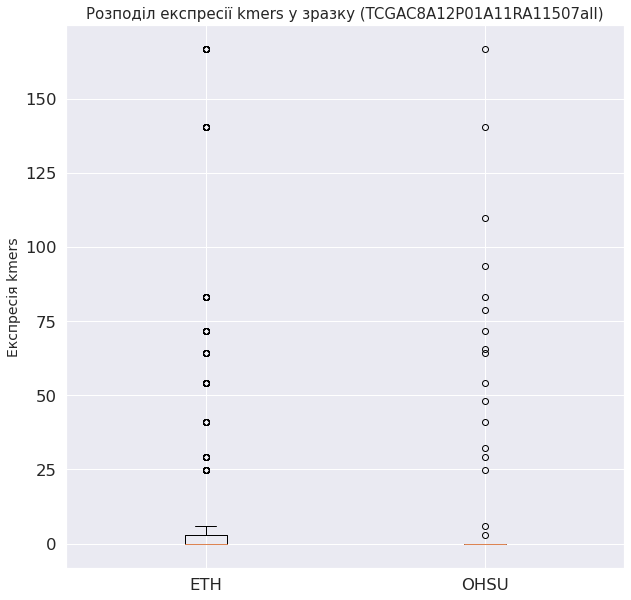

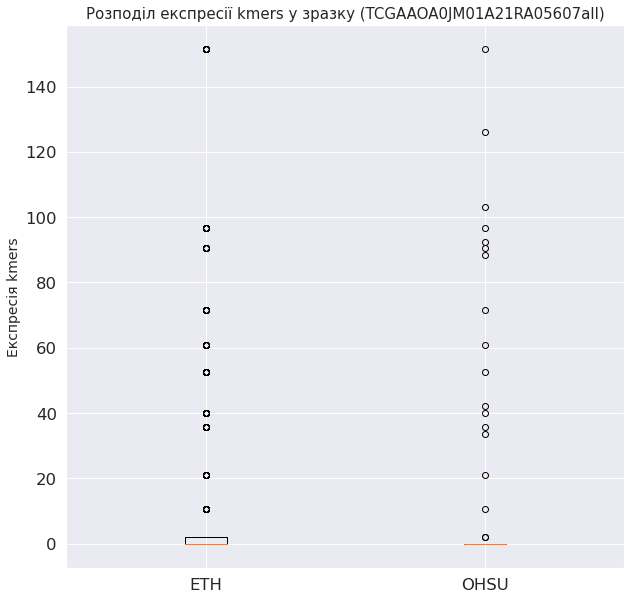

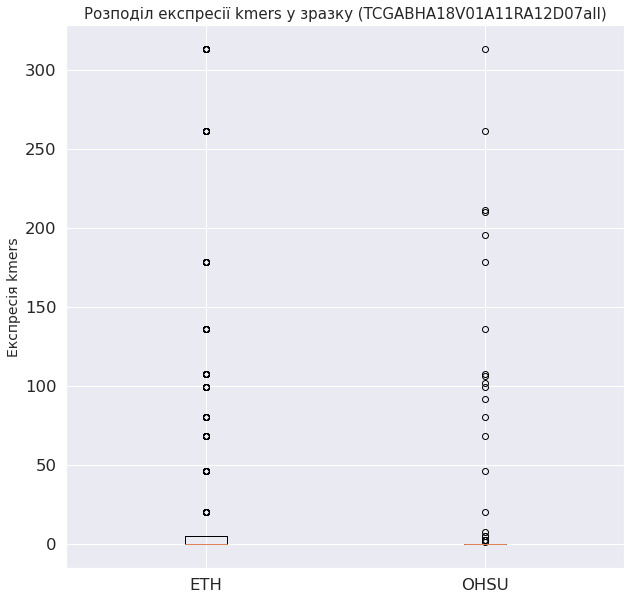

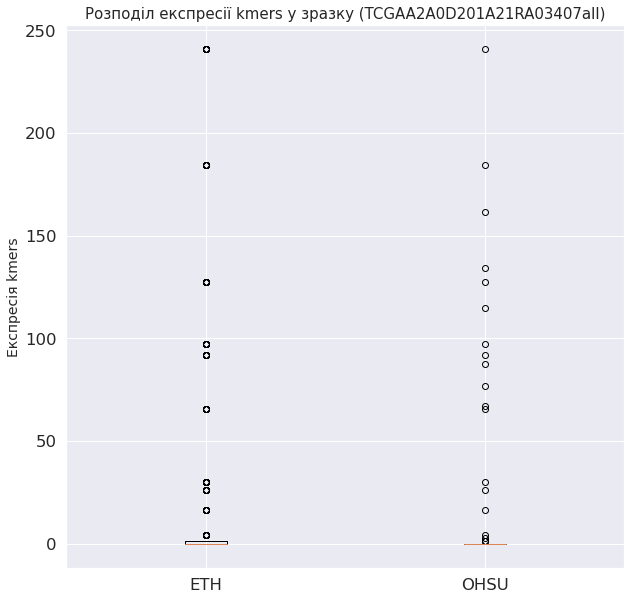

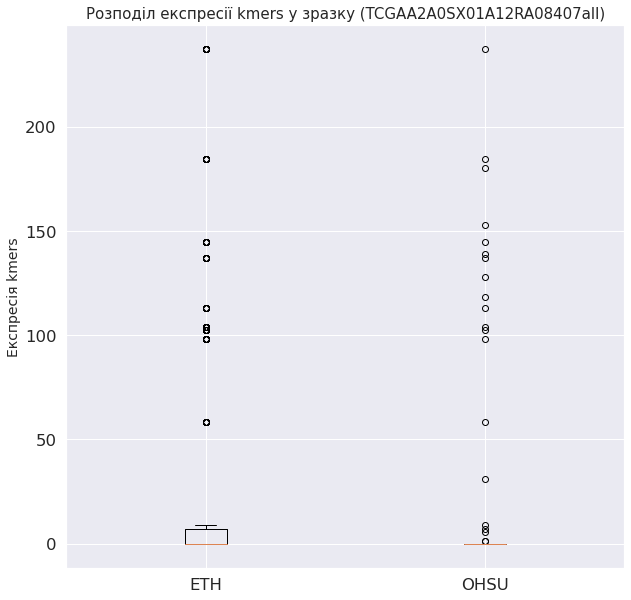

In [263]:
#eth_df = gene
#otsu_df = df
#eth_df = df
eth_df = df_normalized
ohsu_df = gene
for exp_col in expression_cols:
    plot_boxplot_gene_expression(eth_df, ohsu_df, exp_col)
#plt.savefig("22.png")


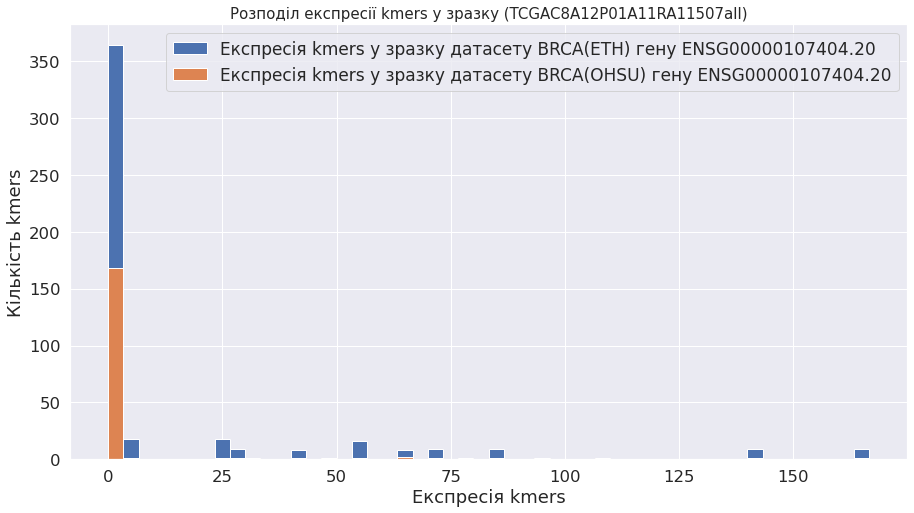

<Figure size 1080x1080 with 0 Axes>

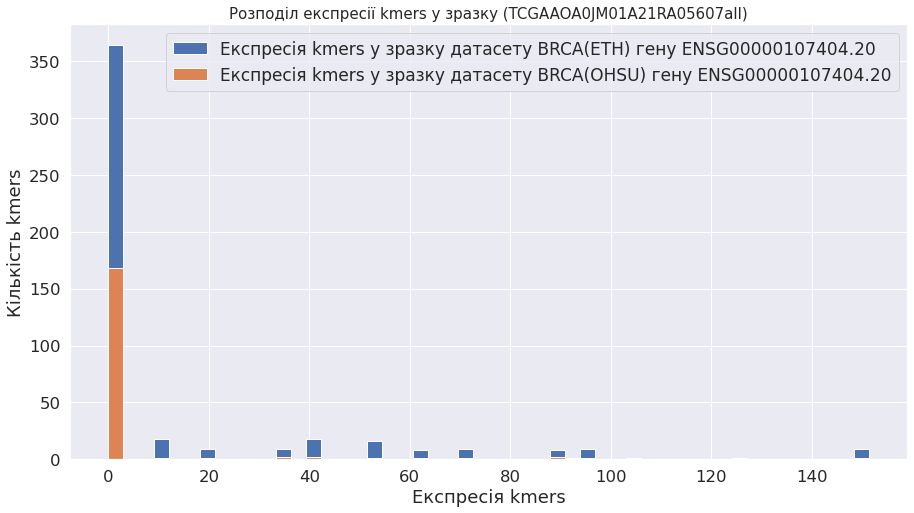

<Figure size 1080x1080 with 0 Axes>

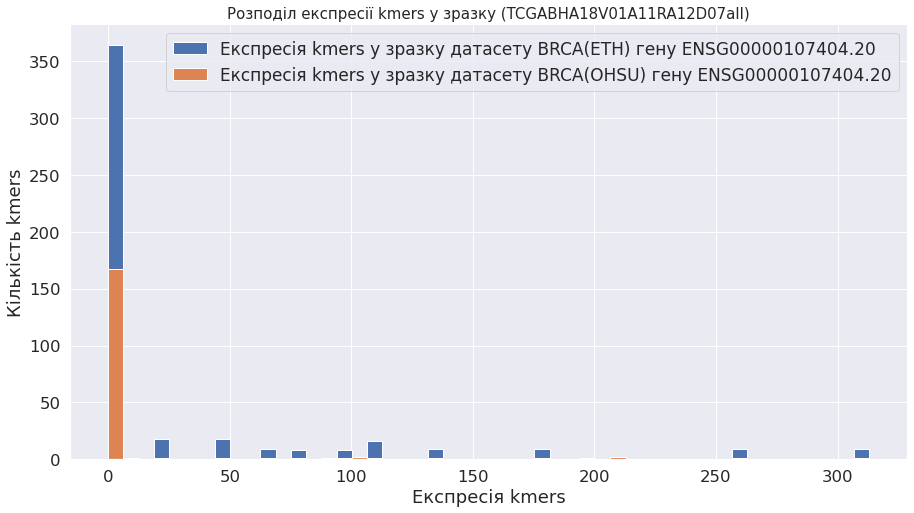

<Figure size 1080x1080 with 0 Axes>

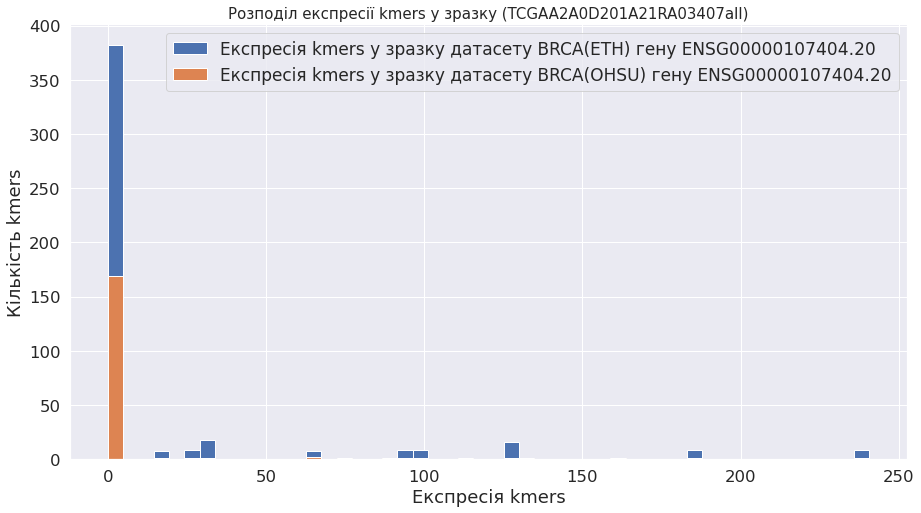

<Figure size 1080x1080 with 0 Axes>

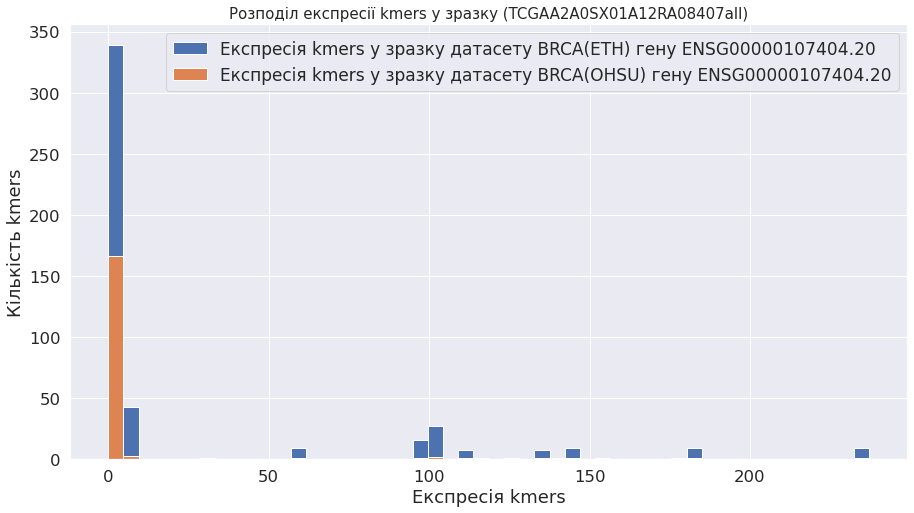

<Figure size 1080x1080 with 0 Axes>

In [274]:
for exp_col in expression_cols:
    plot_histogram_gene_expression(eth_df, ohsu_df, exp_col)
    figureNAME = 'Stacked bar charts - Expression distriburion of kmers in sample'
    basepath = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT'
    figure_path = os.path.join(basepath, figureNAME)
    plt.savefig(figure_path) #specify resolution and other parameters

In [47]:
def plot_boxplot_gene_expression(eth_df, ohsu_df, exp_cols):
    '''
    eth_df, otsu_df should be filtered by gene
    '''
 
    # Creating plot
    names = []
    data = []
    for idx, exp_col in enumerate(exp_cols):
        data.append(eth_df[exp_col])
        data.append(ohsu_df[exp_col])
        names.append('ETH ' + str(idx + 1))
        names.append('OHSU ' + str(idx + 1))
    
    plt.boxplot(data)
    plt.xticks(np.arange(1, 2 * len(exp_cols) + 1), names)
    plt.ylabel('Expression')
    plt.title('Expression distribution of samples')
    
    #save_plot('Boxplot of kmers expressions')

    # show plot
    plt.show()
    
def plot_histogram_gene_expression(eth_df, ohsu_df, exp_cols):
    '''
    eth_df, otsu_df should be filtered by gene
    '''  
 
    # Creating plot
    for exp_col in exp_cols:
        data1 = eth_df[exp_col]
        data2 = ohsu_df[exp_col]
        n = 10
        plt.hist(data1, bins=n, alpha=0.5, label='ETH ' + exp_col)
        plt.hist(data2, bins=n, alpha=0.5, label='OHSU ' + exp_col)

    plt.xlabel('Expression')
    plt.ylabel('Count')
    plt.title('Histograms')
    plt.legend(loc='upper right')
    #save_plot('Histogram of kmers expression')

    # show plot
    plt.show()

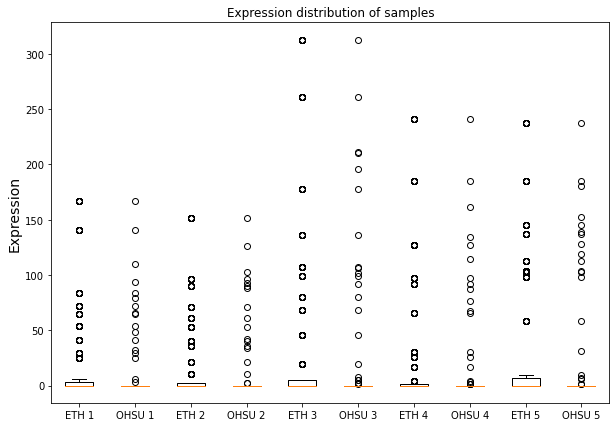

In [50]:
plot_boxplot_gene_expression(eth_df, ohsu_df, expression_cols)

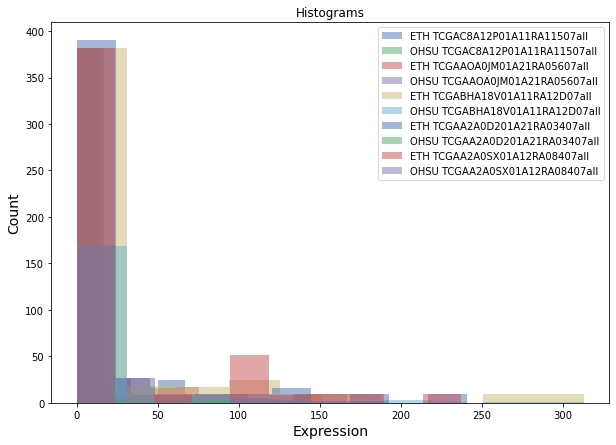

In [51]:
plot_histogram_gene_expression(eth_df, ohsu_df, expression_cols)

# TASK 2 Doing summary statistic for all 19697 genes 

# Comparison of kmers column data from 19697 genes ( 19697 datafarmes from ETH data set ) between ETH and OHSU data sets. 

In [ ]:
'''
For summary statistic for all genes, try to write the loop (using glob lib) that will download 
all gz. files (data frames that we are using all the time) and then get the table of intersection for each of
the 19697 genes, build the scatter plot for several genes 

This is the content of the inner loop. You need to loop yourself across the directories (for loop that you learnt), 
check if they exist and if they are not empty (if loop that you learnt). 
Please try to code it yourself in bash with the help of google. 
If you still have difficulties by tonight I will send you a piece of code.
'''

In [ ]:
'''

I have one main directory that contains folders (60608 batch folders, only 19697 of them contain data inside)

Directory name:
/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone

the example of name of folder - tmp_out_ref_batch_#number ( in general 60608 batch folders)

Inside of each of tmp_out_ref_batch_#number folder there is ref_graph_kmer_JuncExpr folder that contains .gz file
(this file is our dataframe with all data for 1 gene)


For example (tmp_out_ref_batch_101) full path to each data frame is:

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_101/ref_graph_kmer_JuncExpr/part-c55c8f2a-fa64-4e1f-a5fa-3f8446f72337.gz

Here file part-c55c8f2a-fa64-4e1f-a5fa-3f8446f72337.gz is our data frame with all data of interest
(kmers, coordinates, expression values etc.)
'''

## Load datasets

In [ ]:
#NEW STATEGY TO LOAD DATA

In [ ]:
du -h ~

In [65]:
import os
import pandas as pd
import tqdm # for nice progress bar since operation is slow
import h5py


DEBUG = False #True stands for loading filtered data, False stands for loading full data set
DEBUG_LOAD_PATH = False
FILTERED_DATA = False
ETH_FOLDER = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone' 
HF_NAME = 'eth_pathes_main.h5'
HF_DATASET = 'eth_dataset.h5'
HF_DATASET_PART = 'eth_dataset_part.h5'
KMER_STAT_DATASET = 'kmer_stat_dataset_part.h5' if DEBUG else 'kmer_stat_dataset.h5'
COORD_STAT_DATASET = 'coord_stat_dataset_part.h5' if DEBUG else 'coord_stat_dataset.h5'

# Use these genes for debugging
GENE_NAMES = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6']
GENE_NAMES_10 = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6',
              'ENSG00000179403.12',
              'ENSG00000160072.20',
              'ENSG00000197785.14',
              'ENSG00000160075.12',
              'ENSG00000197530.12']

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

# plot constants
PLOT_FOLDER = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/BRCAplots/'
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 16
OHSU_COLOR ='crimson' #'red'
ETH_COLOR = 'forestgreen'#'green'
OHSU_ETH_COLOR ='violet' #'yellow'

def sanity_check(df, name):
    print('Dataset: {}; Number of records: {}; Number of genes: {}'.format(name, len(df), len(df['gene_id'].unique())))
def save_plot(name, folder = PLOT_FOLDER):
    figure_path = os.path.join(name, folder)
    plt.savefig(figure_path) #specify resolution and other parameters

In [66]:
# DO NOT RUN AGAIN
# The cell should be run once to save data into h5 file
def load_eth_pathes():
    '''
    Load pathes for ETH dataset
    Returns a dictionary object with
         - key: gene name
         - value: tuple (path to kmers, path to gene details)
    '''
    
    eth_gene_df_dict = {}

    arr = os.listdir(ETH_FOLDER) # take all folders from the main directory
    print(len(arr))
    arr = filter(lambda x: x.startswith('tmp_out_ref_batch_'), arr) # just double-check that our folders start with 'tmp_out_ref_batch_'
    folders = list(arr)
    for folder in tqdm.tqdm(folders): # loop through all folders and look for expression data
        path = ETH_FOLDER + '/' + folder + '/ref_graph_kmer_JuncExpr' # go deeper into 'tmp_out_ref_batch_*/ref_graph_kmer_JuncExpr'

        if(os.path.exists(path)):
            data_file_names = os.listdir(path) # take folders into the selected folder
            if len(data_file_names) > 0: # if there is a folder, we have data, otherwise we do not
                #file_path = path + '/' + data_file_names[0] # for now take 1st file, it is a path to main data
                file_pathes = ['/' + folder + '/ref_graph_kmer_JuncExpr' + '/' + data_file_name for data_file_name in data_file_names]
                gene_path = '/' + folder + '/gene_expression_detail.gz' # it is a path to gene details
                df=pd.read_csv(ETH_FOLDER + gene_path, sep = '\t') # open the respective file
                gene_name = df['gene'].values[0] # get the gene value
                eth_gene_df_dict[gene_name] = (file_pathes, gene_path) # save into dictionary with key=gene_name and value=a pair of pathes
                
                if len(data_file_names) > 1 and DEBUG_LOAD_PATH:
                    print(path, gene_name)
                    
        if len(eth_gene_df_dict) > 10 and DEBUG_LOAD_PATH: # we have a lot of data, so for debugging purpose we might stop earlier
            break
            
    print('Total folders with data: ', len(eth_gene_df_dict)) # just for testing
    return eth_gene_df_dict

def save_eth_dataset_pathes(data_dict, name = HF_NAME):
    # Open HDF5 file and write in the data_dict structure and info
    hf = h5py.File(name, 'w')
    for grp_name in data_dict:
        grp = hf.create_group(grp_name)
        file_pathes, gene_path = data_dict[grp_name]
        grp.create_dataset('file_pathes', data = file_pathes)
        grp.create_dataset('gene_path', data = gene_path)
    hf.close()
    
def load_eth_dataset_pathes(name = HF_NAME):
    hf = h5py.File(name, 'r')
    d = {}
    for key in hf.keys():
        values = hf.get(key)
        d[key] = ([x.decode() for x in list(values.get('file_pathes')[:])], values.get('gene_path').asstr()[()])
    hf.close() 
    return d
    
if os.path.exists(HF_NAME):
    print('ETH gene pathes are cached')
else:
    eth_gene_df_dict = load_eth_pathes()
    save_eth_dataset_pathes(eth_gene_df_dict)
    
eth_dict = load_eth_dataset_pathes()
print('Number of genes:', len(eth_dict))
print('Expected number of genes is 17018')

60609


  2%|▋                                     | 1185/60609 [00:24<20:42, 47.83it/s]


KeyboardInterrupt: 

# TEST CODE 

In [84]:
path_eth_LP = glob.glob(ETH_FOLDER + '/*/*Junc*')

In [112]:
batch_to_gene = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/batch_to_gene.txt', 
                           names = ['gene', 'batch'])

In [126]:
OHSU_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz'
ohsu_df = pd.read_csv(OHSU_PATH, sep = '\t', low_memory=False)
ohsu_df.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)

In [129]:
# Rename columns and drop not needed
def change_column_names(ohsu_df):
    sample_col = [col for col in ohsu_df if col.startswith('TCGA')]
    new_col = [s.replace('-', '') + 'all' for s in sample_col]
    d = dict(zip(sample_col, new_col))
    ohsu_df.rename(columns = d, inplace = True)
    return ohsu_df
ohsu_df = change_column_names(ohsu_df)
#ohsu_df.columns

In [130]:
expression_cols_ohsu = [col for col in ohsu_df if col.startswith('TCGA')]
expression_cols_eth = [col for col in eth_df if col.startswith('TCGA')]
expression_cols = set(expression_cols_ohsu) & set(expression_cols_eth)
expression_cols = list(expression_cols)
print('Common expression:', len(expression_cols))
print(expression_cols)
metadata = ['gene_id', 'kmer', 'jx']
cols = metadata + expression_cols
ohsu_df = ohsu_df[cols]
ohsu_df.head()

Common expression: 0
[]


gene_id                                               kmer  \
0   ENSG00000261456.5  TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG   
1  ENSG00000151240.17                                                NaN   
2  ENSG00000151240.17                                                NaN   
3  ENSG00000151240.17                                                NaN   
4  ENSG00000151240.17                                                NaN   

                      jx  
0    chr10;48726;48803;-  
1  chr10;277578;281199;-  
2  chr10;280261;281199;-  
3  chr10;281324;283271;-  
4  chr10;283447;286272;-

In [133]:
ohsu_df = preprocess_ohsu(ohsu_df)

In [134]:
ohsu_df.head()

gene_id       kmer                   jx
0  ENSG00000261456.5  TTRPAVAGQ  chr10;48726;48803;-
0  ENSG00000261456.5  TRPAVAGQC  chr10;48726;48803;-
0  ENSG00000261456.5  RPAVAGQCG  chr10;48726;48803;-
0  ENSG00000261456.5  PAVAGQCGA  chr10;48726;48803;-
0  ENSG00000261456.5  AVAGQCGAG  chr10;48726;48803;-

In [169]:
all_test_genes = path_eth_LP

result_dict = {'gene_name':[], 
               'batch_number':[], 
               'intersection_size': [], 
               'eth_without_ohsu': [], 
               'ohsu_without_eth': [], 
               'full_size_eth': [], 
               'full_size_oshu': [] }

for single_gene in all_test_genes: 

# FOR each path_eth, path_ohsu in paths
    # DO Load dataframe 
    gene_files = glob.glob(single_gene + '/*gz')
    df_eth = [pd.read_csv(part, sep = '\t') for part in gene_files]
    if df_eth:
        gene_name = batch_to_gene.loc[batch_to_gene['batch'] == batch_id, 'gene'].values[0]
        print(gene_name)
        df_eth = pd.concat(df_eth)
        print(f'eth data frame size {df_eth.shape[0]}')
        batch_id = int(single_gene.split('/')[-2].split('_')[-1])
        df_ohsu_1gene = ohsu_df.loc[ohsu_df['gene_id'] == gene_name]
        print(f'ohsu data frame size {df_ohsu_1gene.shape[0]}')
        
        # Compute set sizes and statistics 
        eth_kmers = set(df_eth['kmer'])
        ohsu_kmers = set(df_ohsu_1gene['kmer'])
        n_eth = len(eth_kmers)
        n_ohsu = len(ohsu_kmers)
        eth_without_ohsu = len(eth_kmers.difference(ohsu_kmers))
        print('ETH\OHSU count:', eth_without_ohsu)
        ohsu_withou_eth = len(ohsu_kmers.difference(eth_kmers))
        print('OHSU\ETH count:', ohsu_withou_eth)
        inter = len(eth_kmers & ohsu_kmers)
        
        # Intermediate store
        result_dict['gene_name'].append(gene_name)
        result_dict['batch_number'].append(batch_id)
        result_dict['intersection_size'].append(inter ) # You need to compute the intersection as before
        result_dict['eth_without_ohsu'].append(eth_without_ohsu )  # You need to compute the difference as before
        result_dict['ohsu_without_eth'].append(ohsu_withou_eth ) # You need to compute the difference as before
        result_dict['full_size_eth'].append(n_eth ) # You need to compute the number of kmers as before
        result_dict['full_size_oshu'].append(n_ohsu ) # You need to compute the number of kmers as before


ENSG00000274897.3
eth data frame size 548
ohsu data frame size 0
ETH\OHSU count: 478
OHSU\ETH count: 0
ENSG00000188312.14
eth data frame size 24
ohsu data frame size 90
ETH\OHSU count: 24
OHSU\ETH count: 88
ENSG00000178974.10
eth data frame size 275
ohsu data frame size 21
ETH\OHSU count: 267
OHSU\ETH count: 21
ENSG00000015285.10
eth data frame size 21
ohsu data frame size 192
ETH\OHSU count: 21
OHSU\ETH count: 188
ENSG00000182489.9
eth data frame size 326
ohsu data frame size 8
ETH\OHSU count: 312
OHSU\ETH count: 8
ENSG00000163220.11
eth data frame size 113
ohsu data frame size 91
ETH\OHSU count: 112
OHSU\ETH count: 85
ENSG00000139531.13
eth data frame size 8
ohsu data frame size 99
ETH\OHSU count: 8
OHSU\ETH count: 93
ENSG00000274897.3
eth data frame size 354
ohsu data frame size 0
ETH\OHSU count: 266
OHSU\ETH count: 0
ENSG00000166509.12
eth data frame size 37
ohsu data frame size 9
ETH\OHSU count: 29
OHSU\ETH count: 9
ENSG00000100721.11
eth data frame size 191
ohsu data frame size 8

KeyboardInterrupt: 

In [170]:
on_the_fly_res = pd.DataFrame(result_dict)

In [171]:
on_the_fly_res.head()


gene_name  batch_number  intersection_size  eth_without_ohsu  \
0   ENSG00000274897.3         56543                  0               478   
1  ENSG00000188312.14         16543                  0                24   
2  ENSG00000178974.10         58285                  0               267   
3  ENSG00000015285.10         59009                  0                21   
4   ENSG00000182489.9          3285                  0               312   

   ohsu_without_eth  full_size_eth  full_size_oshu  
0                 0            478               0  
1                88             24              88  
2                21            267              21  
3               188             21             188  
4                 8            312               8

In [173]:
on_the_fly_res.shape

(74, 7)

In [172]:
  print('eth data frame size', df_eth.shape[0], 1, 2 , 3, 4, 5, 'hello')

eth data frame size 21 1 2 3 4 5 hello


In [144]:
  print(f'eth data frame size {df_eth.shape[0]} {1} {2}{3} {4} {5}')

eth data frame size 8 1 23 4 5


In [146]:
var = f'eth data frame size {df_eth.shape[0]} {1} {2}{3} {4} {5}'

In [147]:
var

'eth data frame size 8 1 23 4 5'

In [143]:
  print('eth data frame size {} {} {} {} {}'.format(df_eth.shape[0], 1, 2, 3, 4, 5))

eth data frame size 8 1 2 3 4


In [136]:
df_ohsu_1gene

Empty DataFrame
Columns: [gene_id, kmer, jx]
Index: []

In [95]:
gene_files


['/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_56543/ref_graph_kmer_JuncExpr/part-0f5bd76e-1d8a-4aed-ba89-4563e2950156.gz']

In [7]:
def load_eth_data(eth_gene_df_dict, gene_name): # loads data for a selected gene
    if not(gene_name in eth_gene_df_dict):  # if gene is absent we will notify
        print('There is no such gene in ETH dataset', gene_name)
        return
    file_pathes, gene_path = eth_gene_df_dict[gene_name] # get respective pathes for gene
    dfs = []
    for file_path in file_pathes:
        df=pd.read_csv(ETH_FOLDER + str(file_path), sep = '\t', low_memory=False) # load data
        dfs.append(df)
    return pd.concat(dfs) # concatenate data into 1 dataframe
# WORKS - BUT MIGHT BE SLOW
def load_eth(eth_dict):
    '''
    Based on ETH dictionary loads all data into a dictionary
    '''
    dfs = {gene_name: load_eth_data(eth_dict, gene_name) for gene_name in tqdm.tqdm(eth_dict)}
    return dfs
def convert_eth_dict_df(df_dict):
    dfs = []
    for key in tqdm.tqdm(df_dict):
        df = df_dict[key]
        df['gene_id'] = key
        dfs.append(df)
    return pd.concat(dfs, axis=0, ignore_index=True)

# just for testing
gene_name = list(eth_dict.keys())[0]
df = load_eth_data(eth_dict, gene_name)
df.head()

kmer                                              coord  \
0  IYTFIFYHW  100636609:100636628:100635738:100635746:None:None   
1  VDKIQNTLI  100633930:100633951:100630860:100630866:None:None   
2  GVACFQTRG  100632484:100632502:100622204:100622213:None:None   
3  IQNTGCFIK  100633930:100633942:100632553:100632568:None:None   
4  WGKYAMFLT  100635704:100635713:100635234:100635252:None:None   

   isCrossJunction  junctionAnnotated  readFrameAnnotated  \
0             True              False                True   
1             True              False               False   
2             True              False               False   
3             True              False               False   
4             True              False               False   

   TCGA3CAAAU01A11RA41B07all  TCGA3CAALI01A11RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA3CAALJ01A31RA41B07all  TCGA3CAALK01A11RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        1.0                        1.0   
4                        0.0                        0.0   

   TCGA4HAAAK01A12RA41B07all  ...  TCGAULAAZ601A11RA41B07all  \
0                        0.0  ...                        0.0   
1                        0.0  ...                        0.0   
2                        1.0  ...                        0.0   
3                        0.0  ...                        1.0   
4                        0.0  ...                        0.0   

   TCGAUUA93S01A21RA41B07all  TCGAV7A7HQ01A11RA33J07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        0.0   

   TCGAW8A86G01A21RA36F07all  TCGAWTAB4101A11RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        3.0                        0.0   

   TCGAWTAB4401A11RA41B07all  TCGAXXA89901A11RA36F07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAZ7A8R601A11RA41B07all  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 1107 columns]

In [8]:
# DO NOT RUN AGAIN
# The cell should be run once to save data into h5 file
#pip install tables
def load_save_eth_dataset(eth_dict, dataset_path = HF_DATASET):
    #pip install tables
    eth_df = load_eth(eth_dict)
    eth_df = convert_eth_dict_df(eth_df)
    eth_df.to_hdf(dataset_path, key='df', mode='w')
    eth_df = pd.read_hdf(dataset_path, 'df')
    sanity_check(eth_df, 'ETH')
    return eth_df
eth_df = load_save_eth_dataset(eth_dict)

100%|███████████████████████████████████| 17018/17018 [00:05<00:00, 3247.36it/s]


HDF5ExtError: Problems creating the Array.

### Load ETH full dataset

In [9]:
if not DEBUG:
    eth_df = pd.read_hdf(HF_DATASET, 'df')
    eth_df[['gene_id','kmer']]

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3501, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 578, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1990, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 614, in H5F__super_read
    truncated file: eof = 19379204415, sblock->base_addr = 0, stored_eof = 41608475951

End of HDF5 error back trace

Unable to open/create file 'eth_dataset.h5'

### Load filtered ETH dataset
(for debug purpose)

In [279]:
# RUN FOR DEBUG PURPOSE
def filter_eth_dict(eth_dict, gene_names):
    eth_dict_res = {key: eth_dict[key] for key in gene_names}
    return eth_dict_res
if DEBUG:
    eth_dict = filter_eth_dict(eth_dict, GENE_NAMES_10)
    eth_df = load_save_eth_dataset(eth_dict, HF_DATASET_PART)
    eth_df[['gene_id', 'kmer']]

100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 3708.82it/s]


Dataset: ETH; Number of records: 4012; Number of genes: 10


## Check for duplicates

In [175]:
d = eth_df.duplicated()
eth_df[d].sort_values(['gene_id', 'kmer'])

Empty DataFrame
Columns: [kmer, coord, isCrossJunction, junctionAnnotated, readFrameAnnotated, TCGA3CAAAU01A11RA41B07all, TCGA3CAALI01A11RA41B07all, TCGA3CAALJ01A31RA41B07all, TCGA3CAALK01A11RA41B07all, TCGA4HAAAK01A12RA41B07all, TCGA5LAAT001A12RA41B07all, TCGA5LAAT101A12RA41B07all, TCGA5TA9QA01A11RA41B07all, TCGAA1A0SB01A11RA14407all, TCGAA1A0SD01A11RA11507all, TCGAA1A0SE01A11RA08407all, TCGAA1A0SF01A11RA14407all, TCGAA1A0SG01A11RA14407all, TCGAA1A0SH01A11RA08407all, TCGAA1A0SI01A11RA14407all, TCGAA1A0SJ01A11RA08407all, TCGAA1A0SK01A12RA08407all, TCGAA1A0SM01A11RA08407all, TCGAA1A0SN01A11RA14407all, TCGAA1A0SO01A22RA08407all, TCGAA1A0SP01A11RA08407all, TCGAA1A0SQ01A21RA14407all, TCGAA2A04N01A11RA11507all, TCGAA2A04P01A31RA03407all, TCGAA2A04Q01A21RA03407all, TCGAA2A04R01A41RA10907all, TCGAA2A04T01A21RA03407all, TCGAA2A04U01A11RA11507all, TCGAA2A04V01A21RA03407all, TCGAA2A04W01A31RA11507all, TCGAA2A04X01A21RA03407all, TCGAA2A04Y01A21RA03407all, TCGAA2A0CK01A11RA22K07all, TCGAA2A0CL01A11RA11507all, TCGAA2A0CM01A31RA03407all, TCGAA2A0CO01A13RA22K07all, TCGAA2A0CP01A11RA03407all, TCGAA2A0CQ01A21RA03407all, TCGAA2A0CR01A11RA22K07all, TCGAA2A0CS01A11RA11507all, TCGAA2A0CT01A31RA05607all, TCGAA2A0CU01A12RA03407all, TCGAA2A0CV01A31RA11507all, TCGAA2A0CW01A21RA11507all, TCGAA2A0CX01A21RA00Z07all, TCGAA2A0CY01A12RA03407all, TCGAA2A0CZ01A11RA03407all, TCGAA2A0D001A11RA00Z07all, TCGAA2A0D101A11RA03407all, TCGAA2A0D201A21RA03407all, TCGAA2A0D301A11RA11507all, TCGAA2A0D401A11RA00Z07all, TCGAA2A0EM01A11RA03407all, TCGAA2A0EN01A13RA08407all, TCGAA2A0EO01A11RA03407all, TCGAA2A0EP01A52RA22U07all, TCGAA2A0EQ01A11RA03407all, TCGAA2A0ER01A21RA03407all, TCGAA2A0ES01A11RA11507all, TCGAA2A0ET01A31RA03407all, TCGAA2A0EU01A22RA05607all, TCGAA2A0EV01A11RA03407all, TCGAA2A0EW01A21RA11507all, TCGAA2A0EX01A21RA03407all, TCGAA2A0EY01A11RA03407all, TCGAA2A0ST01A12RA08407all, TCGAA2A0SU01A11RA08407all, TCGAA2A0SV01A11RA08407all, TCGAA2A0SW01A11RA08407all, TCGAA2A0SX01A12RA08407all, TCGAA2A0SY01A31RA08407all, TCGAA2A0T001A22RA08407all, TCGAA2A0T101A21RA08407all, TCGAA2A0T201A11RA08407all, TCGAA2A0T301A21RA11507all, TCGAA2A0T401A31RA08407all, TCGAA2A0T501A21RA08407all, TCGAA2A0T601A11RA08407all, TCGAA2A0T701A21RA08407all, TCGAA2A0YC01A11RA10907all, TCGAA2A0YD01A11RA10907all, TCGAA2A0YE01A11RA10907all, TCGAA2A0YF01A21RA10907all, TCGAA2A0YG01A21RA10907all, TCGAA2A0YH01A11RA10907all, TCGAA2A0YI01A31RA10J07all, TCGAA2A0YJ01A11RA10907all, TCGAA2A0YK01A22RA10907all, TCGAA2A0YL01A21RA10907all, TCGAA2A0YM01A11RA10907all, TCGAA2A0YT01A11RA10907all, TCGAA2A1FV01A11RA13Q07all, TCGAA2A1FW01A11RA13Q07all, TCGAA2A1FX01A11RA13Q07all, TCGAA2A1FZ01A51RA14D07all, ...]
Index: []

[0 rows x 1108 columns]

# Load OHSU dataset

In [281]:
OHSU_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz'
ohsu_df=pd.read_csv(OHSU_PATH, sep = '\t', low_memory=False)
ohsu_df.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)
ohsu_df

jx  TCGA-24-1431-01A-01R-1566-13  \
0               chr10;48726;48803;-                      0.000000   
1             chr10;277578;281199;-                      2.295572   
2             chr10;280261;281199;-                      0.000000   
3             chr10;281324;283271;-                      3.443358   
4             chr10;283447;286272;-                      1.147786   
...                             ...                           ...   
1346995  chr2;109934895;109947363;+                     14.921219   
1346996  chr2;109987191;109987560;+                     34.433582   
1346997  chr2;109987191;109993691;+                      0.000000   
1346998  chr2;109987191;109994400;+                     16.069005   
1346999  chr2;109987191;110017561;+                      0.000000   

         TCGA-24-2298-01A-01R-1569-13  TCGA-25-1313-01A-01R-1565-13  \
0                            2.176140                      0.842293   
1                           30.465966                     16.003571   
2                            0.000000                      0.000000   
3                           23.212165                     18.530451   
4                           41.346668                     19.372744   
...                               ...                           ...   
1346995                      3.626901                    175.196991   
1346996                     53.678131                    138.136089   
1346997                      1.450760                      1.684586   
1346998                      5.077661                      5.053759   
1346999                      0.000000                     11.792105   

         TCGA-25-1319-01A-01R-1565-13  TCGA-61-2008-01A-02R-1568-13  \
0                            2.517914                      0.961344   
1                           10.071656                     26.917642   
2                            0.000000                      0.961344   
3                           15.107483                     20.188231   
4                            6.714437                     28.840330   
...                               ...                           ...   
1346995                     87.287682                      1.922689   
1346996                     42.804536                     61.526038   
1346997                      1.678609                      0.000000   
1346998                     10.071656                      8.652099   
1346999                      1.678609                      0.000000   

         TCGA-A2-A0D2-01A-21R-A034-07  TCGA-A2-A0SX-01A-12R-A084-07  \
0                            0.000000                      5.700962   
1                           51.966700                     53.589040   
2                            0.000000                      0.000000   
3                           32.821074                     33.065578   
4                           61.539513                     62.710579   
...                               ...                           ...   
1346995                      0.000000                      1.140192   
1346996                     21.880716                     92.355580   
1346997                      0.000000                      1.140192   
1346998                      9.572813                      4.560769   
1346999                      0.000000                      1.140192   

         TCGA-AO-A0JM-01A-21R-A056-07  TCGA-BH-A18V-01A-11R-A12D-07  ...  \
0                            2.102386                      1.237161  ...   
1                           31.535793                     50.723584  ...   
2                            6.307159                      2.474321  ...   
3                           44.150110                     40.826300  ...   
4                           37.842952                     92.787044  ...   
...                               ...                           ...  ...   
1346995                      2.102386                      0.000000  ...   
1346996                      8.409545

In [282]:
# Rename columns and drop not needed
def change_column_names(ohsu_df):
    sample_col = [col for col in ohsu_df if col.startswith('TCGA')]
    new_col = [s.replace('-', '') + 'all' for s in sample_col]
    d = dict(zip(sample_col, new_col))
    ohsu_df.rename(columns = d, inplace = True)
    return ohsu_df
ohsu_df = change_column_names(ohsu_df)
#ohsu_df.columns

In [283]:
expression_cols_ohsu = [col for col in ohsu_df if col.startswith('TCGA')]
expression_cols_eth = [col for col in eth_df if col.startswith('TCGA')]
expression_cols = set(expression_cols_ohsu) & set(expression_cols_eth)
expression_cols = list(expression_cols)
print('Common expression:', len(expression_cols))
print(expression_cols)
metadata = ['gene_id', 'kmer', 'jx']
cols = metadata + expression_cols
ohsu_df = ohsu_df[cols]
ohsu_df.head()

Common expression: 5
['TCGABHA18V01A11RA12D07all', 'TCGAAOA0JM01A21RA05607all', 'TCGAA2A0SX01A12RA08407all', 'TCGAC8A12P01A11RA11507all', 'TCGAA2A0D201A21RA03407all']


gene_id                                               kmer  \
0   ENSG00000261456.5  TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG   
1  ENSG00000151240.17                                                NaN   
2  ENSG00000151240.17                                                NaN   
3  ENSG00000151240.17                                                NaN   
4  ENSG00000151240.17                                                NaN   

                      jx  TCGABHA18V01A11RA12D07all  \
0    chr10;48726;48803;-                   1.237161   
1  chr10;277578;281199;-                  50.723584   
2  chr10;280261;281199;-                   2.474321   
3  chr10;281324;283271;-                  40.826300   
4  chr10;283447;286272;-                  92.787044   

   TCGAAOA0JM01A21RA05607all  TCGAA2A0SX01A12RA08407all  \
0                   2.102386                   5.700962   
1                  31.535793                  53.589040   
2                   6.307159                   0.000000   
3                  44.150110                  33.065578   
4                  37.842952                  62.710579   

   TCGAC8A12P01A11RA11507all  TCGAA2A0D201A21RA03407all  
0                   1.461321                   0.000000  
1                  67.220751                  51.966700  
2                   0.000000                   0.000000  
3                  40.916979                  32.821074  
4                  68.682071                  61.539513

In [284]:
sanity_check(ohsu_df, 'OHSU')

Dataset: OHSU; Number of records: 1347000; Number of genes: 18230


In [131]:
def preprocess_ohsu(df):
    pd.options.mode.chained_assignment = None  # default='warn'
    df = df[df['gene_id'].notna()]
    df = df[df['kmer'].notna()]
    df.loc[:, 'kmer'] = df['kmer'].apply(lambda s: s.split(';'))
    df = df.explode('kmer')
    df.loc[:, 'gene_id'] = df['gene_id'].apply(lambda s: s.split(','))
    df = df.explode('gene_id')
    return df

### Load OHSU full dataset

In [138]:
if not DEBUG:
    ohsu_df = preprocess_ohsu(ohsu_df)
    ohsu_df[['gene_id', 'kmer']]

### Load filtered OHSU dataset
(Do not run if we want full dataset)

In [286]:
# RUN FOR DEBUG PURPOSE
def filter_ohsu_df(df, gene_names):
    df = df[df['gene_id'].isin(gene_names)]
    return df
if DEBUG:
    ohsu_df = filter_ohsu_df(ohsu_df, GENE_NAMES_10)
    ohsu_df = preprocess_ohsu(ohsu_df)
    sanity_check(ohsu_df, 'OHSU')
    ohsu_df[['gene_id', 'kmer']]

Dataset: OHSU; Number of records: 6094; Number of genes: 10


## Check for duplicates

In [287]:
d = ohsu_df.duplicated()
ohsu_df[d].sort_values(['gene_id', 'kmer'])

gene_id       kmer                      jx  \
1056888  ENSG00000107404.20  AARTNAVIG  chr1;1338531;1341790;-   
868737   ENSG00000107404.20  ASTSSRLIR  chr1;1340476;1341731;-   
1216457  ENSG00000107404.20  ATVRVPAPA  chr1;1339366;1339411;-   
1216458  ENSG00000107404.20  DDNAKLPRY  chr1;1339369;1342715;-   
1216469  ENSG00000107404.20  DGMDNETDS  chr1;1340468;1342112;-   
...                     ...        ...                     ...   
895387    ENSG00000242485.6  RCYSSGLIE  chr1;1405887;1406987;-   
868794    ENSG00000242485.6  REATRRICC  chr1;1402168;1406986;-   
895387    ENSG00000242485.6  SSGLIELQL  chr1;1405887;1406987;-   
868794    ENSG00000242485.6  YREATRRIC  chr1;1402168;1406986;-   
895387    ENSG00000242485.6  YSSGLIELQ  chr1;1405887;1406987;-   

         TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
1056888                   0.000000                   0.000000   
868737                    0.000000                   0.000000   
1216457                   0.000000                   0.000000   
1216458                   0.000000                   0.000000   
1216469                   0.000000                   0.000000   
...                            ...                        ...   
895387                    4.948642                   4.204772   
868794                    0.000000                   0.000000   
895387                    4.948642                   4.204772   
868794                    0.000000                   0.000000   
895387                    4.948642                   4.204772   

         TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
1056888                        0.0                        0.0   
868737                         0.0                        0.0   
1216457                        0.0                        0.0   
1216458                        0.0                        0.0   
1216469                        0.0                        0.0   
...                            ...                        ...   
895387                         0.0                        0.0   
868794                         0.0                        0.0   
895387                         0.0                        0.0   
868794                         0.0                        0.0   
895387                         0.0                        0.0   

         TCGAA2A0D201A21RA03407all  
1056888                   0.000000  
868737                    0.000000  
1216457                   0.000000  
1216458                   0.000000  
1216469                   0.000000  
...                            ...  
895387                    1.367545  
868794                    0.000000  
895387                    1.367545  
868794                    0.000000  
895387                    1.367545  

[301 rows x 8 columns]

In [288]:
ohsu_df.drop_duplicates(inplace=True)
sanity_check(ohsu_df, "OHSU")

Dataset: OHSU; Number of records: 5793; Number of genes: 10


In [289]:
# Drop unnecessary columns for eth
metadata = ['gene_id', 'kmer', 'coord']
cols = metadata + expression_cols
eth_df = eth_df[cols]
eth_df.drop_duplicates(inplace=True)
eth_df.head()

gene_id       kmer                                      coord  \
0  ENSG00000107404.20  SMDQDFGWS  1348895:1348915:1342477:1342484:None:None   
1  ENSG00000107404.20  FGVLVTGWR  1348895:1348900:1348393:1348415:None:None   
2  ENSG00000107404.20  PPSFHSCPP  1342362:1342376:1341961:1341974:None:None   
3  ENSG00000107404.20  TARRFLSPS  1342052:1342064:1341959:1341974:None:None   
4  ENSG00000107404.20  SSRLIRKYA  1340458:1340475:1338362:1338372:None:None   

   TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
0                        0.0                        0.0   
1                        8.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAA2A0D201A21RA03407all  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

## ETH vs OHSU gene statistics

In [290]:
def gene_intersection(eth_dict, ohsu_df):
    eth_gene = set(eth_dict.keys())
    ohsu_gene = set(ohsu_df['gene_id'].unique())
    print('ETH gene number:', len(eth_gene))
    print('OHSU gene number:', len(ohsu_gene))
    eth_without_ohsu = eth_gene.difference(ohsu_gene)
    print('ETH\OHSU count:', len(eth_without_ohsu))
    ohsu_withou_eth = ohsu_gene.difference(eth_gene)
    print('OHSU\ETH count:', len(ohsu_withou_eth))
    inter = eth_gene & ohsu_gene
    print('Intersection count:', len(inter))
    return eth_without_ohsu, ohsu_withou_eth, inter

eth_without_ohsu, ohsu_withou_eth, inter = gene_intersection(eth_dict, ohsu_df)

ETH gene number: 10
OHSU gene number: 10
ETH\OHSU count: 0
OHSU\ETH count: 0
Intersection count: 10


In [19]:
print('ETH gene, NOT in OHSU\n', eth_without_ohsu)

ETH gene, NOT in OHSU
 {'ENSG00000125879.4', 'ENSG00000241553.12', 'ENSG00000143595.13', 'ENSG00000124251.11', 'ENSG00000261832.6', 'ENSG00000197084.5', 'ENSG00000205669.4', 'ENSG00000165805.10', 'ENSG00000184210.6', 'ENSG00000177301.15', 'ENSG00000251503.8', 'ENSG00000124467.19', 'ENSG00000268790.5', 'ENSG00000167139.9', 'ENSG00000092051.17', 'ENSG00000178404.10', 'ENSG00000169224.13', 'ENSG00000186198.4', 'ENSG00000206073.11', 'ENSG00000272297.2', 'ENSG00000217555.12', 'ENSG00000270882.2', 'ENSG00000197191.6', 'ENSG00000196468.8', 'ENSG00000177752.14', 'ENSG00000271271.5', 'ENSG00000167244.21', 'ENSG00000100652.5', 'ENSG00000267978.5', 'ENSG00000230430.4', 'ENSG00000144290.17', 'ENSG00000118271.10', 'ENSG00000165246.14', 'ENSG00000282278.1', 'ENSG00000131910.5', 'ENSG00000248405.10', 'ENSG00000286094.1', 'ENSG00000227051.6', 'ENSG00000123576.5', 'ENSG00000197641.11', 'ENSG00000171431.4', 'ENSG00000180483.7', 'ENSG00000185518.11', 'ENSG00000268089.3', 'ENSG00000187033.9', 'ENSG0000018

In [20]:
print('OHSU gene, NOT in ETH\n', ohsu_withou_eth)

OHSU gene, NOT in ETH
 {'ENSG00000185818.7', 'ENSG00000254685.6,ENSG00000259030.7', 'ENSG00000259371.2,ENSG00000100897.17', 'ENSG00000254706.3,ENSG00000239887.6', 'ENSG00000270800.3,ENSG00000124614.16', 'ENSG00000111271.14,ENSG00000257767.3', 'ENSG00000249967.1,ENSG00000155252.13', 'ENSG00000285708.1,ENSG00000114861.20', 'ENSG00000281887.3,ENSG00000213203.3', 'ENSG00000129965.15,ENSG00000284779.2', 'ENSG00000251184.1,ENSG00000175287.19', 'ENSG00000259207.7', 'ENSG00000259112.2,ENSG00000151366.13', 'ENSG00000285130.2,ENSG00000165060.14', 'ENSG00000117620.15,ENSG00000283761.1', 'ENSG00000260861.6,ENSG00000101307.15', 'ENSG00000254122.2,ENSG00000253873.6,ENSG00000081853.15,ENSG00000262209.3,ENSG00000253305.2,ENSG00000253953.2,ENSG00000240184.7,ENSG00000253537.3,ENSG00000254221.2,ENSG00000253910.2,ENSG00000261934.2,ENSG00000253767.2,ENSG00000253731.2,ENSG00000262576.3,ENSG00000276547.1,ENSG00000253485.2,ENSG00000253159.3,ENSG00000253846.2,ENSG00000254245.2,ENSG00000204956.5', 'ENSG00000035

In [21]:
print('Intersection\n', inter)

Intersection
 {'ENSG00000093217.11', 'ENSG00000168427.9', 'ENSG00000197006.14', 'ENSG00000183570.16', 'ENSG00000168671.10', 'ENSG00000141741.12', 'ENSG00000188157.15', 'ENSG00000143126.8', 'ENSG00000172336.5', 'ENSG00000197935.6', 'ENSG00000119681.12', 'ENSG00000047634.15', 'ENSG00000063180.9', 'ENSG00000153071.15', 'ENSG00000006283.18', 'ENSG00000136205.17', 'ENSG00000105793.15', 'ENSG00000132388.12', 'ENSG00000205364.4', 'ENSG00000162669.16', 'ENSG00000112473.18', 'ENSG00000256294.8', 'ENSG00000162623.16', 'ENSG00000134375.11', 'ENSG00000151247.12', 'ENSG00000115112.8', 'ENSG00000163482.12', 'ENSG00000178764.8', 'ENSG00000182771.19', 'ENSG00000112139.16', 'ENSG00000138834.12', 'ENSG00000146247.14', 'ENSG00000086062.12', 'ENSG00000103326.12', 'ENSG00000197763.17', 'ENSG00000138395.16', 'ENSG00000145907.15', 'ENSG00000070018.9', 'ENSG00000119227.8', 'ENSG00000103647.12', 'ENSG00000163565.18', 'ENSG00000165617.14', 'ENSG00000171004.18', 'ENSG00000166337.10', 'ENSG00000104133.15', 'ENSG0

## Common genes

In [291]:
def common_genes(ohsu_df, eth_df):
    g1 = ohsu_df['gene_id'].unique()
    print("OHSU number of genes:", len(g1))
    g2 = eth_df['gene_id'].unique()
    print("ETH number of genes:", len(g2))
    gene_names = list(set(g1) & set(g2))
    print("Number of common genes:", len(gene_names))
    return gene_names
gene_names_intersection = common_genes(ohsu_df, eth_df)

OHSU number of genes: 10
ETH number of genes: 10
Number of common genes: 10


# 1. Summary statistic for all 17018 protein-coding genes (Total folders with data:  17018)

# Column statistics

In [356]:
def get_common_statistics(ohsu_df, eth_df, col, name, gene_names):
    '''
    Get the table of number of kmers per gene
    Columns:
    - gene_id: Gene name
    - OHSU_#col: number of uniques valies in OHSU
    - ETH_#col: number of uniques values in ETH
    - intersection_#col: number of values in intersection
    - OHSU\ETH_#col: number of values in OHSU but not in ETH
    - ETH\OHSU_#col: number of values in ETH but not in OHSU
    '''
    df = []
    ohsu_col= ohsu_df[['gene_id', col]]
    eth_col = eth_df[['gene_id', col]]
    for gene in tqdm.tqdm(gene_names):
        ser1 = ohsu_col.loc[ ohsu_col['gene_id'] == gene, col]
        ser2 = eth_col.loc[ eth_col['gene_id'] == gene, col]
        ser1 = set(ser1) # get only unique values
        ser2 = set(ser2) # get only unique values
        intersect = ser1.intersection(ser2)
        df.append((gene, len(ser1), len(ser2), len(intersect), len(ser1) - len(intersect), len(ser2) - len(intersect)))
    return pd.DataFrame(df, columns =['gene_id', 'OHSU_' + name, 'ETH_' + name,
                                      'inters_' + name, 'OHSU\ETH_' + name, 'ETH\OHSU_' + name])

gene_names_union = set(ohsu_df['gene_id'].unique()) | set(eth_df['gene_id'].unique())

def save_load_common_statistics(df, dataset_path):
    df.to_hdf(dataset_path, key='df', mode='w')
    df = pd.read_hdf(dataset_path, 'df')
    return df
def load_common_statistics(dataset_path):
    df = pd.read_hdf(dataset_path, 'df')
    return df

def scatter_column_count(df, col):
    x, y = df['OHSU_' + col], df['ETH_' + col]
    plt.scatter(x, y)
    plt.xlabel('К-ть координат kmers датасету BRCA(OHSU)', size=20)
    plt.ylabel('К-ть координат kmers датасету BRCA(ETH)', size=20)
    title = 'Порівняння к-ті спільних координат kmers для 10 генів між BRCA(OHSU) і BRCA(ETH) датасетом' #+ col
    plt.title(title)
    save_plot(title)
    plt.show()
    
def scatter_column_count_log(df, col):
    x, y = df['OHSU_' + col], df['ETH_' + col]
    print(x.min(), y.min()) # for now for debug
    x, y = np.log(x + 1), np.log(y + 1) # +1 in case there are 0s
    plt.scatter(x, y)
    plt.xlabel('К-ть координат kmers датасету BRCA(OHSU)log', size=20)
    plt.ylabel('К-ть координат kmers датасету BRCA(ETH)log', size=20)
    title = 'Порівняння к-ті спільних координат kmers для 10 генів між BRCA(OHSU) і BRCA(ETH) датасетом' #+ col
    plt.title(title)
    save_plot(title)
    plt.show()
    
def scatter_column_count_log2(df, col):
    x, y = df['OHSU_' + col], df['ETH_' + col]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_yscale('log')
    plt.xlabel('К-ть координат kmers датасету BRCA(OHSU)log2', size=20)
    plt.ylabel('К-ть координат kmers датасету BRCA(ETH)log2', size=20)
    title = 'Порівняння к-ті спільних координат kmers для 10 генів між BRCA(OHSU) і BRCA(ETH) датасетом' #+ col
    plt.title(title)
    save_plot(title)
    plt.show()
    
def scatter_column_count_with_labels(df, gene_names, col, with_jitter = False):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    genes = df['gene_id']
    x, y = df['OHSU_' + col], df['ETH_' + col]
    
    if with_jitter:
        # Add jitter to the data points
        jitter_amount = 10
        x = x + np.random.normal(scale=jitter_amount, size=len(x))
        y = y + np.random.normal(scale=jitter_amount, size=len(y))
        
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s = x[i] + y[i], alpha=0.5, label=genes[i])
    plt.xlabel('К-ть координат kmers датасету BRCA(OHSU)')
    plt.ylabel('К-ть координат kmers датасету BRCA(ETH)')
    title = 'Порівняння к-ті спільних координат kmers для 10 генів між BRCA(OHSU) і BRCA(ETH) датасетом'#Scatter plot - OHSU vs ETH common ' + col + ' (filtered)'
    plt.title(title)
    
    # add labels to some points
    for i in range(len(x)):
        plt.annotate(genes[i], xy=(x[i], y[i]), textcoords='offset points', xytext=(5,5))
    
    save_plot(title)
    plt.show()
    
def scatter_common_count_with_legend(df, gene_names, col):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    x, y = df['OHSU_' + col], df['ETH_' + col]
    genes = df['gene_id']
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s = 400, alpha=0.5, label=genes[i])

    plt.xlabel('К-ть координат kmers датасету BRCA(OHSU)')
    plt.ylabel('К-ть координат kmers датасету BRCA(ETH)')
    title = 'Порівняння к-ті спільних координат kmers для 10 генів між BRCA(OHSU) і BRCA(ETH) датасетом'#Scatter plot - OHSU vs ETH common ' + col + ' (filtered)'
    plt.title(title)
    plt.legend()
    
    save_plot(title)
    plt.show()
    
    
# Venn diagram    
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

TEXT_SIZE = 65

def plot_venn(count1, count2, count_int, title = 'Counts of kmers'):
    plt.figure(figsize=(50,50))
    total = count1 + count2 - count_int
    out = venn2(
        subsets = (count1 - count_int, count2 - count_int, count_int),
        set_labels = ('ETH', 'OHSU'),
        set_colors=[ETH_COLOR,OHSU_COLOR]
    )
    for text in out.set_labels:
        text.set_fontsize(TEXT_SIZE)
    for text in out.subset_labels:
        text.set_fontsize(TEXT_SIZE)
    plt.title(title, fontsize=TEXT_SIZE)
    save_plot(title)
    plt.show()

def plot_venn_perc(count1, count2, count_int, title = 'Counts of kmers'):
    plt.figure(figsize=(50,50))
    total = count1 + count2 - count_int
    out = venn2(
        subsets = (count1 - count_int, count2 - count_int, count_int),
        set_labels = ('ETH', 'OHSU'),
        set_colors=[ETH_COLOR,OHSU_COLOR],
        subset_label_formatter=lambda x: f"{(x/total):0.01%}"
    )
    for text in out.set_labels:
        text.set_fontsize(TEXT_SIZE)
    for text in out.subset_labels:
        text.set_fontsize(TEXT_SIZE)
    plt.title(title, fontsize=TEXT_SIZE)
    plt.show()

def barplot_column_count(df, gene_names, col):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    df = df.sort_values(by=['OHSU_' + col], ascending=False)
    x = df['gene_id']

    bar_width = 0.25

    # Create the first barplot
    plt.bar(x, df['OHSU_' + col], label='OHSU', width=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) + bar_width
    plt.bar(x_shift, df['ETH_' + col], label='ETH', width=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)

    plt.ylabel('К-ть координат kmers для гену')#(col + ' counts per gene')
    plt.xticks(rotation=90)
    title = 'Порівняння к-ті координат kmers між BRCA(OHSU) і BRCA(ETH) датасетами генів'
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    
def barplot_column_count_horizontal(df, gene_names, col):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    df = df.sort_values(by=['OHSU_' + col], ascending=True)
    x = df['gene_id']

    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df['OHSU_' + col], label='OHSU', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df['ETH_' + col], label='ETH', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)

    plt.xlabel('К-ть координат kmers для гену') #(col + ' counts per gene')
    title = 'Порівняння к-ті координат kmers між BRCA(OHSU) і BRCA(ETH) датасетами 10 генів' #'Barplot plot - OHSU vs ETH common ' + col + ' per gene'
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    
def barplot_column_count_unique(df, gene_names, col):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    df = df.sort_values(by=['OHSU\ETH_' + col], ascending=False)
    x = df['gene_id']
    
    bar_width = 0.25

    # Create the first barplot
    plt.bar(x, df['OHSU\ETH_' + col], label='OHSU\ETH', width=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) + bar_width
    plt.bar(x_shift, df['ETH\OHSU_' + col], label='ETH\OHSU', width=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)
    
    x_shift = np.arange(len(x)) + 2 * bar_width
    plt.bar(x_shift, df['inters_' + col], label='ETH & OHSU', width=bar_width, align='center', color=OHSU_ETH_COLOR, alpha = 0.5)

    plt.ylabel('К-ть координат kmers для гену') #(col + ' counts per gene')
    plt.xticks(rotation=90)
    title = 'Порівняння к-ті спільних координат kmers між BRCA(OHSU) і BRCA(ETH) датасетами 10 генів'#'Barplot plot - OHSU vs ETH common ' + col + ' per gene'
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    
def barplot_column_count_unique_horizontal(df, gene_names, col):
    '''
    Applicable only for limited number of genes
    '''
    df = df[df['gene_id'].isin(gene_names)]
    df = df.sort_values(by=['OHSU\ETH_' + col], ascending=True)
    x = df['gene_id']
    
    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df['OHSU\ETH_' + col], label='BRCA(OHSU)\BRCA(ETH)', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df['ETH\OHSU_' + col], label='BRCA(ETH)\BRCA(OHSU)', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)
    
    x_shift = np.arange(len(x)) - 2 * bar_width
    plt.barh(x_shift, df['inters_' + col], label='BRCA(ETH) & BRCA(OHSU)', height=bar_width, align='center', color=OHSU_ETH_COLOR, alpha = 0.5)

    plt.xlabel('К-ть координат kmers для гену')#(col + ' counts per gene')
    title = 'Порівняння к-ті спільних координат kmers між BRCA(OHSU) і BRCA(ETH) датасетами 10 генів' #'Barplot plot - OHSU vs ETH common ' + col + ' per gene'
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)                   

    
def barplot_column_common(df, col):
    data = [df['OHSU_' + col].sum(), df['ETH_' + col].sum()]
    labels = ['BRCA(OHSU)', 'BRCA(ETH)']
    plt.bar(labels, data, color=[OHSU_COLOR, ETH_COLOR], alpha=0.5)
    # Add labels to the bars
    for i, v in enumerate(data):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.ylabel('К-ть координат kmers у датасеті')
    title = 'Порівняння к-ті спільних координат kmers між BRCA(OHSU) і BRCA(ETH) повними датасетами'#'OHSU vs ETH common ' + col
    plt.title(title)
    plt.show()
    save_plot(title)
    
def barplot_column_common_unique(df, col):
    data = [df['OHSU\ETH_' + col].sum(), df['ETH\OHSU_' + col].sum(), df['inters_' + col].sum()]
    labels = ['BRCA(OHSU)\BRCA(ETH)', 'BRCA(ETH)\BRCA(OHSU)', 'BRCA(OHSU) & BRCA(ETH)']
    plt.bar(labels, data, color=[OHSU_COLOR, ETH_COLOR, OHSU_ETH_COLOR], alpha=0.5)
    # Add labels to the bars
    for i, v in enumerate(data):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.ylabel('К-ть координат kmers у датасеті')
    title = 'Порівняння к-ті координат kmers між BRCA(OHSU) і BRCA(ETH) повними датасетами'#'Barplot plot - OHSU vs ETH unique ' + col
    plt.title(title)
    plt.show()
    save_plot(title)

# Kmers statistics

In [293]:
KMER_COL = 'kmers'
if os.path.exists(KMER_STAT_DATASET):
    print('Kmers statistic are cached')
    df_kmer = load_common_statistics(KMER_STAT_DATASET)
else:
    df_kmer = get_common_statistics(ohsu_df, eth_df, 'kmer', KMER_COL, gene_names_union)
    df_kmer = save_load_common_statistics(df_kmer, KMER_STAT_DATASET)    
df_kmer

Kmers statistic are cached


gene_id  OHSU_kmers  ETH_kmers  inters_kmers  OHSU\ETH_kmers  \
0  ENSG00000179403.12         878        178            50             828   
1  ENSG00000160072.20         377        444           126             251   
2  ENSG00000107404.20        1137        435            70            1067   
3  ENSG00000189339.12         215        315            93             122   
4  ENSG00000197530.12         847        484           143             704   
5  ENSG00000162576.16         410        253            94             316   
6  ENSG00000221978.12         624        669           195             429   
7  ENSG00000160075.12         275        254            84             191   
8   ENSG00000242485.6         108        120            19              89   
9  ENSG00000197785.14         825        391           117             708   

   ETH\OHSU_kmers  
0             128  
1             318  
2             365  
3             222  
4             341  
5             159  
6             474  
7             170  
8             101  
9             274

# 10 genes with the biggest kmers intersection values from column "inters_kmers" and 10 genes with the smallest kmers intersection values

In [294]:
# 10 genes with the largest common kmers
df_kmer.nlargest(10, ['inters_kmers'])

gene_id  OHSU_kmers  ETH_kmers  inters_kmers  OHSU\ETH_kmers  \
6  ENSG00000221978.12         624        669           195             429   
4  ENSG00000197530.12         847        484           143             704   
1  ENSG00000160072.20         377        444           126             251   
9  ENSG00000197785.14         825        391           117             708   
5  ENSG00000162576.16         410        253            94             316   
3  ENSG00000189339.12         215        315            93             122   
7  ENSG00000160075.12         275        254            84             191   
2  ENSG00000107404.20        1137        435            70            1067   
0  ENSG00000179403.12         878        178            50             828   
8   ENSG00000242485.6         108        120            19              89   

   ETH\OHSU_kmers  
6             474  
4             341  
1             318  
9             274  
5             159  
3             222  
7             170  
2             365  
0             128  
8             101

In [295]:
# 10 genes with the smalles common kmers - no zeros
df_kmer.nsmallest(10, ['inters_kmers'])

gene_id  OHSU_kmers  ETH_kmers  inters_kmers  OHSU\ETH_kmers  \
8   ENSG00000242485.6         108        120            19              89   
0  ENSG00000179403.12         878        178            50             828   
2  ENSG00000107404.20        1137        435            70            1067   
7  ENSG00000160075.12         275        254            84             191   
3  ENSG00000189339.12         215        315            93             122   
5  ENSG00000162576.16         410        253            94             316   
9  ENSG00000197785.14         825        391           117             708   
1  ENSG00000160072.20         377        444           126             251   
4  ENSG00000197530.12         847        484           143             704   
6  ENSG00000221978.12         624        669           195             429   

   ETH\OHSU_kmers  
8             101  
0             128  
2             365  
7             170  
3             222  
5             159  
9             274  
1             318  
4             341  
6             474

## Scatter plot of common kmer numbers

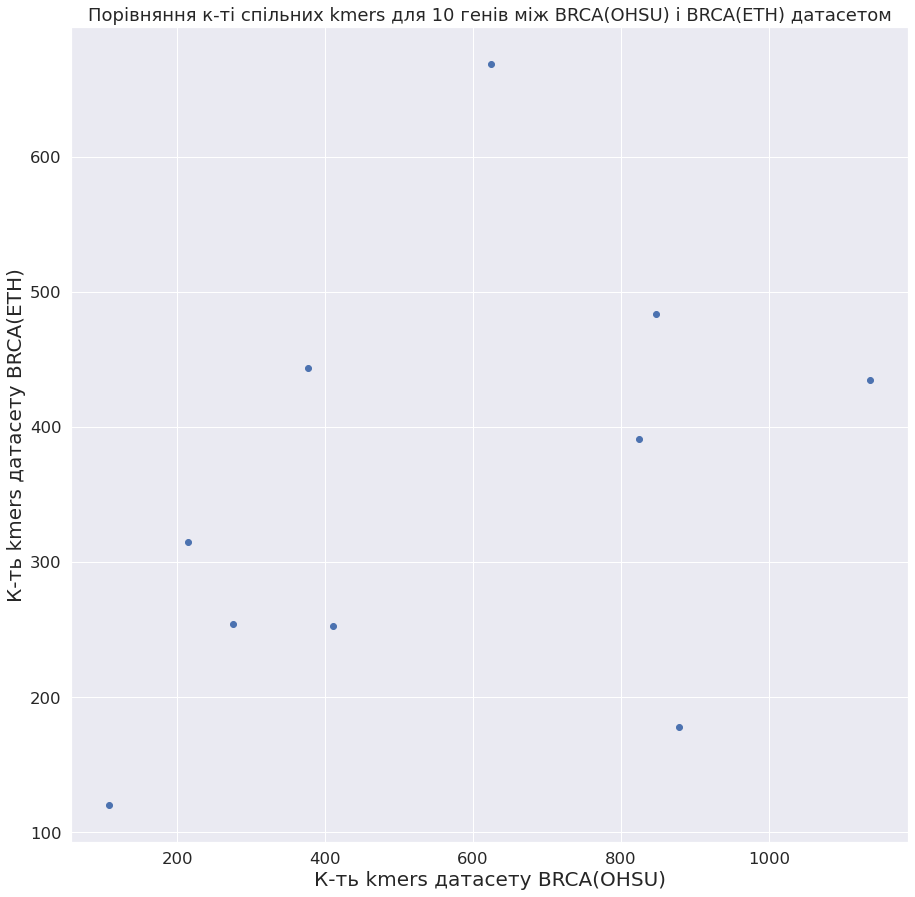

108 120


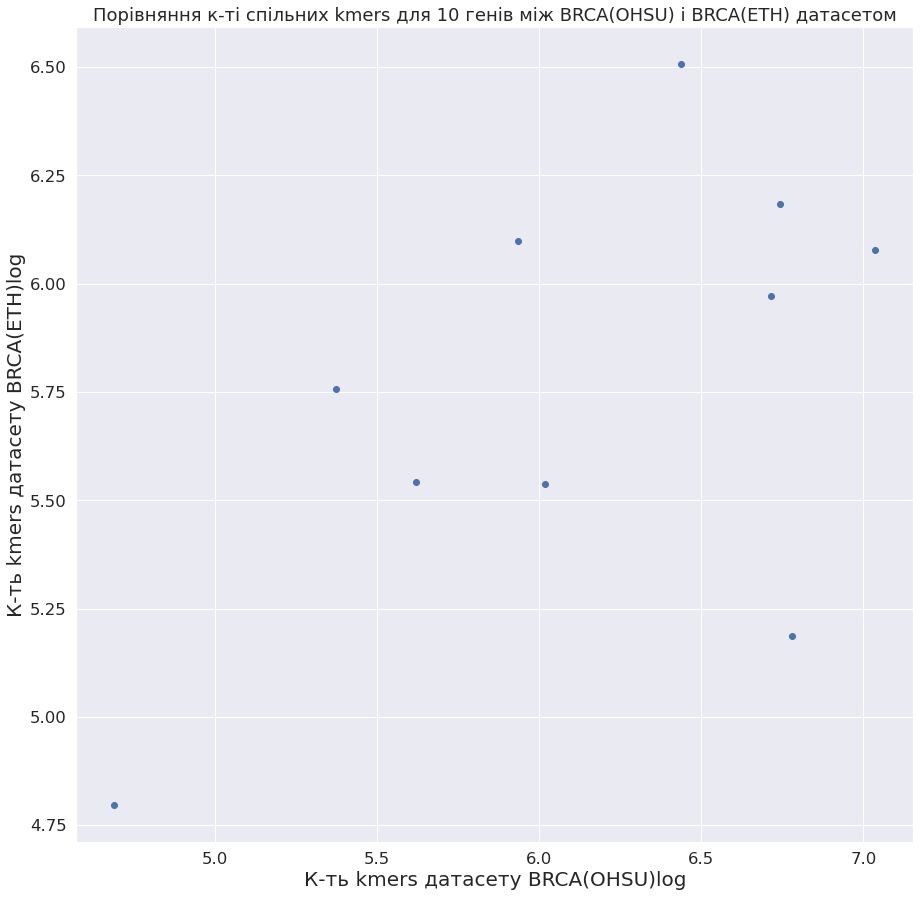

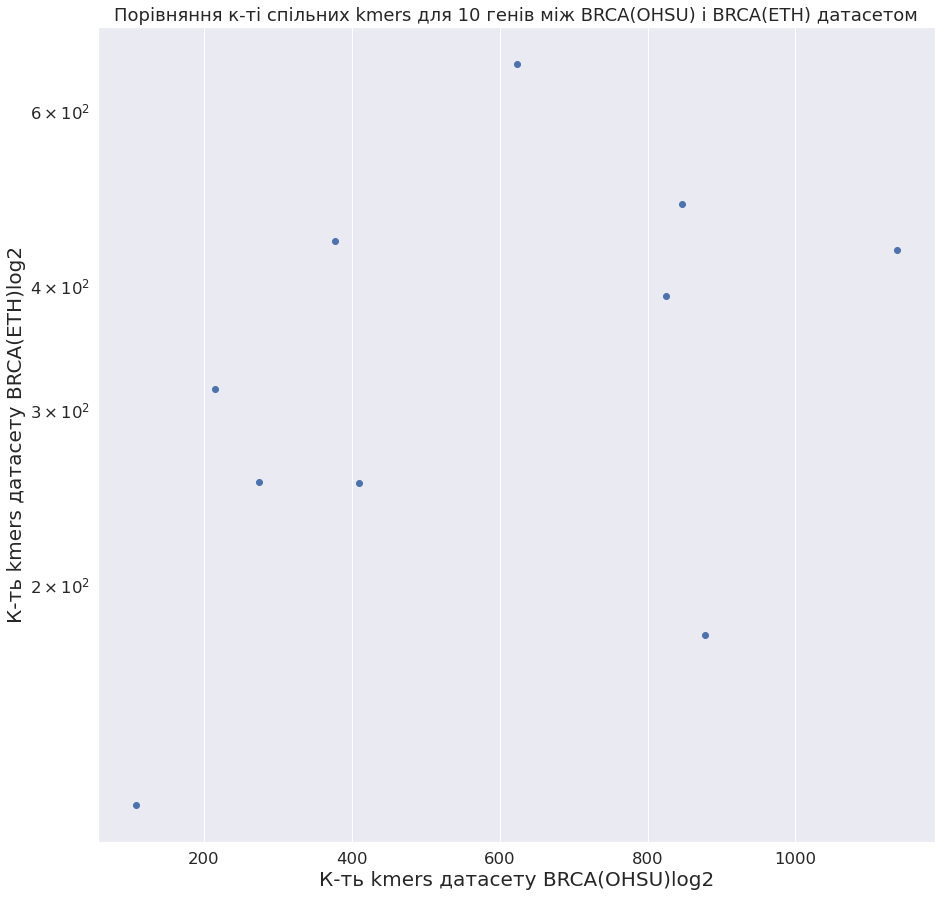

In [311]:
scatter_column_count(df_kmer, KMER_COL)
scatter_column_count_log(df_kmer, KMER_COL)
scatter_column_count_log2(df_kmer, KMER_COL)

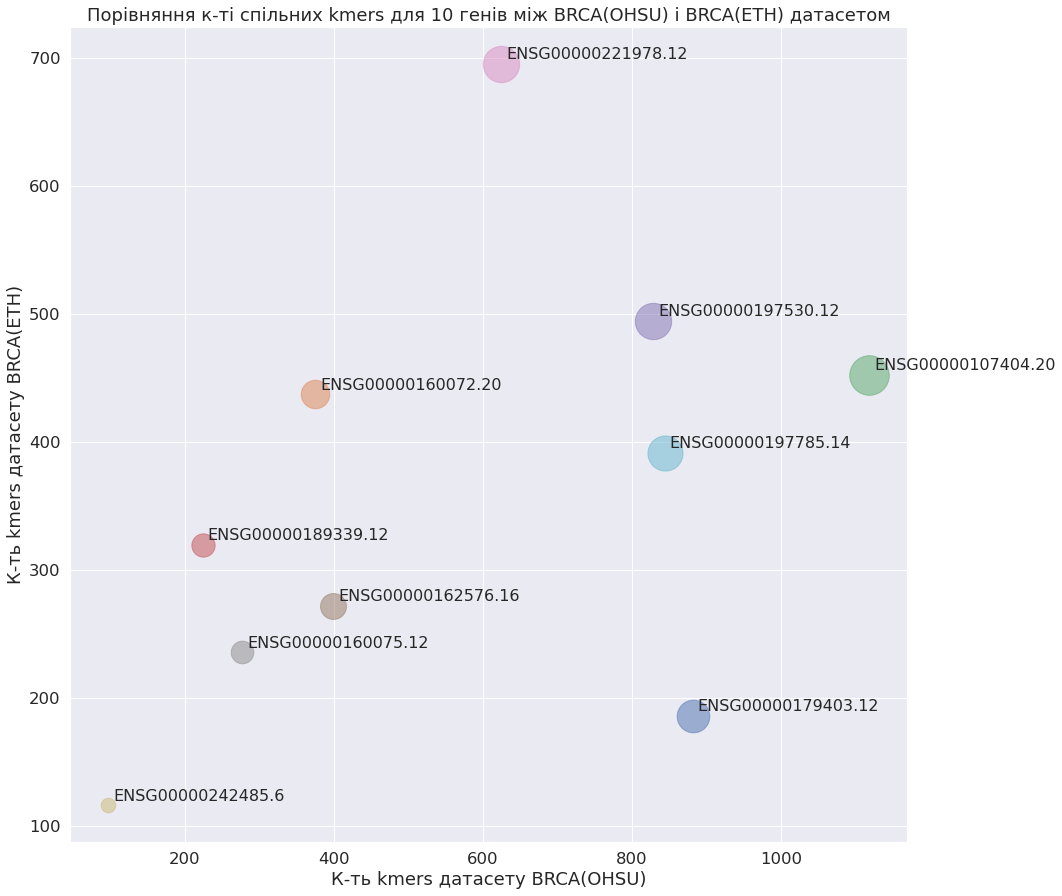

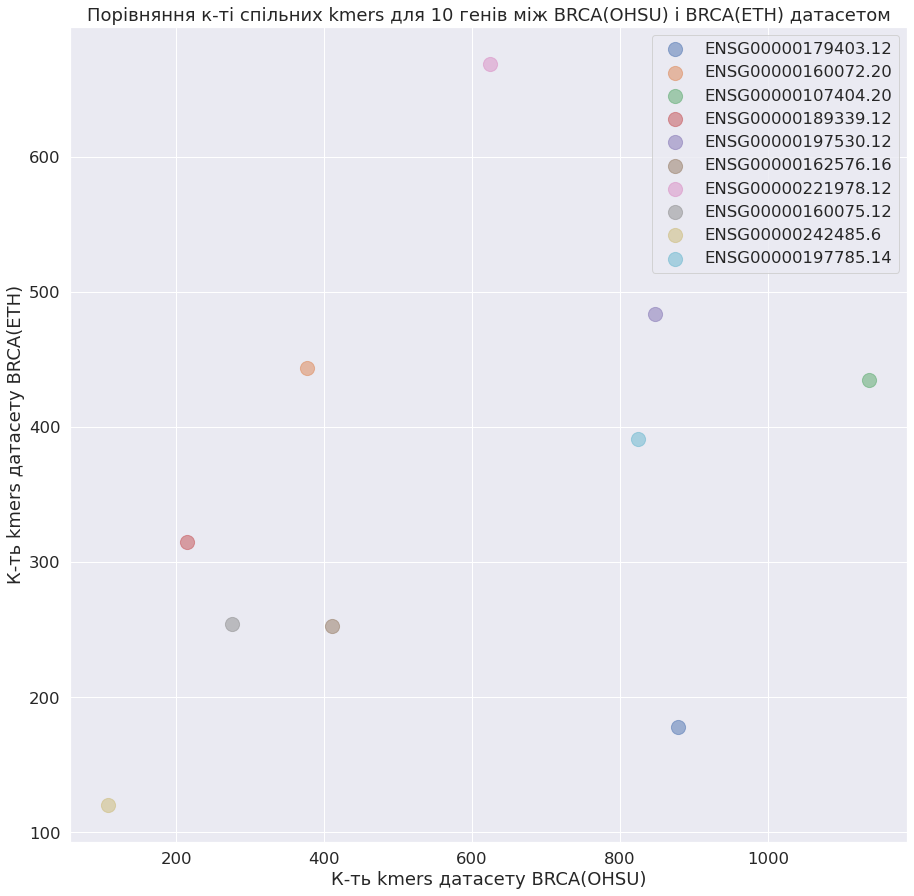

In [315]:
scatter_column_count_with_labels(df_kmer, GENE_NAMES_10, KMER_COL, True)
scatter_common_count_with_legend(df_kmer, GENE_NAMES_10, KMER_COL)

## Venn diagram of common kmers

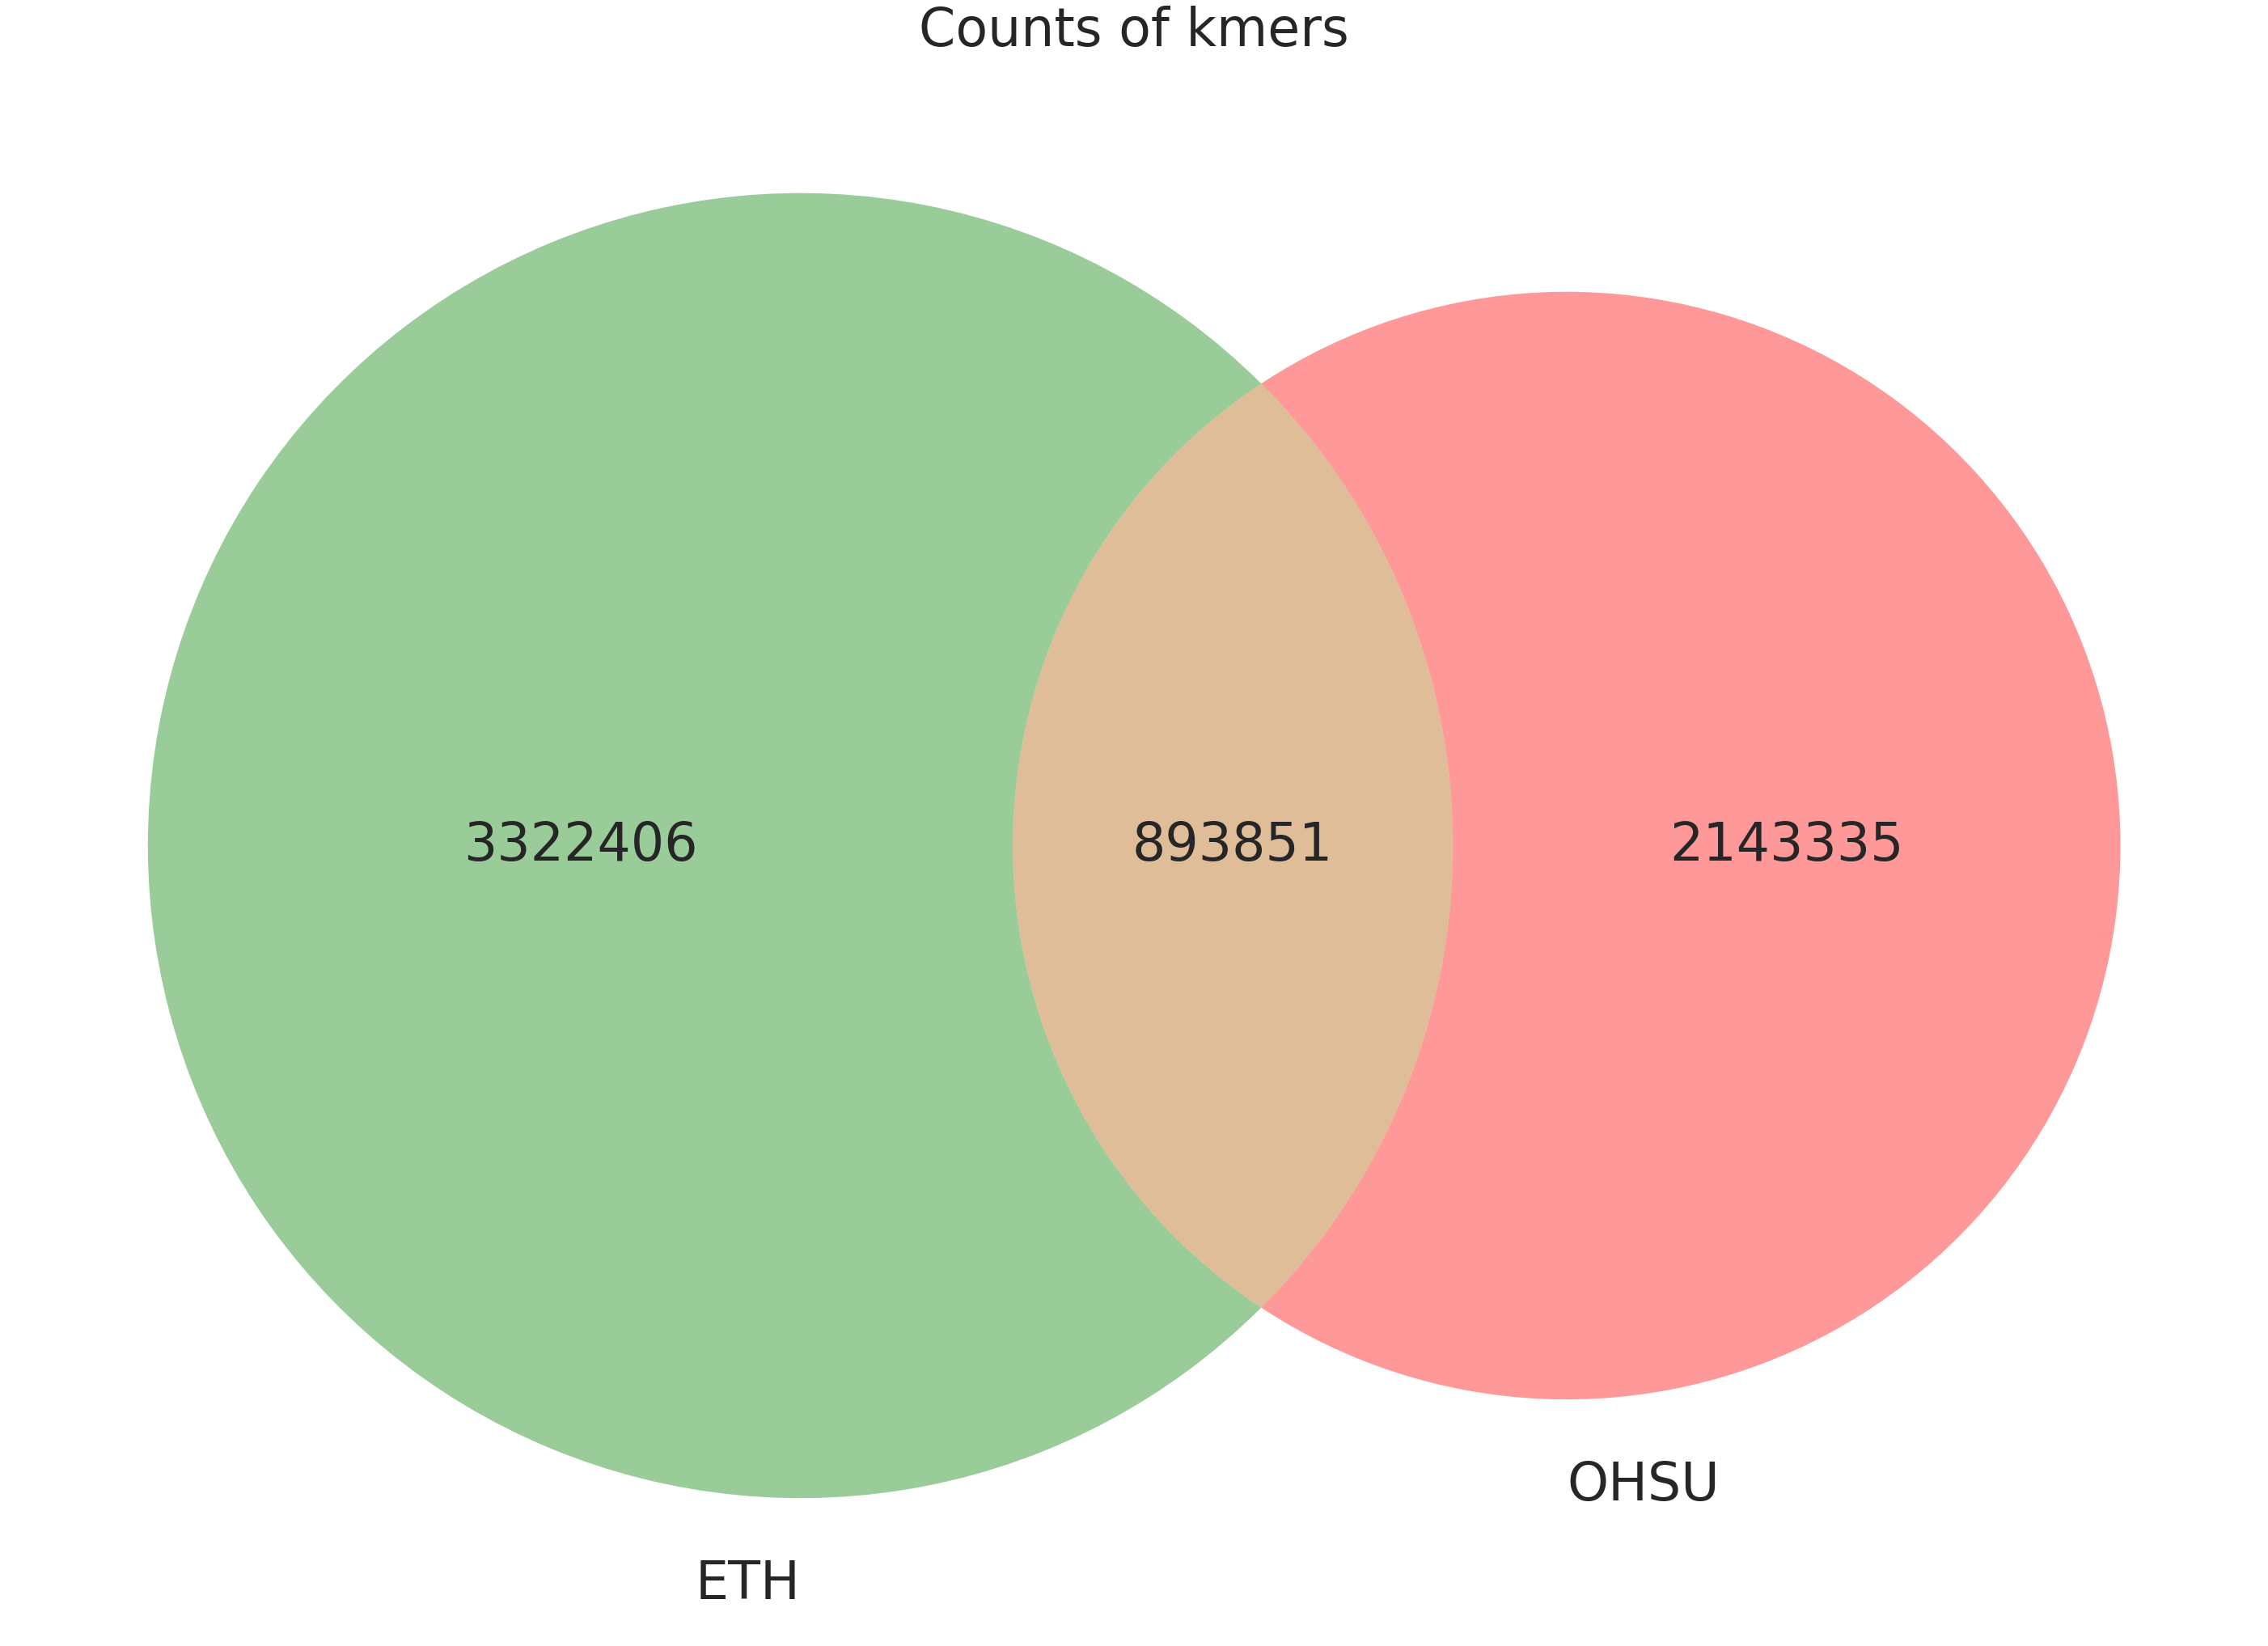

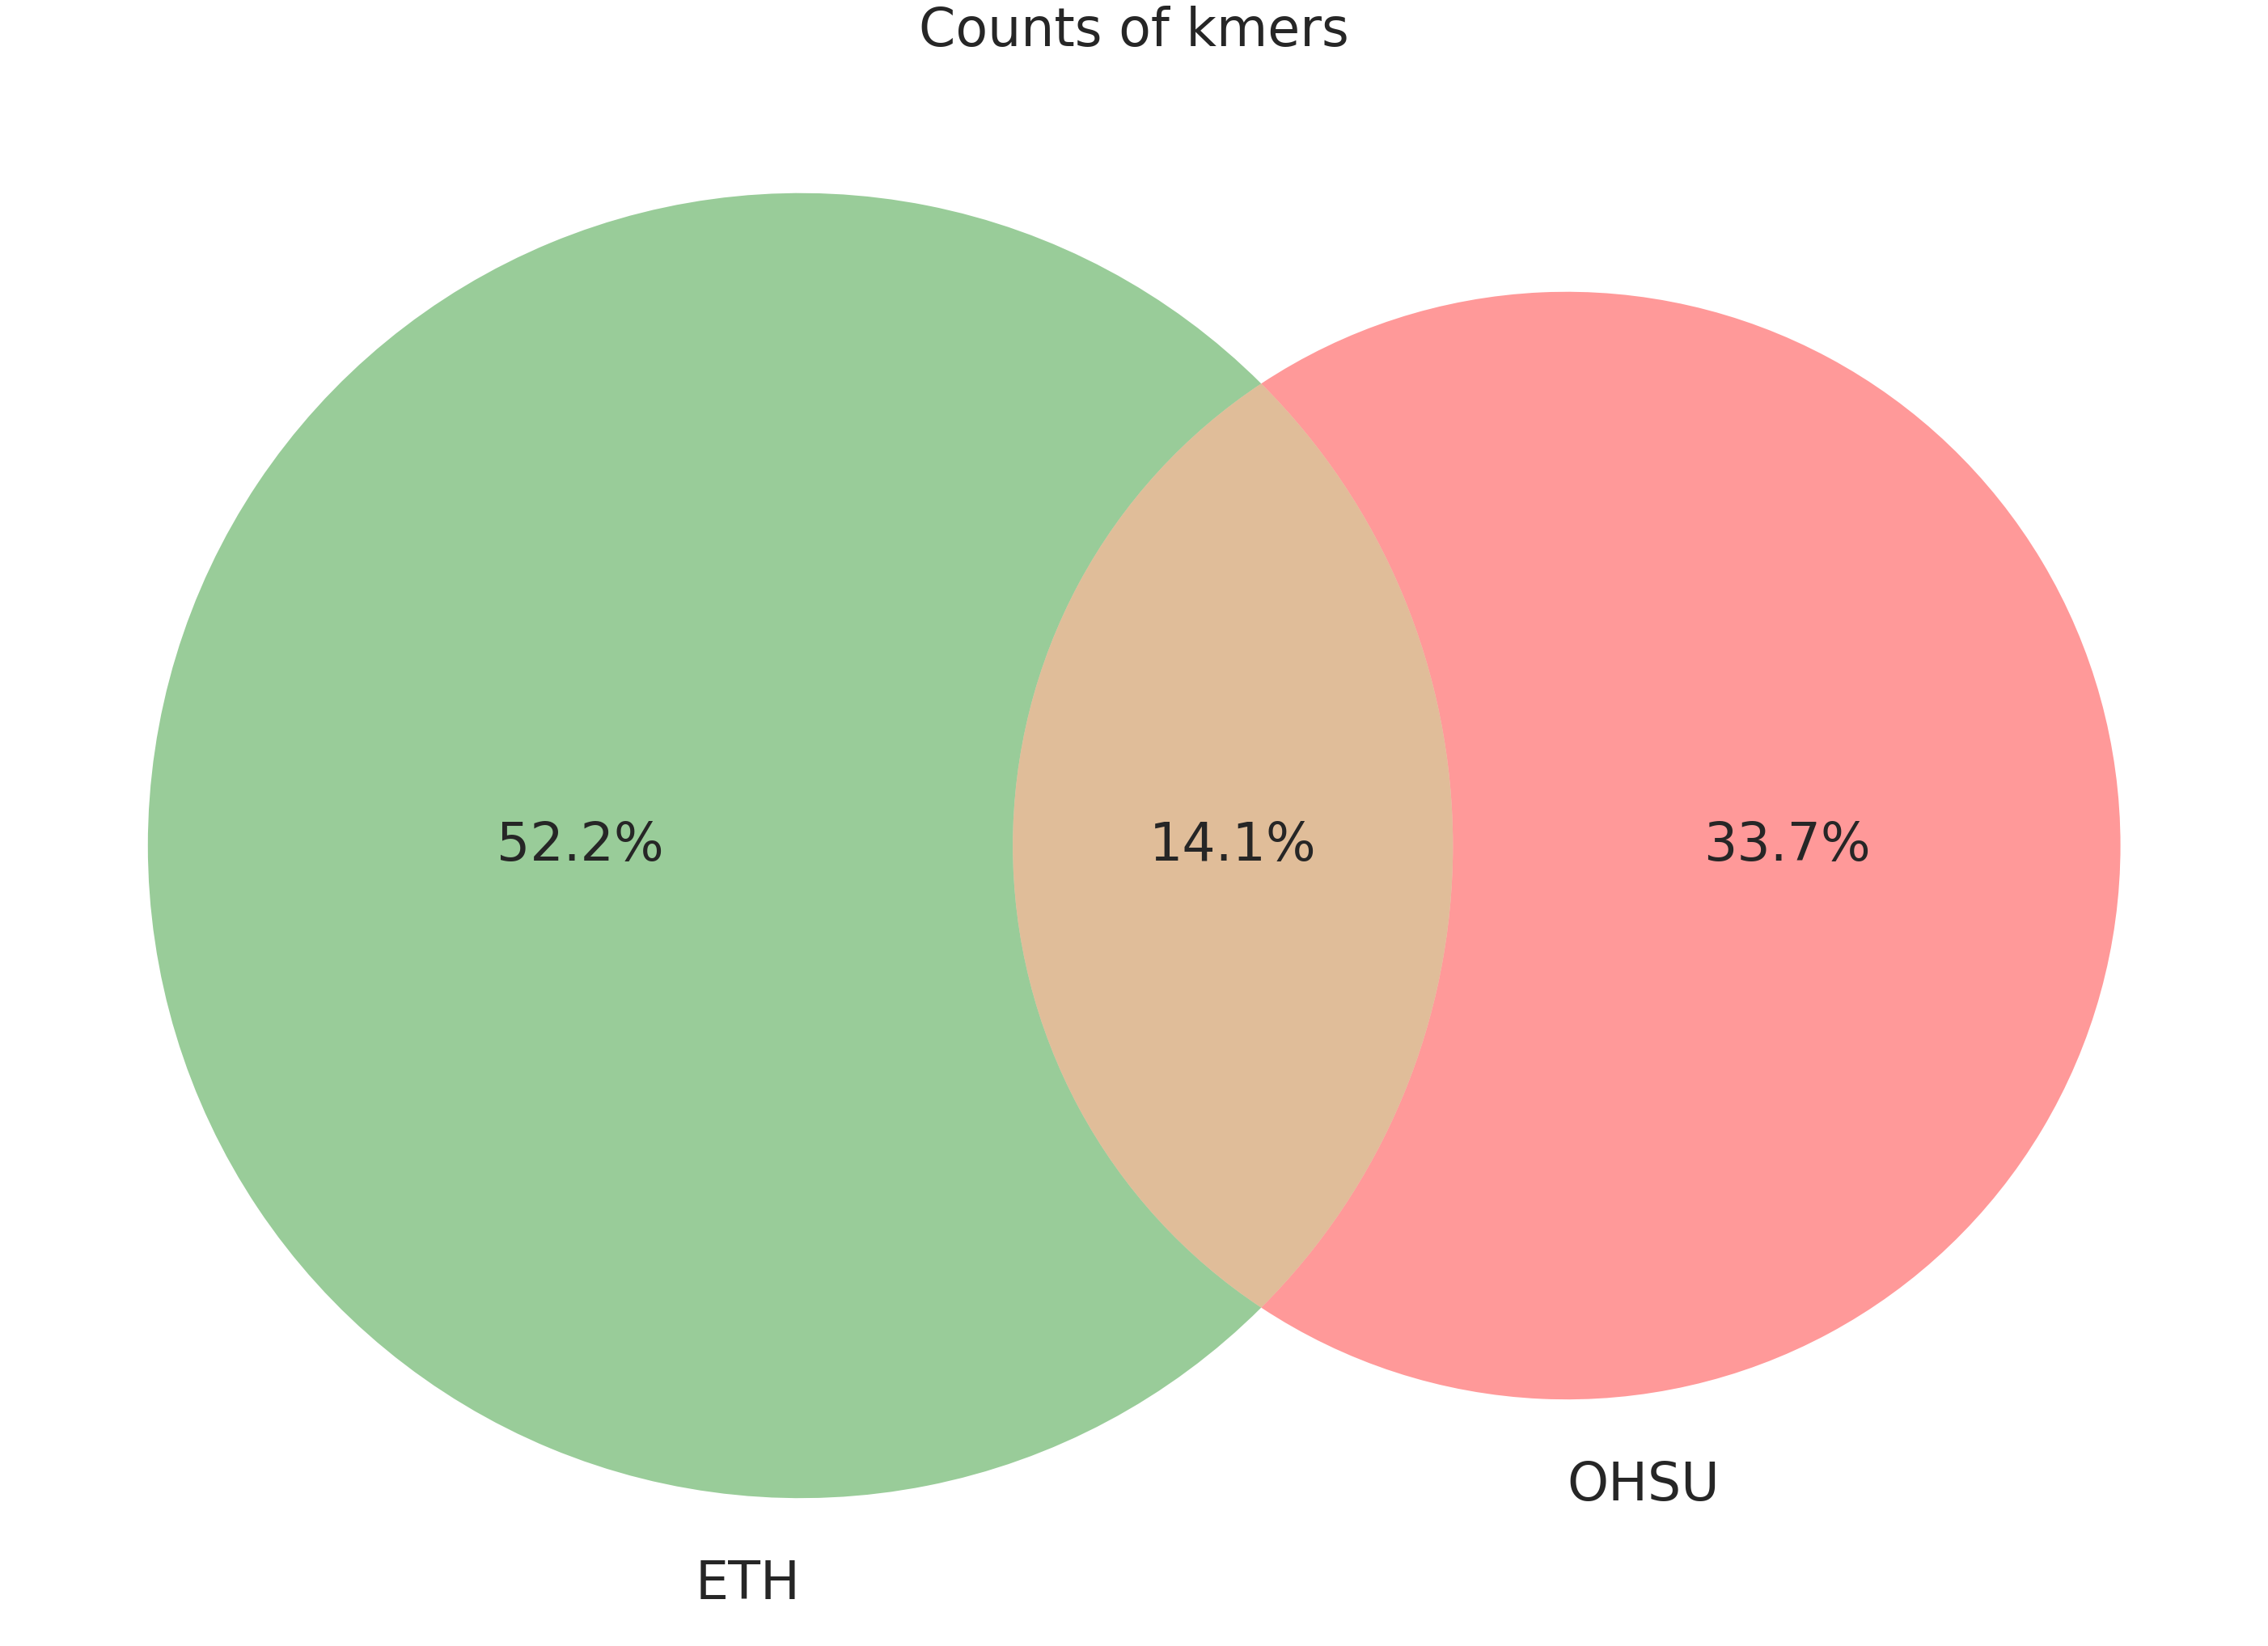

In [26]:
count1, count2, count_int = df_kmer['ETH_' + KMER_COL].sum(), df_kmer['OHSU_' + KMER_COL].sum(), df_kmer['inters_' + KMER_COL].sum()
plot_venn(count1, count2, count_int)
plot_venn_perc(count1, count2, count_int)

## Barplot of kmers

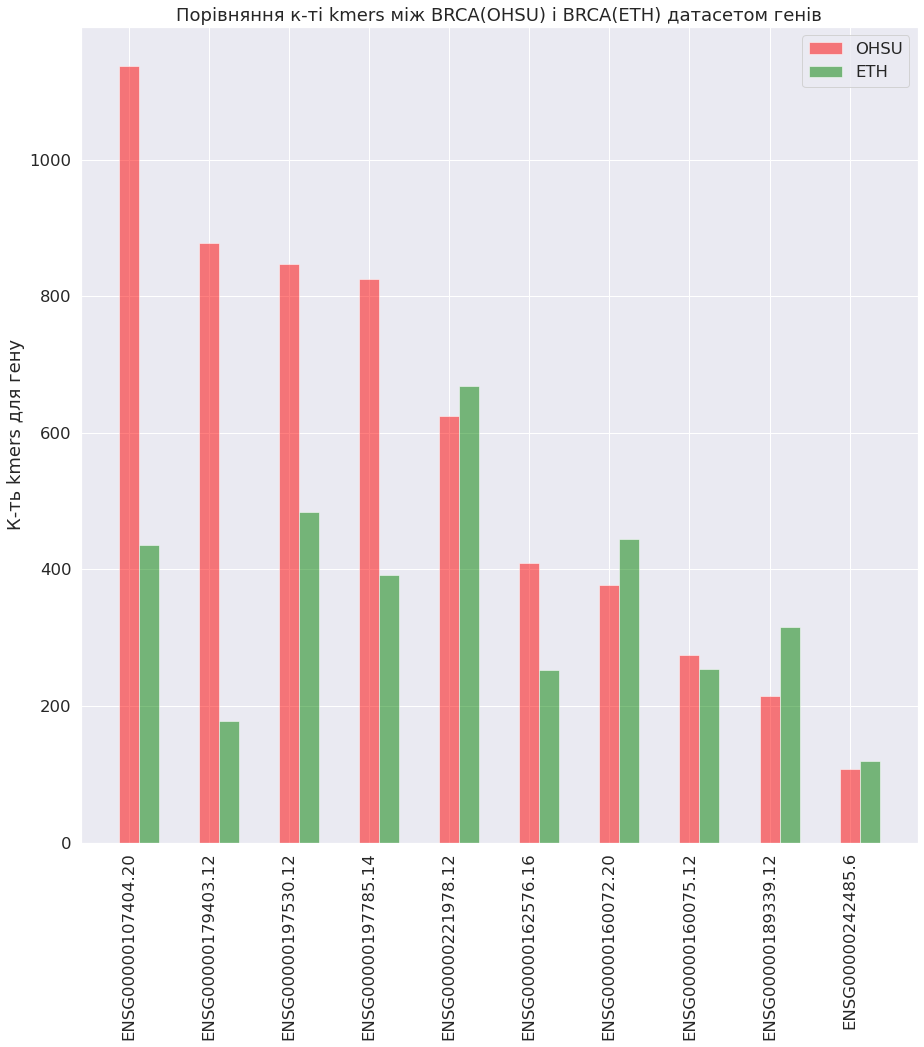

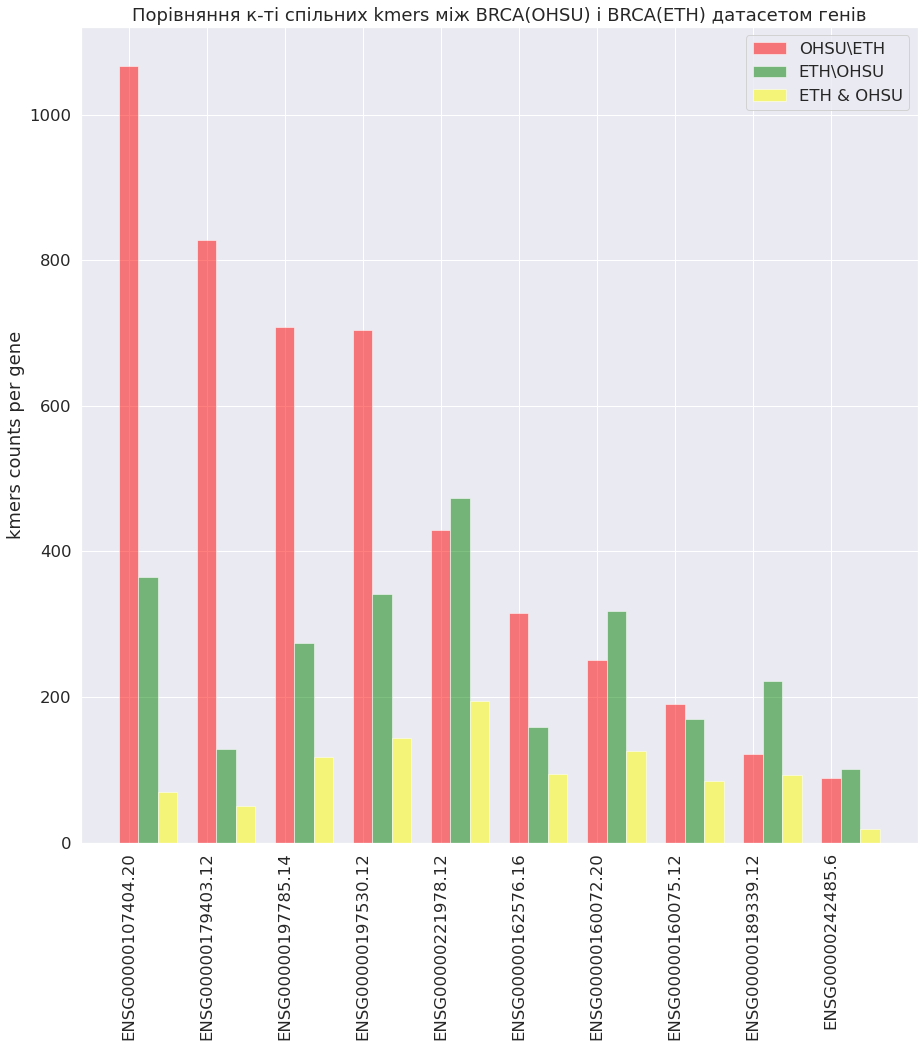

<Figure size 1080x1080 with 0 Axes>

In [317]:
'''
OHSU_#col: number of uniques valies in OHSU
    - ETH_#col: number of uniques values in ETH
    - intersection_#col: number of values in intersection
    - OHSU\ETH_#col: number of values in OHSU but not in ETH
    - ETH\OHSU_#col: number of values in ETH but not in OHSU
'''
barplot_column_count(df_kmer, GENE_NAMES_10, KMER_COL)
barplot_column_count_unique(df_kmer, GENE_NAMES_10, KMER_COL)

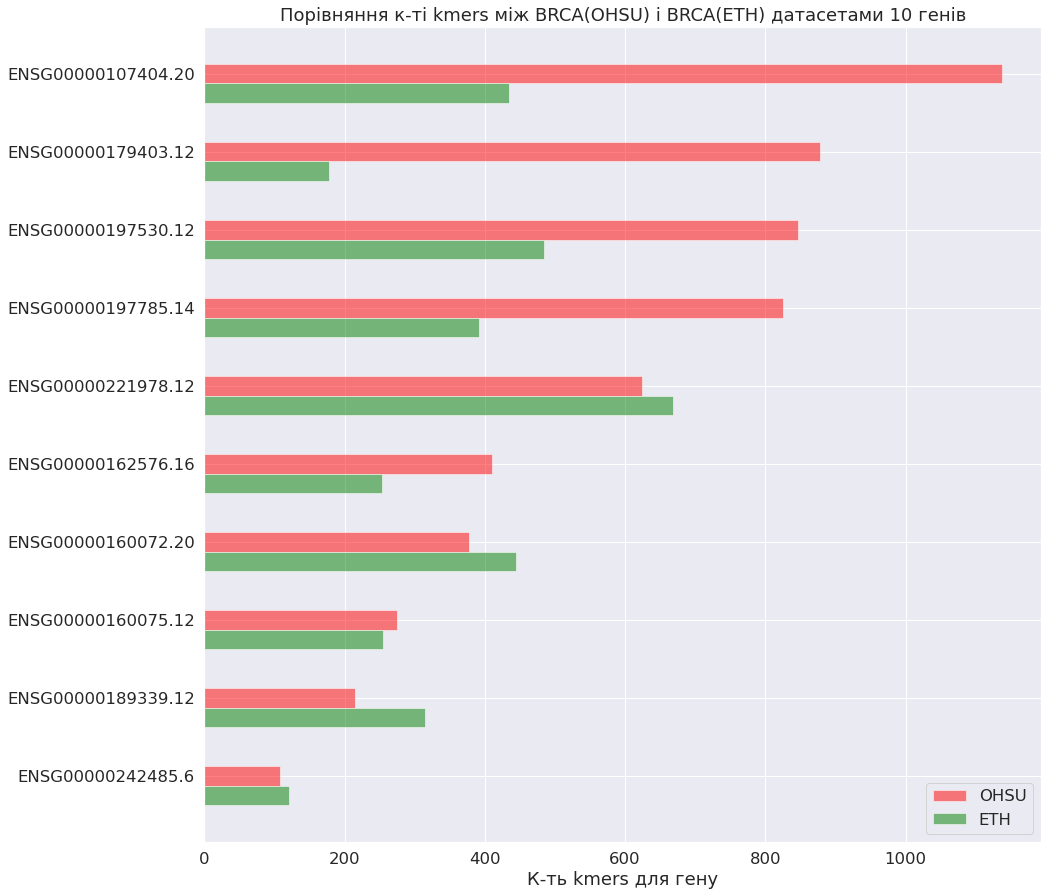

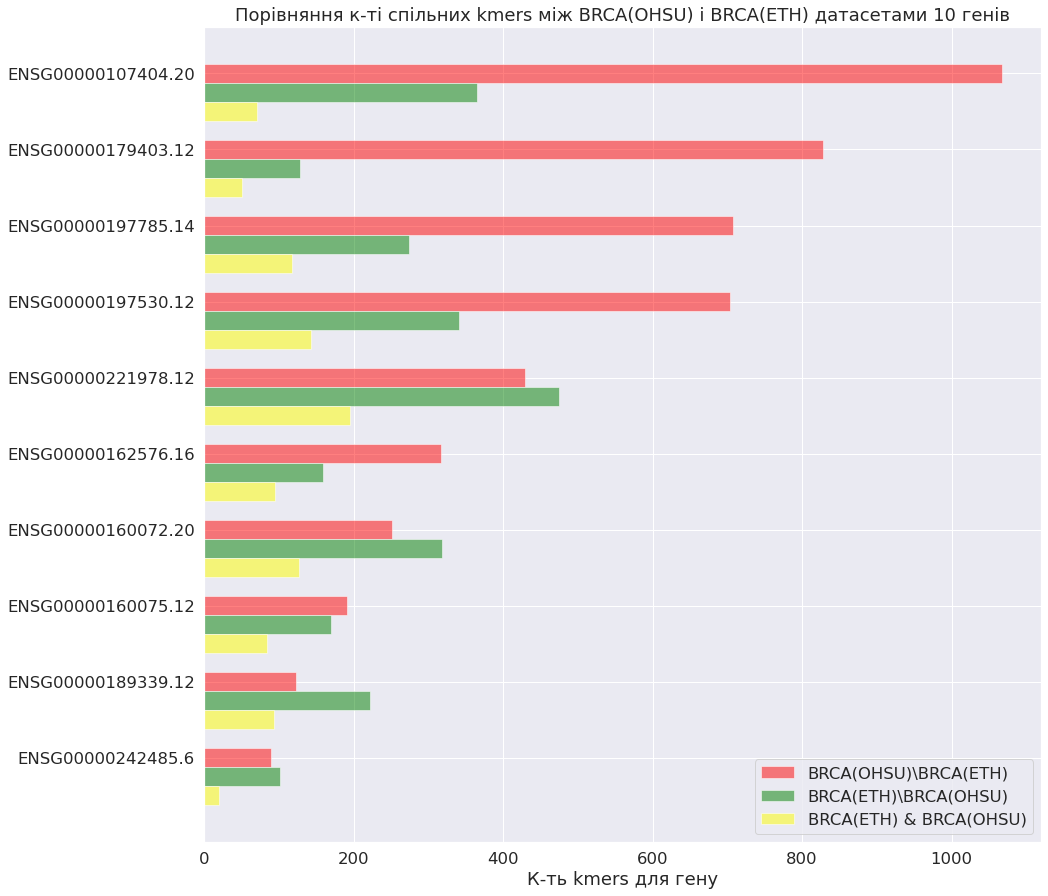

<Figure size 1080x1080 with 0 Axes>

In [323]:
barplot_column_count_horizontal(df_kmer, GENE_NAMES_10, KMER_COL)
barplot_column_count_unique_horizontal(df_kmer, GENE_NAMES_10, KMER_COL)

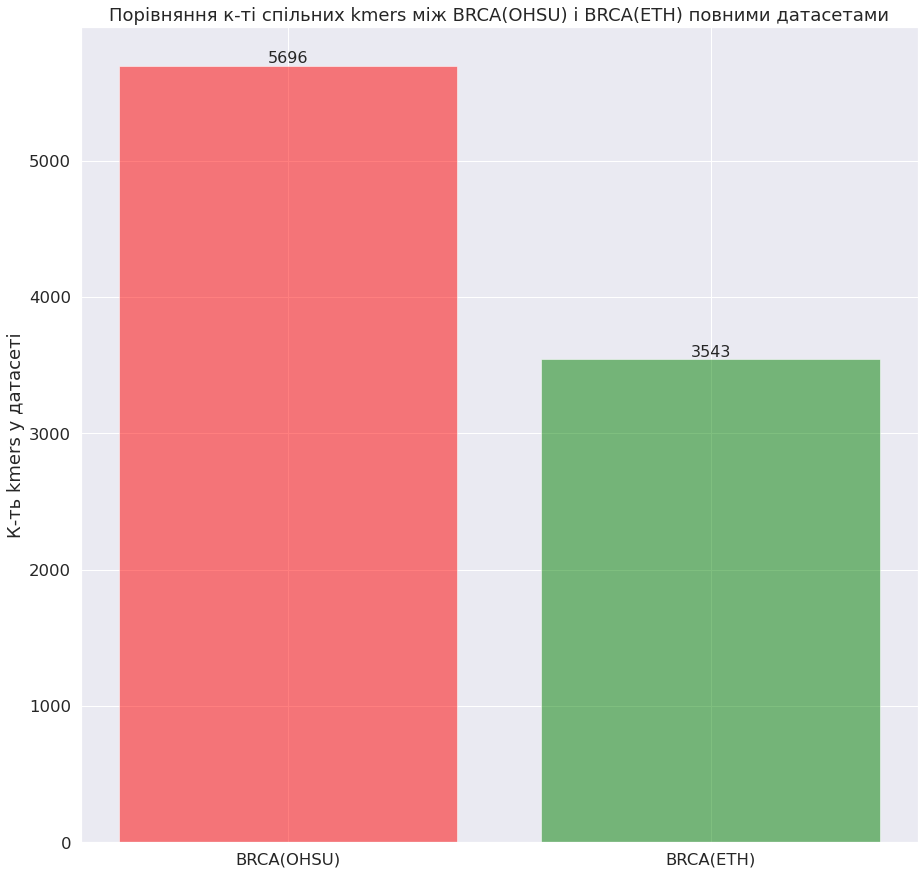

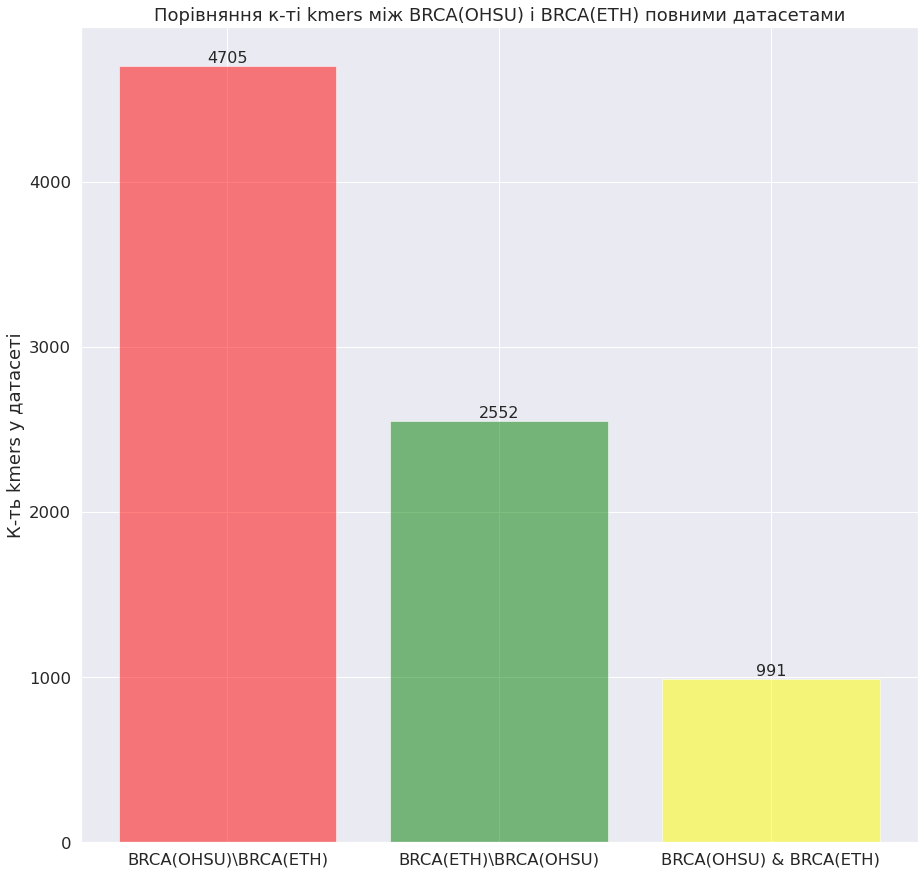

<Figure size 1080x1080 with 0 Axes>

In [327]:
barplot_column_common(df_kmer, KMER_COL)
barplot_column_common_unique(df_kmer, KMER_COL)

# Coordinates statistics

# Preprocess OHSU coord
coord column is 'jx'

In [328]:
def preprocess_ohsu_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df['strand'] = tmp_jx[3]
    df['junction_coordinate'] = (tmp_jx[1].astype(int) - 1).astype(str) + ':' + tmp_jx[2]
    return df
ohsu_df = preprocess_ohsu_coord(ohsu_df)
ohsu_df[['jx', 'junction_coordinate']]

jx junction_coordinate
135281   chr1;1338159;1338268;-     1338158:1338268
135281   chr1;1338159;1338268;-     1338158:1338268
135281   chr1;1338159;1338268;-     1338158:1338268
135281   chr1;1338159;1338268;-     1338158:1338268
135281   chr1;1338159;1338268;-     1338158:1338268
...                         ...                 ...
1228103  chr1;1629701;1630361;+     1629700:1630361
1228103  chr1;1629701;1630361;+     1629700:1630361
1228103  chr1;1629701;1630361;+     1629700:1630361
1228103  chr1;1629701;1630361;+     1629700:1630361
1228103  chr1;1629701;1630361;+     1629700:1630361

[5793 rows x 2 columns]

In [329]:
# Number of junction coordinates !CHECK FOR FULL DATASET!
tmp = ohsu_df['junction_coordinate'].str.split(':')
ohsu_df['num_coord'] = tmp.apply(len)
ohsu_df['num_coord'].value_counts()

2    5793
Name: num_coord, dtype: int64

In [330]:
ohsu_df[ohsu_df['num_coord'] == 2][['gene_id', 'kmer', 'strand', 'junction_coordinate']]

gene_id       kmer strand junction_coordinate
135281   ENSG00000107404.20  YVFGDLCSM      -     1338158:1338268
135281   ENSG00000107404.20  VFGDLCSMA      -     1338158:1338268
135281   ENSG00000107404.20  FGDLCSMAP      -     1338158:1338268
135281   ENSG00000107404.20  GDLCSMAPV      -     1338158:1338268
135281   ENSG00000107404.20  DLCSMAPVG      -     1338158:1338268
...                     ...        ...    ...                 ...
1228103  ENSG00000197530.12  QETAPATGR      +     1629700:1630361
1228103  ENSG00000197530.12  ETAPATGRW      +     1629700:1630361
1228103  ENSG00000197530.12  TAPATGRWR      +     1629700:1630361
1228103  ENSG00000197530.12  APATGRWRN      +     1629700:1630361
1228103  ENSG00000197530.12  PATGRWRNA      +     1629700:1630361

[5793 rows x 4 columns]

## Preprocess ETH coord

In [331]:
def get_junction_coordinates(df, coordinates_col, sep=':'):
    df['strand'] = None
    df['junction_coordinate'] = None

    for idx, row in tqdm.tqdm(df.iterrows()):
        kmer_coordinates = [int(x) for x in row[coordinates_col].split(sep) if x !='None']

        if kmer_coordinates[1] < kmer_coordinates[2]: # order strand +

            df.loc[idx, 'strand'] = '+'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:3]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:5]])
        else: # order strand +
            df.loc[idx, 'strand'] = '-'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0]]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0],
                                                                                kmer_coordinates[2],
                                                                                kmer_coordinates[5]
                                                                               ]])
    return df

eth_df = get_junction_coordinates(eth_df, 'coord')
eth_df[['coord', 'junction_coordinate']]

3714it [00:00, 7060.46it/s]


coord junction_coordinate
0     1348895:1348915:1342477:1342484:None:None     1342484:1348895
1     1348895:1348900:1348393:1348415:None:None     1348415:1348895
2     1342362:1342376:1341961:1341974:None:None     1341974:1342362
3     1342052:1342064:1341959:1341974:None:None     1341974:1342052
4     1340458:1340475:1338362:1338372:None:None     1338372:1340458
...                                         ...                 ...
4007  1629681:1629704:1630291:1630295:None:None     1629704:1630291
4008  1625425:1625428:1625557:1625581:None:None     1625428:1625557
4009  1625425:1625428:1625908:1625932:None:None     1625428:1625908
4010  1627433:1627444:1628018:1628034:None:None     1627444:1628018
4011  1624887:1624901:1625310:1625323:None:None     1624901:1625310

[3714 rows x 2 columns]

In [332]:
# Number of junction coordinates !CHECK FOR FULL DATASET!
tmp = eth_df['junction_coordinate'].str.split(':')
eth_df['num_coord'] = tmp.apply(len)
eth_df['num_coord'].value_counts()

2    3623
4      91
Name: num_coord, dtype: int64

In [333]:
eth_df[eth_df['num_coord'] == 4][['gene_id', 'kmer', 'strand', 'junction_coordinate']]

gene_id       kmer strand              junction_coordinate
543   ENSG00000189339.12  PKGEPSMLG      -  1676395:1676632:1676377:1676199
638   ENSG00000189339.12  PKGEPSMLA      -  1676395:1676632:1676377:1676128
708   ENSG00000189339.12  KGEPSMLGA      -  1676395:1676632:1676377:1676199
723   ENSG00000189339.12  GEPSMLAQG      -  1676395:1676632:1676377:1676128
754   ENSG00000189339.12  KGEPSMLAQ      -  1676395:1676632:1676377:1676128
...                  ...        ...    ...                              ...
3259  ENSG00000160075.12  LYTQNGIKR      -  1545002:1564772:1544983:1544962
3429  ENSG00000160075.12  ELYTQNGIK      -  1545002:1564772:1544983:1544962
3471  ENSG00000197530.12  VQGAHDLLL      +  1623482:1623659:1623679:1623773
3481  ENSG00000197530.12  RERQAGGGR      +  1629311:1629384:1629404:1629487
3802  ENSG00000197530.12  QGAHDLLLR      +  1623482:1623659:1623679:1623773

[91 rows x 4 columns]

In [334]:
def filter_df_common_kmers(df1, df2):
    '''
    Filter input datframes, so that they have only records with common pairs gene + kmer
    '''
    print('Initials sizes: ', len(df1), len(df2))
    gene_names = common_genes(df1, df2)
    df1 = df1[df1['gene_id'].isin(gene_names)]
    df1_grouped = df1.groupby('gene_id')
    df2 = df2[df2['gene_id'].isin(gene_names)]
    df2_grouped = df2.groupby('gene_id')
    dfs1 = []
    dfs2 = []
    for gene in tqdm.tqdm(gene_names):
        d1 = df1_grouped.get_group(gene)
        d2 = df2_grouped.get_group(gene)
        common_kmer = set(d1['kmer']) & set(d2['kmer'])
        if len(common_kmer) == 0:
            print("There are no common kmers for gene: ", gene)
        else:
            d1 = d1[d1['kmer'].isin(common_kmer)]
            d2 = d2[d2['kmer'].isin(common_kmer)]
            d1['gene_id'] = gene
            dfs1.append(d1)
            d2['gene_id'] = gene
            dfs2.append(d2)
    df1, df2 = pd.concat(dfs1, axis=0, ignore_index=True), pd.concat(dfs2, axis=0, ignore_index=True)
    print('Result sizes: ', len(df1), len(df2))
    return df1, df2

df1 = eth_df.copy()
df2 = ohsu_df.copy()
df1, df2 = filter_df_common_kmers(df1, df2)

# Number of junction coordinates !CHECK FOR FULL DATASET!
tmp = df1['junction_coordinate'].str.split(':')
df1['num_coord'] = tmp.apply(len)
df1['num_coord'].value_counts()

Initials sizes:  3714 5793
OHSU number of genes: 10
ETH number of genes: 10
Number of common genes: 10


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 742.51it/s]

Result sizes:  1083 1039


2    1053
4      30
Name: num_coord, dtype: int64

In [335]:
df1[df1['num_coord'] == 4][['gene_id', 'kmer', 'strand', 'junction_coordinate']]

gene_id       kmer strand              junction_coordinate
679   ENSG00000221978.12  QTSWVASED      -  1392803:1393395:1392789:1391575
694   ENSG00000221978.12  WVASEVDSF      -  1392803:1393395:1392789:1391438
714   ENSG00000221978.12  SWVASEVDS      -  1392803:1393395:1392789:1391438
718   ENSG00000221978.12  TSWVASEVD      -  1392803:1393395:1392789:1391438
733   ENSG00000221978.12  TSWVASEDP      -  1392803:1393395:1392789:1391575
745   ENSG00000221978.12  KLESRCVAR      -  1388510:1390229:1388491:1388050
757   ENSG00000221978.12  QTSWVASEG      -  1392803:1393395:1392789:1390865
762   ENSG00000221978.12  AGVSLCCQW      -  1388510:1390229:1388491:1388065
766   ENSG00000221978.12  SWVASEGIT      -  1392803:1393395:1392789:1390865
796   ENSG00000221978.12  TSWVASEGI      -  1392803:1393395:1392789:1390865
800   ENSG00000221978.12  PKLGAGITA      -  1388830:1390229:1388815:1388743
808   ENSG00000221978.12  WVASEDPLL      -  1392803:1393395:1392789:1391575
874   ENSG00000221978.12  GVSLCCQWN      -  1388510:1390229:1388491:1388065
883   ENSG00000221978.12  QTSWVASEV      -  1392803:1393395:1392789:1391438
894   ENSG00000221978.12  SWVASEDPL      -  1392803:1393395:1392789:1391575
987   ENSG00000162576.16  DYKNNILSV      -  1353928:1354029:1353908:1353558
1003  ENSG00000162576.16  GSAVLLHSG      -  1356704:1361241:1356680:1355752
1010  ENSG00000162576.16  SSAVLLHSA      -  1356704:1358455:1356680:1355345
1024  ENSG00000162576.16  GSAVLLHSG      -  1356704:1361241:1356680:1355836
1027  ENSG00000162576.16  GVGKVKGEG      -  1354209:1354353:1354192:1354106
1040  ENSG00000162576.16  GSAVLLHSG      -  1356704:1361241:1356680:1356442
1041  ENSG00000162576.16  GEVGKVKGE      -  1354212:1354353:1354192:1354106
1044  ENSG00000162576.16  SSAVLLHSA      -  1356704:1358455:1356680:1355152
1045  ENSG00000162576.16  LDYKNNILS      -  1353928:1354029:1353908:1353558
1053  ENSG00000162576.16  EVGKVKGEG      -  1354212:1354353:1354192:1354106
1063  ENSG00000162576.16  GSAVLLHSA      -  1356704:1361241:1356680:1355152
1066  ENSG00000162576.16  VGKVKGEGC      -  1354209:1354353:1354192:1354106
1072  ENSG00000162576.16  RGVGKVKGE      -  1354209:1354353:1354192:1354106
1073  ENSG00000162576.16  GSAVLLHSG      -  1356704:1361241:1356680:1355801
1076  ENSG00000162576.16  GSAVLLHSA      -  1356704:1361241:1356680:1355345

# Coordinate analysis

In [336]:
COORD_COL = 'coord'
if os.path.exists(COORD_STAT_DATASET):
    print('Coordinates statistic are cached')
    df_coord = load_common_statistics(COORD_STAT_DATASET)
else:
    df_coord = get_common_statistics(df2, df1, 'junction_coordinate', COORD_COL, gene_names_intersection)
    df_coord = save_load_common_statistics(df_coord, COORD_STAT_DATASET)    
df_coord

Coordinates statistic are cached


gene_id  OHSU_coord  ETH_coord  inters_coord  OHSU\ETH_coord  \
0  ENSG00000179403.12          10         14             6               4   
1  ENSG00000160072.20          21         26            19               2   
2  ENSG00000107404.20          14         14             8               6   
3  ENSG00000189339.12          13         19            11               2   
4  ENSG00000197530.12          23         25            19               4   
5  ENSG00000162576.16          15         26            12               3   
6  ENSG00000221978.12          22         37            20               2   
7  ENSG00000160075.12          13         19            10               3   
8   ENSG00000242485.6           4          4             2               2   
9  ENSG00000197785.14          20         22            18               2   

   ETH\OHSU_coord  
0               8  
1               7  
2               6  
3               8  
4               6  
5              14  
6              17  
7               9  
8               2  
9               4

In [171]:
df_coord.insert(4, 'inters_kmers', df_kmer['inters_kmers'])
df_coord

gene_id  OHSU_coord  ETH_coord  inters_coord  inters_kmers  \
0  ENSG00000179403.12          10         14             6            50   
1  ENSG00000160072.20          21         26            19           126   
2  ENSG00000107404.20          14         14             8            70   
3  ENSG00000189339.12          13         19            11            93   
4  ENSG00000197530.12          23         25            19           143   
5  ENSG00000162576.16          15         26            12            94   
6  ENSG00000221978.12          22         37            20           195   
7  ENSG00000160075.12          13         19            10            84   
8   ENSG00000242485.6           4          4             2            19   
9  ENSG00000197785.14          20         22            18           117   

   OHSU\ETH_coord  ETH\OHSU_coord  
0               4               8  
1               2               7  
2               6               6  
3               2               8  
4               4               6  
5               3              14  
6               2              17  
7               3               9  
8               2               2  
9               2               4

In [172]:
# 10 smalles in coordinates intersection
df_coord.nsmallest(10, ['inters_coord'])

gene_id  OHSU_coord  ETH_coord  inters_coord  inters_kmers  \
8   ENSG00000242485.6           4          4             2            19   
0  ENSG00000179403.12          10         14             6            50   
2  ENSG00000107404.20          14         14             8            70   
7  ENSG00000160075.12          13         19            10            84   
3  ENSG00000189339.12          13         19            11            93   
5  ENSG00000162576.16          15         26            12            94   
9  ENSG00000197785.14          20         22            18           117   
1  ENSG00000160072.20          21         26            19           126   
4  ENSG00000197530.12          23         25            19           143   
6  ENSG00000221978.12          22         37            20           195   

   OHSU\ETH_coord  ETH\OHSU_coord  
8               2               2  
0               4               8  
2               6               6  
7               3               9  
3               2               8  
5               3              14  
9               2               4  
1               2               7  
4               4               6  
6               2              17

## Scatter plot of coordinates

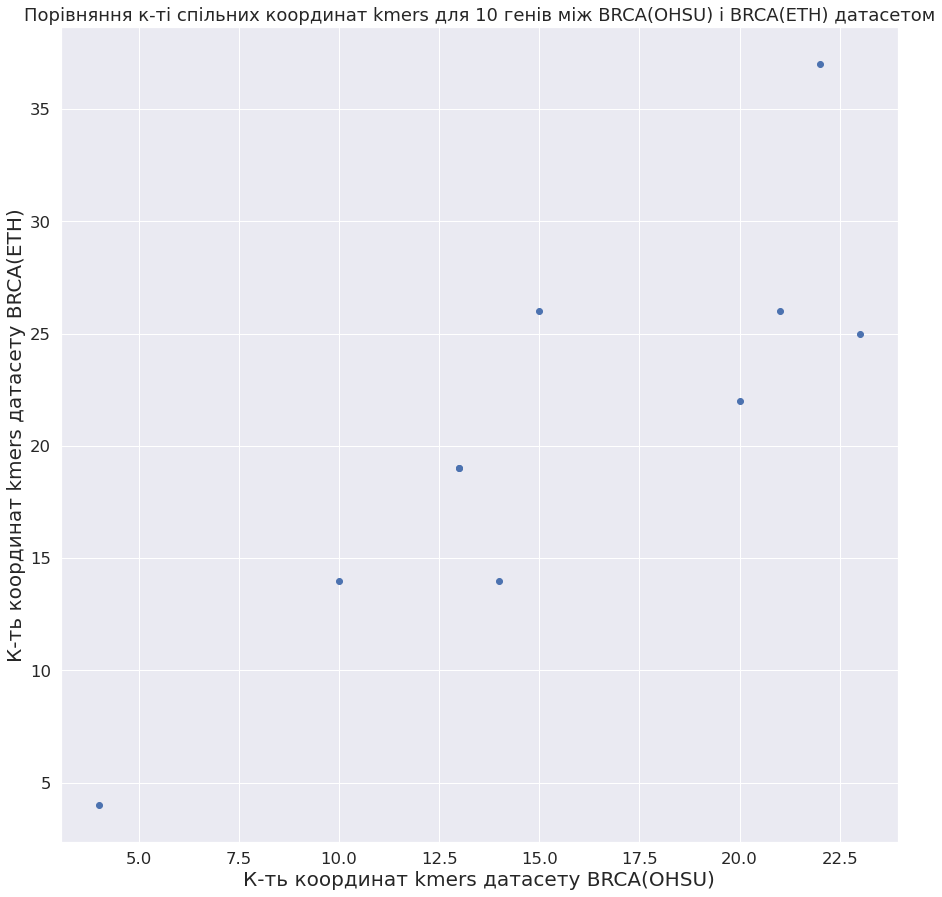

In [341]:
scatter_column_count(df_coord, COORD_COL)

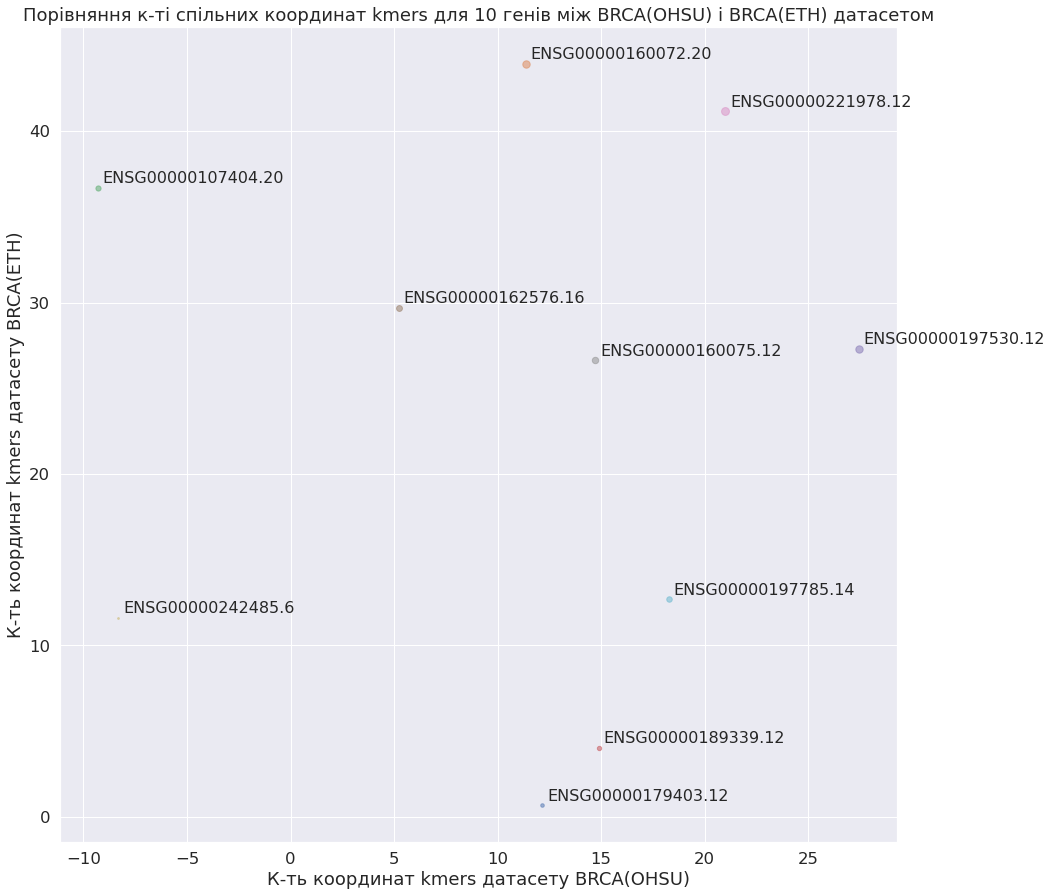

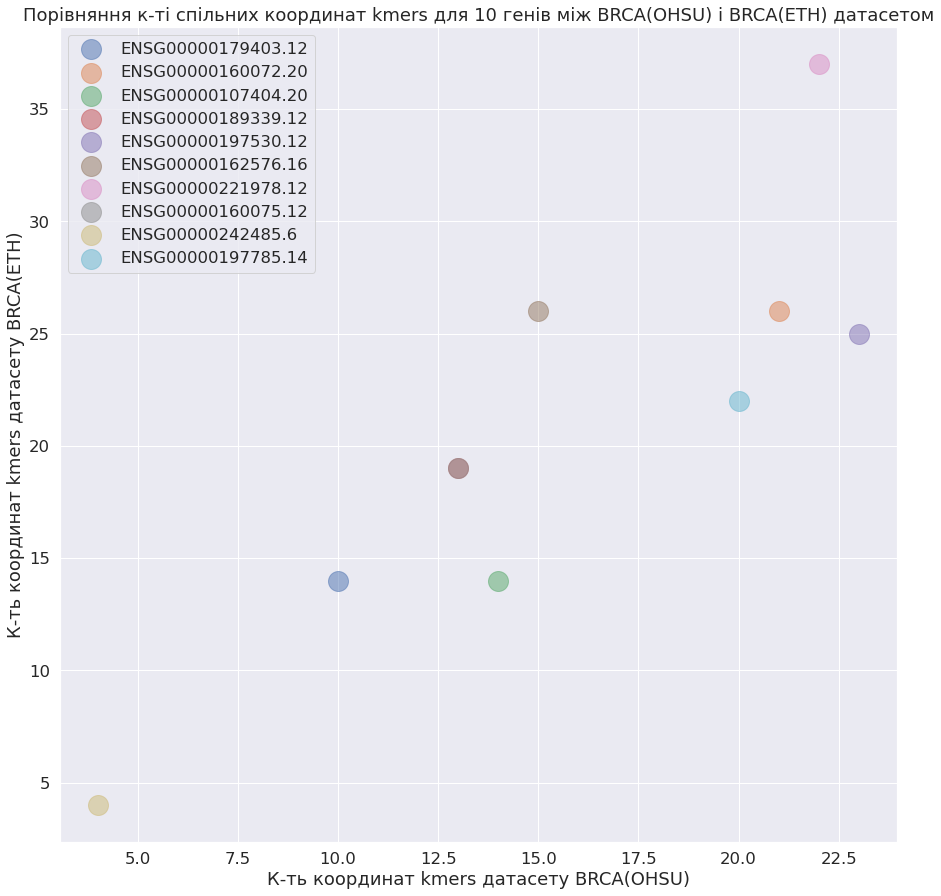

In [357]:
scatter_column_count_with_labels(df_coord, GENE_NAMES_10, COORD_COL, True)
scatter_common_count_with_legend(df_coord, GENE_NAMES_10, COORD_COL)

## Venn diagram of coordinates

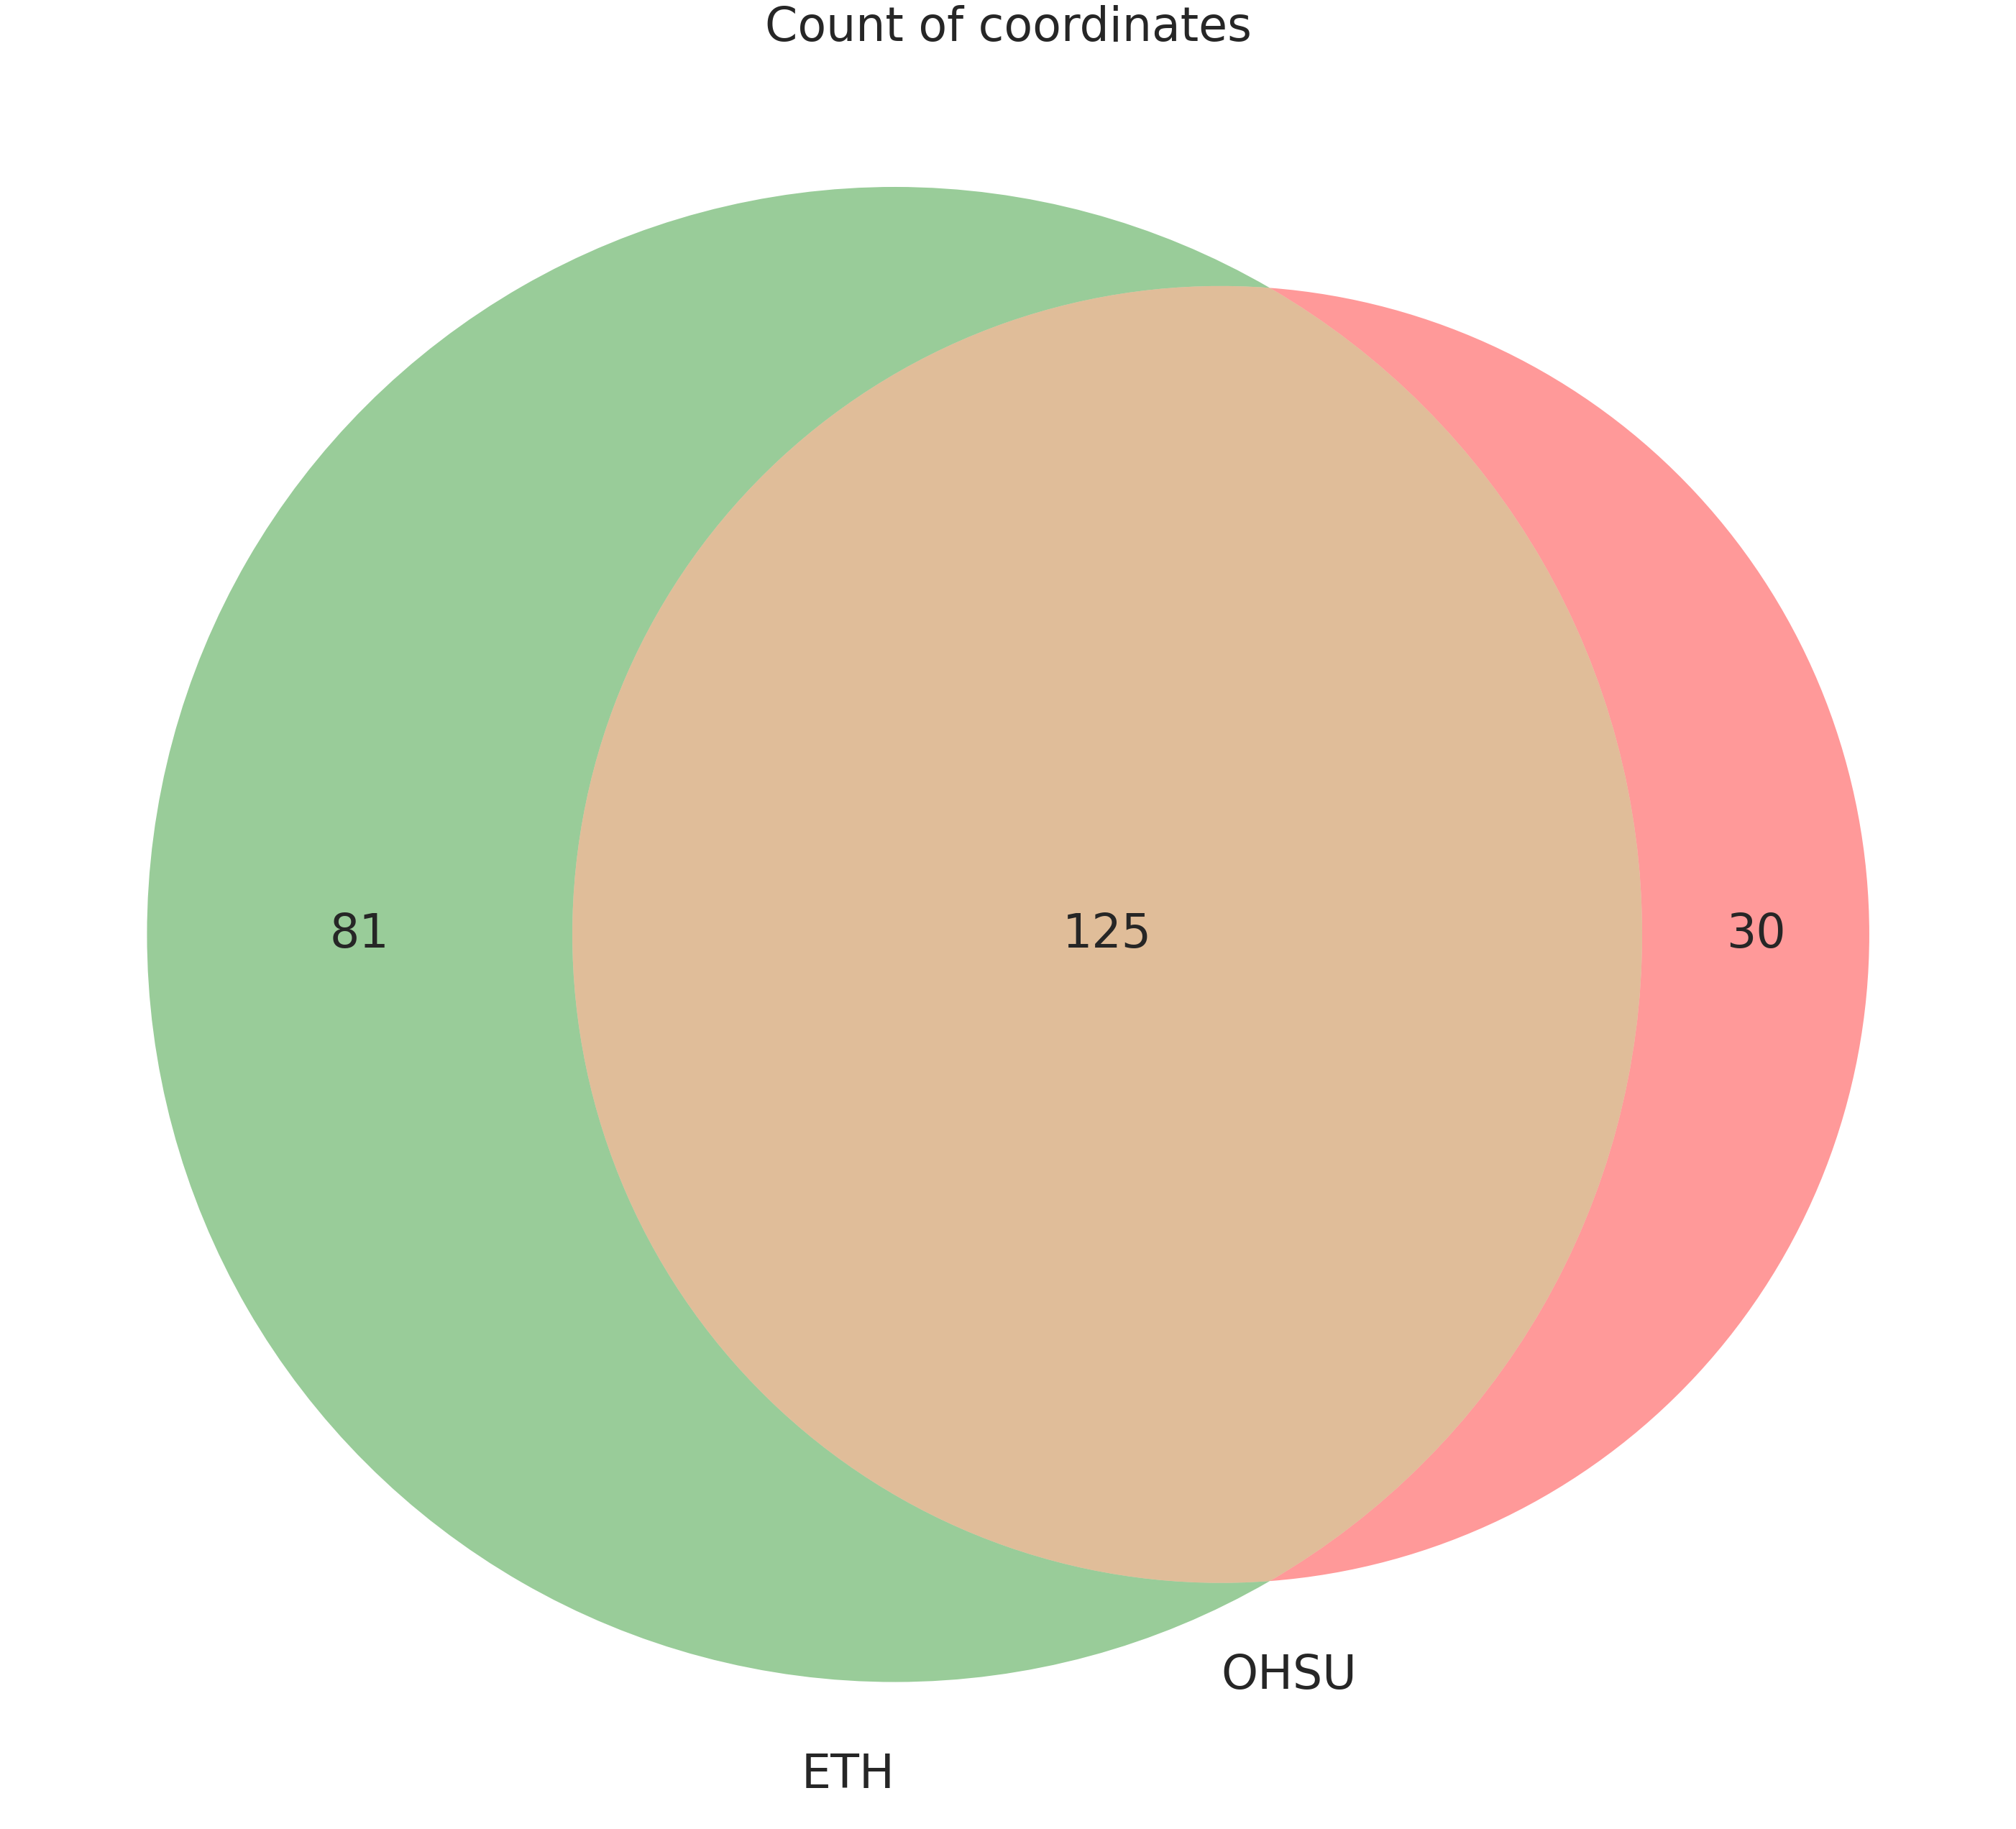

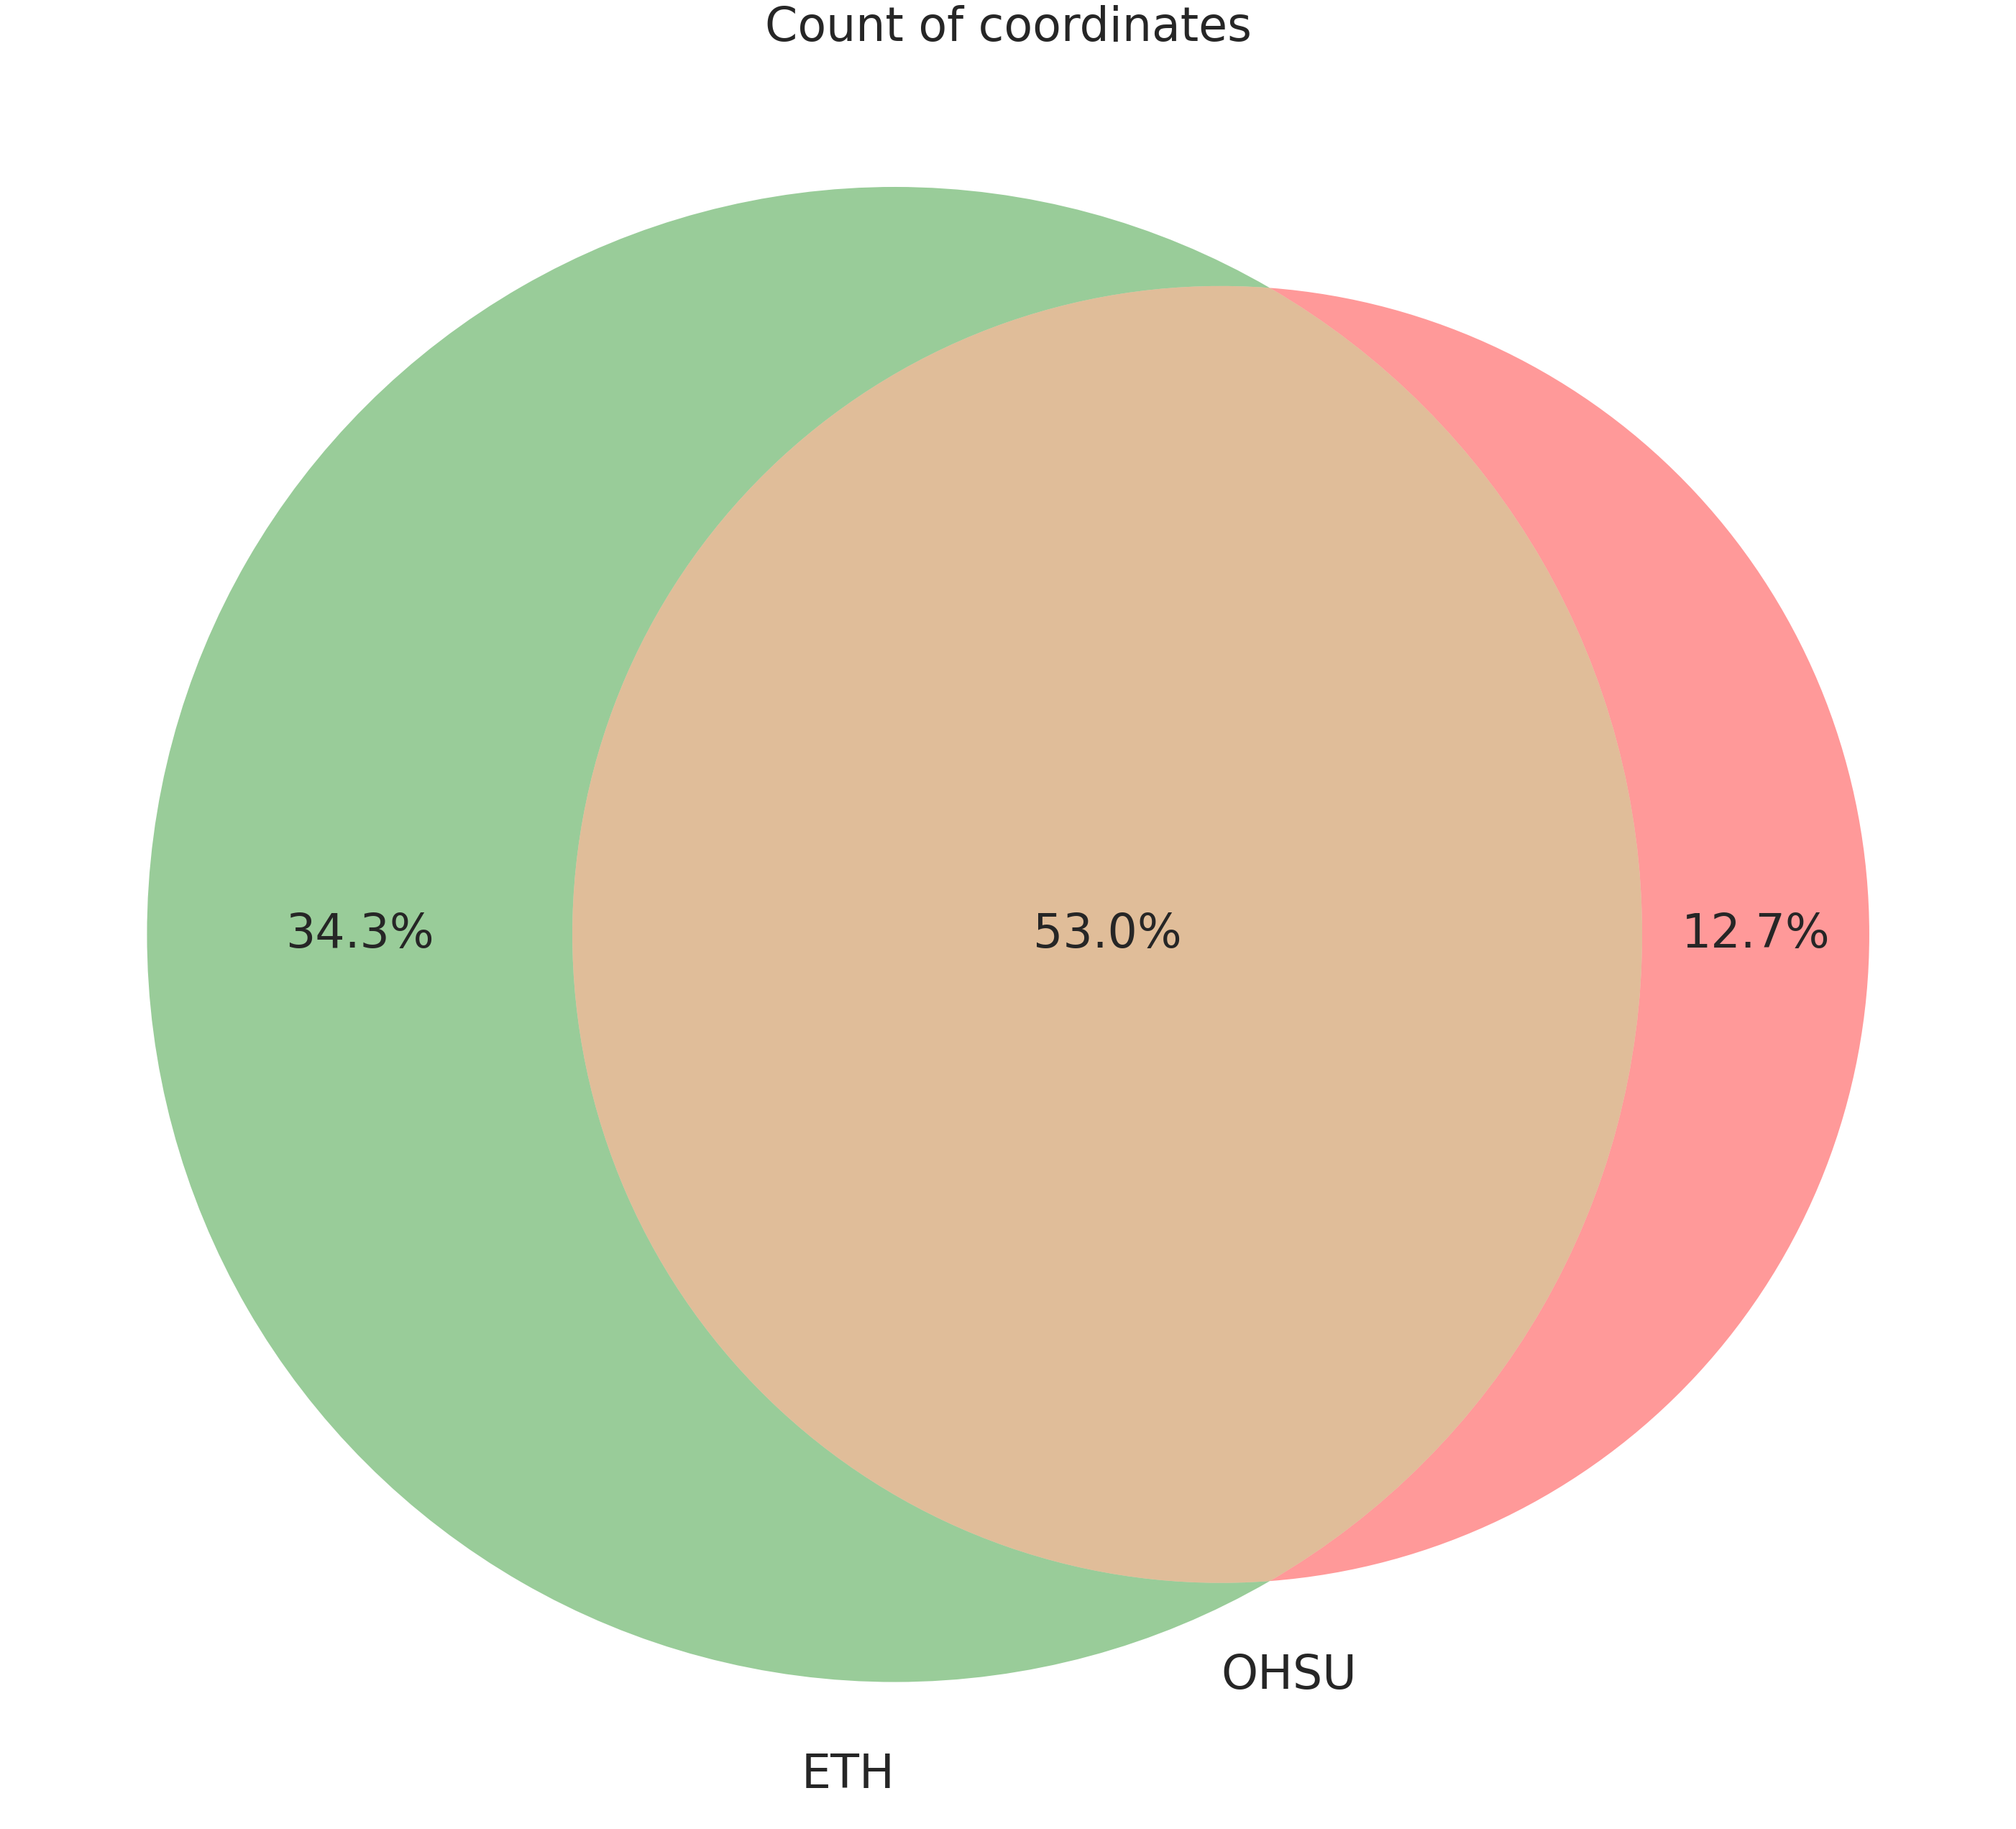

In [343]:
count1, count2, count_int = df_coord['ETH_' + COORD_COL].sum(), df_coord['OHSU_' + COORD_COL].sum(), df_coord['inters_' + COORD_COL].sum()
plot_venn(count1, count2, count_int, 'Count of coordinates')
plot_venn_perc(count1, count2, count_int, 'Count of coordinates')

## Barplot of coords

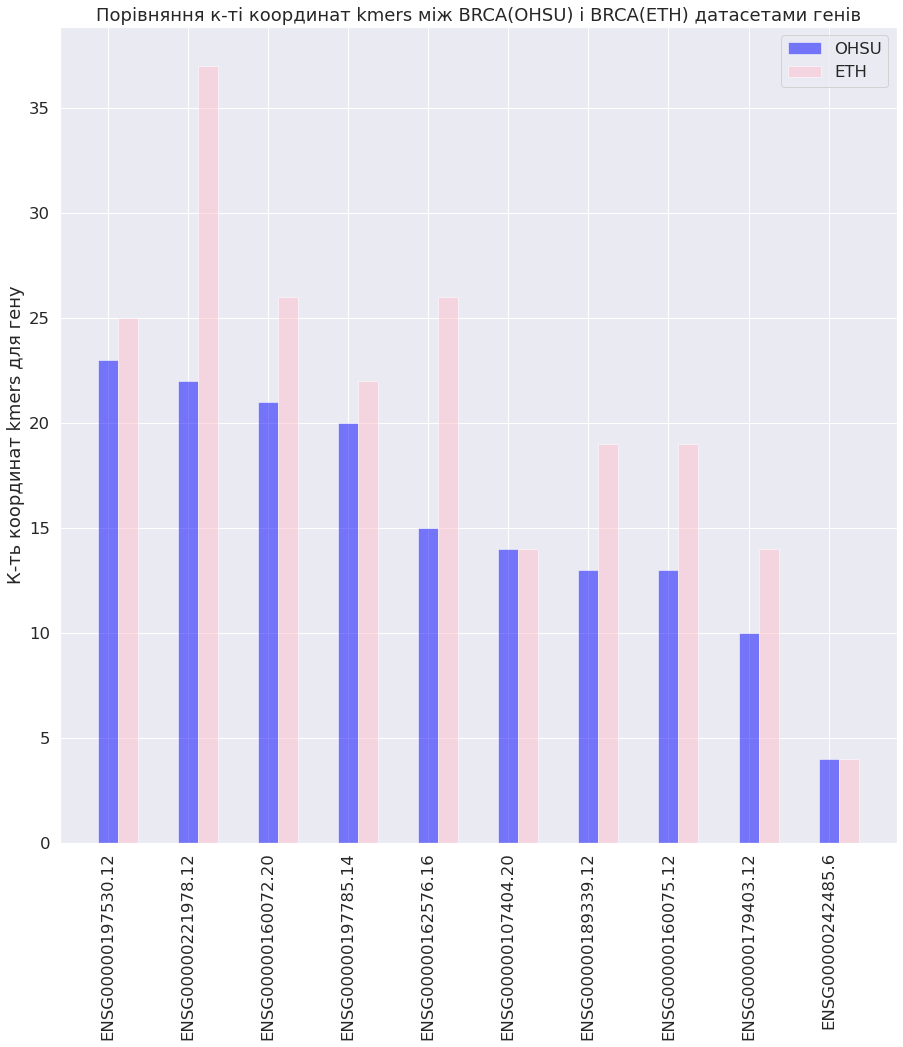

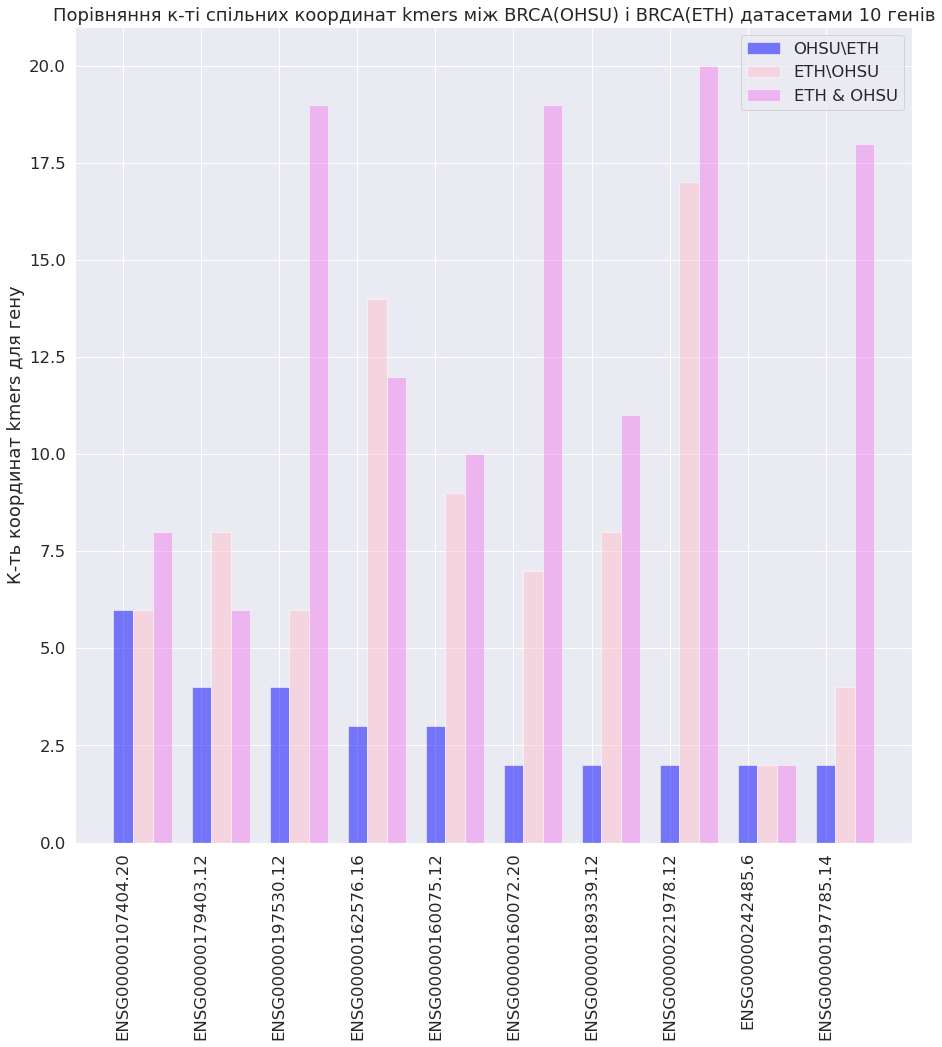

<Figure size 1080x1080 with 0 Axes>

In [350]:
barplot_column_count(df_coord, GENE_NAMES_10, COORD_COL)
barplot_column_count_unique(df_coord, GENE_NAMES_10, COORD_COL)

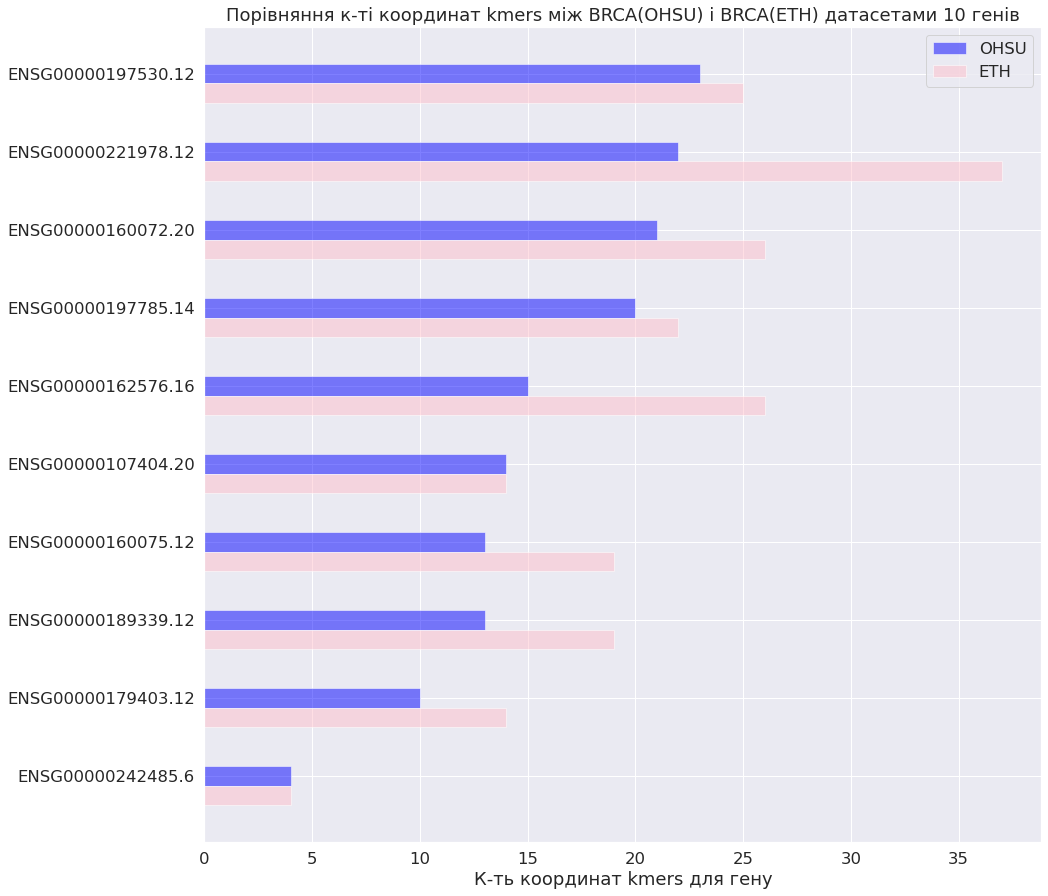

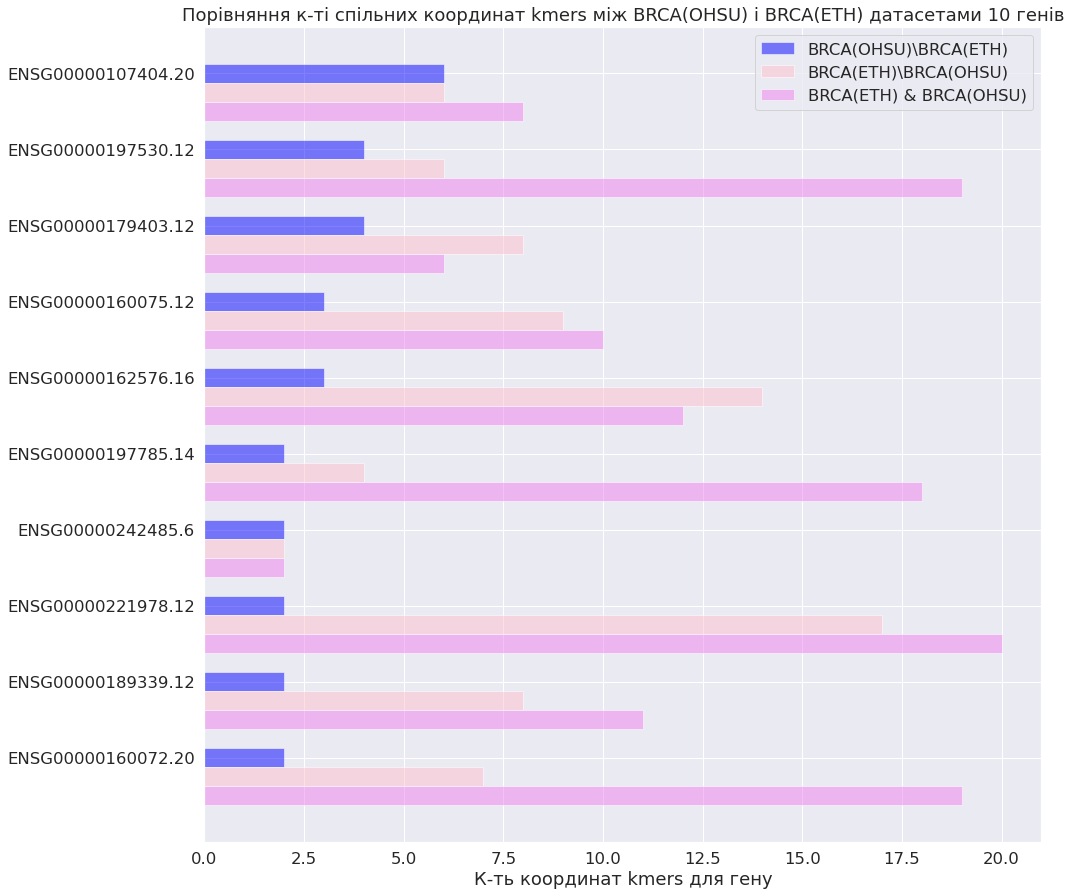

<Figure size 1080x1080 with 0 Axes>

In [351]:
barplot_column_count_horizontal(df_coord, GENE_NAMES_10, COORD_COL)
barplot_column_count_unique_horizontal(df_coord, GENE_NAMES_10, COORD_COL)

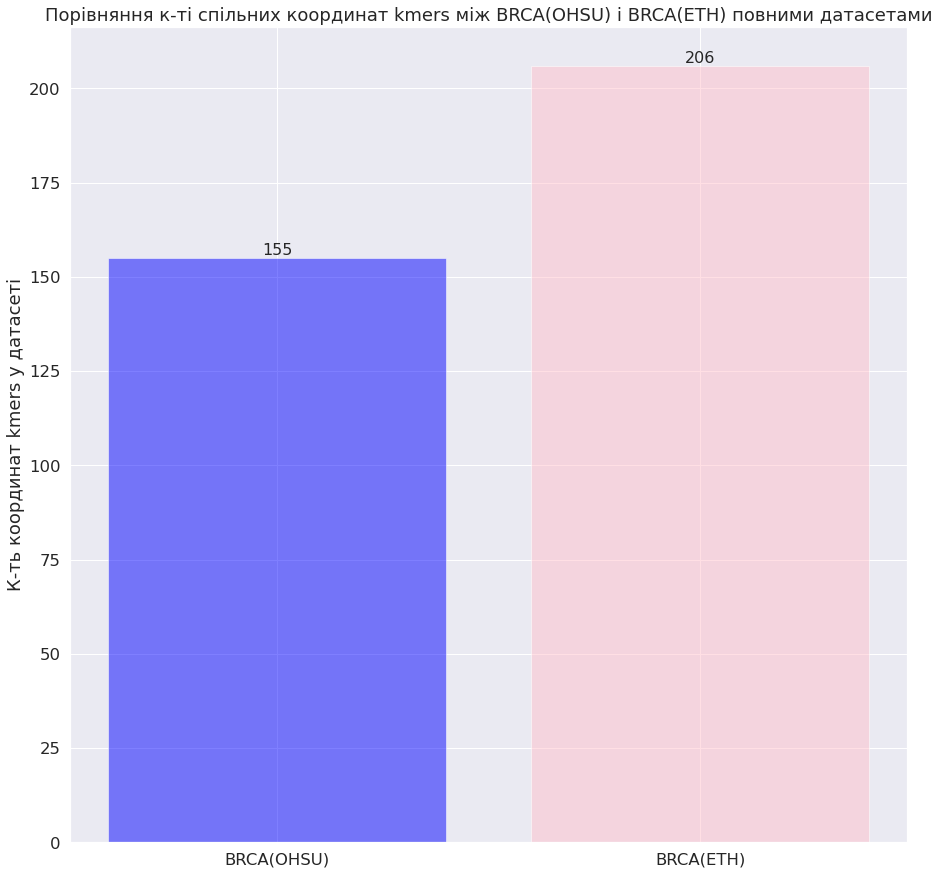

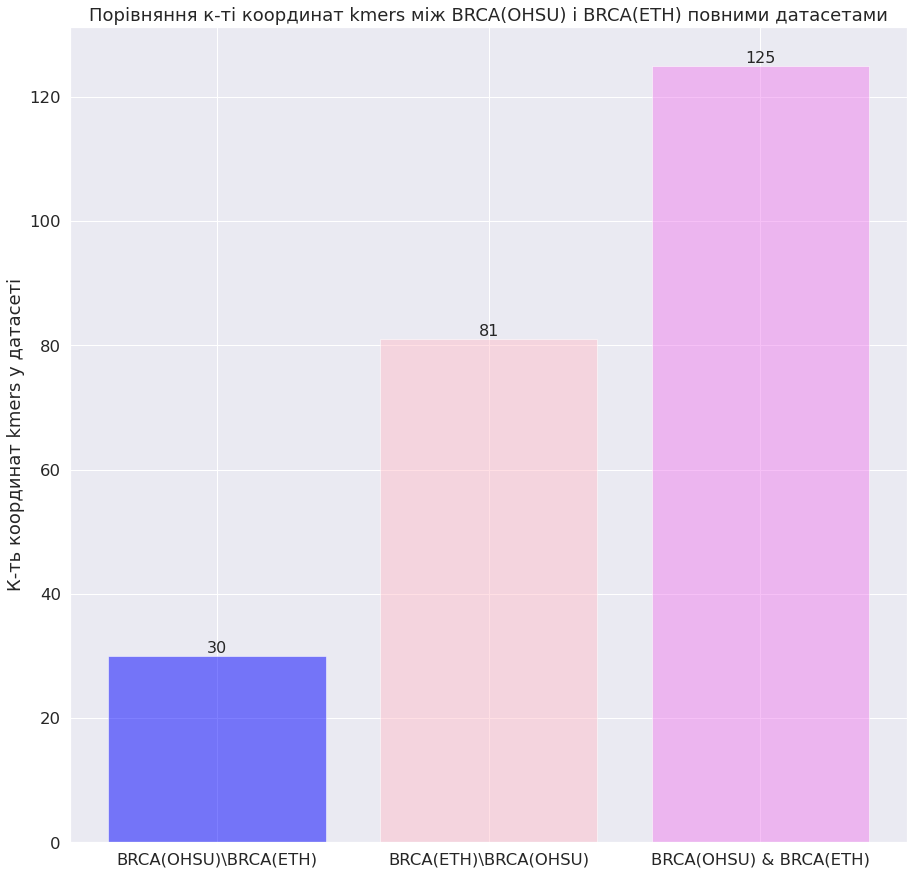

<Figure size 1080x1080 with 0 Axes>

In [352]:
barplot_column_common(df_coord, COORD_COL)
barplot_column_common_unique(df_coord, COORD_COL)

# Графіки з ваших ідей:



In [ ]:
'''
До речі ми можемо побудувати 
- діаграму Вена для самих генів
- по scatter plot можна додати обєм точок, які означатимуть сумарну кількість або навпаки перетин
- ще я недавно знайшла курс на datacamp, можна спробувати деякі графіки звідти: мене особисто зацікавив 
bee swarm plot спробувати замість boxplot, ecdf.
'''

# Expression analysis

In [397]:
eth_df.columns

Index(['gene_id', 'kmer', 'junction_coordinate', 'TCGABHA18V01A11RA12D07all',
       'TCGAAOA0JM01A21RA05607all', 'TCGAA2A0SX01A12RA08407all',
       'TCGAC8A12P01A11RA11507all', 'TCGAA2A0D201A21RA03407all'],
      dtype='object')

## OHSU preprocessing
ETH and OHSU dataset have different exmpression column names, we will stick to common format 'TCGA...all'

In [360]:
def change_column_names(ohsu_df):
    sample_col = [col for col in ohsu_df if col.startswith('TCGA')]
    new_col = [s.replace('-', '') + 'all' for s in sample_col]
    d = dict(zip(sample_col, new_col))
    ohsu_df.rename(columns = d, inplace = True)
    return ohsu_df
#ohsu_df = change_column_names(ohsu_df)
ohsu_df.columns

Index(['gene_id', 'kmer', 'jx', 'TCGABHA18V01A11RA12D07all',
       'TCGAAOA0JM01A21RA05607all', 'TCGAA2A0SX01A12RA08407all',
       'TCGAC8A12P01A11RA11507all', 'TCGAA2A0D201A21RA03407all', 'strand',
       'junction_coordinate', 'num_coord'],
      dtype='object')

## Common expression columns

In [361]:
expression_cols_ohsu = [col for col in ohsu_df if col.startswith('TCGA')]
print('OHSU expression columns number:', len(expression_cols_ohsu))
expression_cols_ohsu

OHSU expression columns number: 5


['TCGABHA18V01A11RA12D07all',
 'TCGAAOA0JM01A21RA05607all',
 'TCGAA2A0SX01A12RA08407all',
 'TCGAC8A12P01A11RA11507all',
 'TCGAA2A0D201A21RA03407all']

In [362]:
expression_cols_eth = [col for col in eth_df if col.startswith('TCGA')]
print('ETH expression columns number:', len(expression_cols_eth))
expression_cols_eth

ETH expression columns number: 5


['TCGABHA18V01A11RA12D07all',
 'TCGAAOA0JM01A21RA05607all',
 'TCGAA2A0SX01A12RA08407all',
 'TCGAC8A12P01A11RA11507all',
 'TCGAA2A0D201A21RA03407all']

In [363]:
expression_cols = set(expression_cols_ohsu) & set(expression_cols_eth)
expression_cols = list(expression_cols)
print('Common expression:', len(expression_cols))
print(expression_cols)
metadata = ['gene_id', 'kmer', 'junction_coordinate']
cols = metadata + expression_cols

Common expression: 5
['TCGABHA18V01A11RA12D07all', 'TCGAAOA0JM01A21RA05607all', 'TCGAA2A0SX01A12RA08407all', 'TCGAC8A12P01A11RA11507all', 'TCGAA2A0D201A21RA03407all']


In [364]:
ohsu_df_exp = ohsu_df.loc[:, cols]
ohsu_df_exp

gene_id       kmer junction_coordinate  \
135281   ENSG00000107404.20  YVFGDLCSM     1338158:1338268   
135281   ENSG00000107404.20  VFGDLCSMA     1338158:1338268   
135281   ENSG00000107404.20  FGDLCSMAP     1338158:1338268   
135281   ENSG00000107404.20  GDLCSMAPV     1338158:1338268   
135281   ENSG00000107404.20  DLCSMAPVG     1338158:1338268   
...                     ...        ...                 ...   
1228103  ENSG00000197530.12  QETAPATGR     1629700:1630361   
1228103  ENSG00000197530.12  ETAPATGRW     1629700:1630361   
1228103  ENSG00000197530.12  TAPATGRWR     1629700:1630361   
1228103  ENSG00000197530.12  APATGRWRN     1629700:1630361   
1228103  ENSG00000197530.12  PATGRWRNA     1629700:1630361   

         TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
...                            ...                        ...   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   

         TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
...                            ...                        ...   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   

         TCGAA2A0D201A21RA03407all  
135281                    1.367545  
135281                    1.367545  
135281                    1.367545  
135281                    1.367545  
135281                    1.367545  
...                            ...  
1228103                   0.000000  
1228103                   0.000000  
1228103                   0.000000  
1228103                   0.000000  
1228103                   0.000000  

[5793 rows x 8 columns]

## ETH preprocessing

In [365]:
NORMALIZER_LIBSIZE = 400000
PATH_LIBSIZE = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/expression_counts.libsize.tsv'

In [366]:
eth_df_exp = eth_df.loc[:, cols]
eth_df_exp

gene_id       kmer junction_coordinate  \
0     ENSG00000107404.20  SMDQDFGWS     1342484:1348895   
1     ENSG00000107404.20  FGVLVTGWR     1348415:1348895   
2     ENSG00000107404.20  PPSFHSCPP     1341974:1342362   
3     ENSG00000107404.20  TARRFLSPS     1341974:1342052   
4     ENSG00000107404.20  SSRLIRKYA     1338372:1340458   
...                  ...        ...                 ...   
4007  ENSG00000197530.12  RQQETAPRR     1629704:1630291   
4008  ENSG00000197530.12  ETGTVHRIT     1625428:1625557   
4009  ENSG00000197530.12  EDTRKAGQL     1625428:1625908   
4010  ENSG00000197530.12  AALGTPTRT     1627444:1628018   
4011  ENSG00000197530.12  GLTGWVSAD     1624901:1625310   

      TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
4007                       28.0                       12.0   
4008                        1.0                        0.0   
4009                        0.0                        0.0   
4010                        0.0                        0.0   
4011                        0.0                        0.0   

      TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
0                           0.0                        0.0   
1                           8.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
4007                       24.0                        2.0   
4008                        4.0                        1.0   
4009                        0.0                        0.0   
4010                        0.0                        0.0   
4011                        0.0                        0.0   

      TCGAA2A0D201A21RA03407all  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  
...                         ...  
4007                       10.0  
4008                        1.0  
4009                        0.0  
4010                        0.0  
4011                        0.0  

[3714 rows x 8 columns]

In [367]:
def process_libsize(path_lib, custom_normalizer):
    '''
    Loads and returns the normalisation values per sample
    Normalisation formulae: (count / 75 quantile expression in sample) * A
    If no normalisation factor is provided: A = median across samples
    If normalisation factor is provided: A = normalisation factor
    :param path_lib: str path with library size file
    :param custom_normalizer: custum normalisation factor
    :return: dataframe with 75 quantile expression in sample / A values
    '''
    lib = pd.read_csv(path_lib, sep='\t')
    if custom_normalizer:
        lib['libsize_75percent'] = lib['libsize_75percent'] / custom_normalizer
    else:
        lib['libsize_75percent'] = lib['libsize_75percent'] / np.median(lib['libsize_75percent'])
    lib['sample'] = [sample.replace('-', '').replace('.', '').replace('_','') for sample in lib['sample']]
    lib = lib.set_index('sample')
    return lib

def normalization(df, cols, libsize, metadata):
    df_expr = df.loc[:, cols]
    df_norm_vals = libsize.loc[cols, 'libsize_75percent']
    df = pd.concat([df.loc[:, metadata], df_expr / df_norm_vals], axis = 1)
    return df

In [368]:
libsize = process_libsize(PATH_LIBSIZE, NORMALIZER_LIBSIZE) 
eth_df_exp = normalization(eth_df_exp, expression_cols, libsize, metadata)
eth_df_exp

gene_id       kmer junction_coordinate  \
0     ENSG00000107404.20  SMDQDFGWS     1342484:1348895   
1     ENSG00000107404.20  FGVLVTGWR     1348415:1348895   
2     ENSG00000107404.20  PPSFHSCPP     1341974:1342362   
3     ENSG00000107404.20  TARRFLSPS     1341974:1342052   
4     ENSG00000107404.20  SSRLIRKYA     1338372:1340458   
...                  ...        ...                 ...   
4007  ENSG00000197530.12  RQQETAPRR     1629704:1630291   
4008  ENSG00000197530.12  ETGTVHRIT     1625428:1625557   
4009  ENSG00000197530.12  EDTRKAGQL     1625428:1625908   
4010  ENSG00000197530.12  AALGTPTRT     1627444:1628018   
4011  ENSG00000197530.12  GLTGWVSAD     1624901:1625310   

      TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
0                      0.000000                   0.000000   
1                      0.000000                   0.000000   
2                      0.000000                   0.000000   
3                      0.000000                   0.000000   
4                      0.000000                   0.000000   
...                         ...                        ...   
4007                  34.640497                  25.228635   
4008                   1.237161                   0.000000   
4009                   0.000000                   0.000000   
4010                   0.000000                   0.000000   
4011                   0.000000                   0.000000   

      TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
0                      0.000000                   0.000000   
1                      9.121539                   0.000000   
2                      0.000000                   0.000000   
3                      0.000000                   0.000000   
4                      0.000000                   0.000000   
...                         ...                        ...   
4007                  27.364616                   2.922641   
4008                   4.560769                   1.461321   
4009                   0.000000                   0.000000   
4010                   0.000000                   0.000000   
4011                   0.000000                   0.000000   

      TCGAA2A0D201A21RA03407all  
0                      0.000000  
1                      0.000000  
2                      0.000000  
3                      0.000000  
4                      0.000000  
...                         ...  
4007                  13.675447  
4008                   1.367545  
4009                   0.000000  
4010                   0.000000  
4011                   0.000000  

[3714 rows x 8 columns]

## Filter data based on coord  

In [369]:
eth_df = eth_df_exp
eth_df.columns

Index(['gene_id', 'kmer', 'junction_coordinate', 'TCGABHA18V01A11RA12D07all',
       'TCGAAOA0JM01A21RA05607all', 'TCGAA2A0SX01A12RA08407all',
       'TCGAC8A12P01A11RA11507all', 'TCGAA2A0D201A21RA03407all'],
      dtype='object')

In [370]:
cols = ['gene_id', 'kmer', 'junction_coordinate']
sum(eth_df[cols].duplicated())

0

In [371]:
sum(ohsu_df[cols].duplicated())

0

In [372]:
eth_df

gene_id       kmer junction_coordinate  \
0     ENSG00000107404.20  SMDQDFGWS     1342484:1348895   
1     ENSG00000107404.20  FGVLVTGWR     1348415:1348895   
2     ENSG00000107404.20  PPSFHSCPP     1341974:1342362   
3     ENSG00000107404.20  TARRFLSPS     1341974:1342052   
4     ENSG00000107404.20  SSRLIRKYA     1338372:1340458   
...                  ...        ...                 ...   
4007  ENSG00000197530.12  RQQETAPRR     1629704:1630291   
4008  ENSG00000197530.12  ETGTVHRIT     1625428:1625557   
4009  ENSG00000197530.12  EDTRKAGQL     1625428:1625908   
4010  ENSG00000197530.12  AALGTPTRT     1627444:1628018   
4011  ENSG00000197530.12  GLTGWVSAD     1624901:1625310   

      TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
0                      0.000000                   0.000000   
1                      0.000000                   0.000000   
2                      0.000000                   0.000000   
3                      0.000000                   0.000000   
4                      0.000000                   0.000000   
...                         ...                        ...   
4007                  34.640497                  25.228635   
4008                   1.237161                   0.000000   
4009                   0.000000                   0.000000   
4010                   0.000000                   0.000000   
4011                   0.000000                   0.000000   

      TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
0                      0.000000                   0.000000   
1                      9.121539                   0.000000   
2                      0.000000                   0.000000   
3                      0.000000                   0.000000   
4                      0.000000                   0.000000   
...                         ...                        ...   
4007                  27.364616                   2.922641   
4008                   4.560769                   1.461321   
4009                   0.000000                   0.000000   
4010                   0.000000                   0.000000   
4011                   0.000000                   0.000000   

      TCGAA2A0D201A21RA03407all  
0                      0.000000  
1                      0.000000  
2                      0.000000  
3                      0.000000  
4                      0.000000  
...                         ...  
4007                  13.675447  
4008                   1.367545  
4009                   0.000000  
4010                   0.000000  
4011                   0.000000  

[3714 rows x 8 columns]

In [373]:
ohsu_df

gene_id       kmer                      jx  \
135281   ENSG00000107404.20  YVFGDLCSM  chr1;1338159;1338268;-   
135281   ENSG00000107404.20  VFGDLCSMA  chr1;1338159;1338268;-   
135281   ENSG00000107404.20  FGDLCSMAP  chr1;1338159;1338268;-   
135281   ENSG00000107404.20  GDLCSMAPV  chr1;1338159;1338268;-   
135281   ENSG00000107404.20  DLCSMAPVG  chr1;1338159;1338268;-   
...                     ...        ...                     ...   
1228103  ENSG00000197530.12  QETAPATGR  chr1;1629701;1630361;+   
1228103  ENSG00000197530.12  ETAPATGRW  chr1;1629701;1630361;+   
1228103  ENSG00000197530.12  TAPATGRWR  chr1;1629701;1630361;+   
1228103  ENSG00000197530.12  APATGRWRN  chr1;1629701;1630361;+   
1228103  ENSG00000197530.12  PATGRWRNA  chr1;1629701;1630361;+   

         TCGABHA18V01A11RA12D07all  TCGAAOA0JM01A21RA05607all  \
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
135281                    2.474321                        0.0   
...                            ...                        ...   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   
1228103                   0.000000                        0.0   

         TCGAA2A0SX01A12RA08407all  TCGAC8A12P01A11RA11507all  \
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
135281                    5.700962                   5.845283   
...                            ...                        ...   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   
1228103                   0.000000                   0.000000   

         TCGAA2A0D201A21RA03407all strand junction_coordinate  num_coord  
135281                    1.367545      -     1338158:1338268          2  
135281                    1.367545      -     1338158:1338268          2  
135281                    1.367545      -     1338158:1338268          2  
135281                    1.367545      -     1338158:1338268          2  
135281                    1.367545      -     1338158:1338268          2  
...                            ...    ...                 ...        ...  
1228103                   0.000000      +     1629700:1630361          2  
1228103                   0.000000      +     1629700:1630361          2  
1228103                   0.000000      +     1629700:1630361          2  
1228103                   0.000000      +     1629700:1630361          2  
1228103                   0.000000      +     1629700:1630361          2  

[5793 rows x 11 columns]

In [374]:
df = pd.merge(eth_df, ohsu_df, on=['gene_id', 'kmer', 'junction_coordinate'])
df

gene_id       kmer junction_coordinate  \
0    ENSG00000107404.20  FGVLVTGWR     1348415:1348895   
1    ENSG00000107404.20  GSTSSSSTE     1340497:1341666   
2    ENSG00000107404.20  SWPKCGQQP     1342156:1342688   
3    ENSG00000107404.20  IVTVTLNMD     1340173:1340246   
4    ENSG00000107404.20  RVVSWPKCG     1342156:1342688   
..                  ...        ...                 ...   
973  ENSG00000197530.12  DVNLPQDAH     1627829:1628015   
974  ENSG00000197530.12  RFRVRAQDE     1629311:1629638   
975  ENSG00000197530.12  LKGHALAAV     1628179:1628488   
976  ENSG00000197530.12  RQQETAPRR     1629704:1630291   
977  ENSG00000197530.12  ETGTVHRIT     1625428:1625557   

     TCGABHA18V01A11RA12D07all_x  TCGAAOA0JM01A21RA05607all_x  \
0                       0.000000                     0.000000   
1                       0.000000                     0.000000   
2                       2.474321                     0.000000   
3                       4.948642                     2.102386   
4                       2.474321                     0.000000   
..                           ...                          ...   
973                     0.000000                     0.000000   
974                     1.237161                     0.000000   
975                     0.000000                     0.000000   
976                    34.640497                    25.228635   
977                     1.237161                     0.000000   

     TCGAA2A0SX01A12RA08407all_x  TCGAC8A12P01A11RA11507all_x  \
0                       9.121539                     0.000000   
1                       0.000000                     0.000000   
2                       0.000000                     0.000000   
3                       6.841154                     2.922641   
4                       0.000000                     0.000000   
..                           ...                          ...   
973                     0.000000                     0.000000   
974                     0.000000                     0.000000   
975                     0.000000                     0.000000   
976                    27.364616                     2.922641   
977                     4.560769                     1.461321   

     TCGAA2A0D201A21RA03407all_x                      jx  \
0                       0.000000  chr1;1348416;1348895;-   
1                       0.000000  chr1;1340498;1341666;-   
2                       0.000000  chr1;1342157;1342688;-   
3                       4.102634  chr1;1340174;1340246;-   
4                       0.000000  chr1;1342157;1342688;-   
..                           ...                     ...   
973                     0.000000  chr1;1627830;1628015;+   
974                     0.000000  chr1;1629312;1629638;+   
975                     0.000000  chr1;1628180;1628488;+   
976                    13.675447  chr1;1629705;1630291;+   
977                     1.367545  chr1;1625429;1625557;+   

     TCGABHA18V01A11RA12D07all_y  TCGAAOA0JM01A21RA05607all_y  \
0                       0.000000                     0.000000   
1                       0.000000                     0.000000   
2                       2.474321                     0.000000   
3                       4.948642                     2.102386   
4                       2.474321                     0.000000   
..                           ...                          ...   
973                     0.000000                     0.000000   
974                     1.237161                     0.000000   
975                     0.000000                     0.000000   
976                    34.640497                    25.228635   
977                     1.237161                     0.000000   

     TCGAA2A0SX01A12RA08407all_y  TCGAC8A12P01A11RA11507all_y  \
0                       9.121539                     0.000000   
1                       0.000000                     0.000000   
2                       0.000000                     0.00000

In [375]:
expression_cols

['TCGABHA18V01A11RA12D07all',
 'TCGAAOA0JM01A21RA05607all',
 'TCGAA2A0SX01A12RA08407all',
 'TCGAC8A12P01A11RA11507all',
 'TCGAA2A0D201A21RA03407all']

In [378]:
c = expression_cols 
idx = 4
(df[c[idx] + '_x'] - df[c[idx] + '_y']).abs().sum()

2.970956813896919e-13

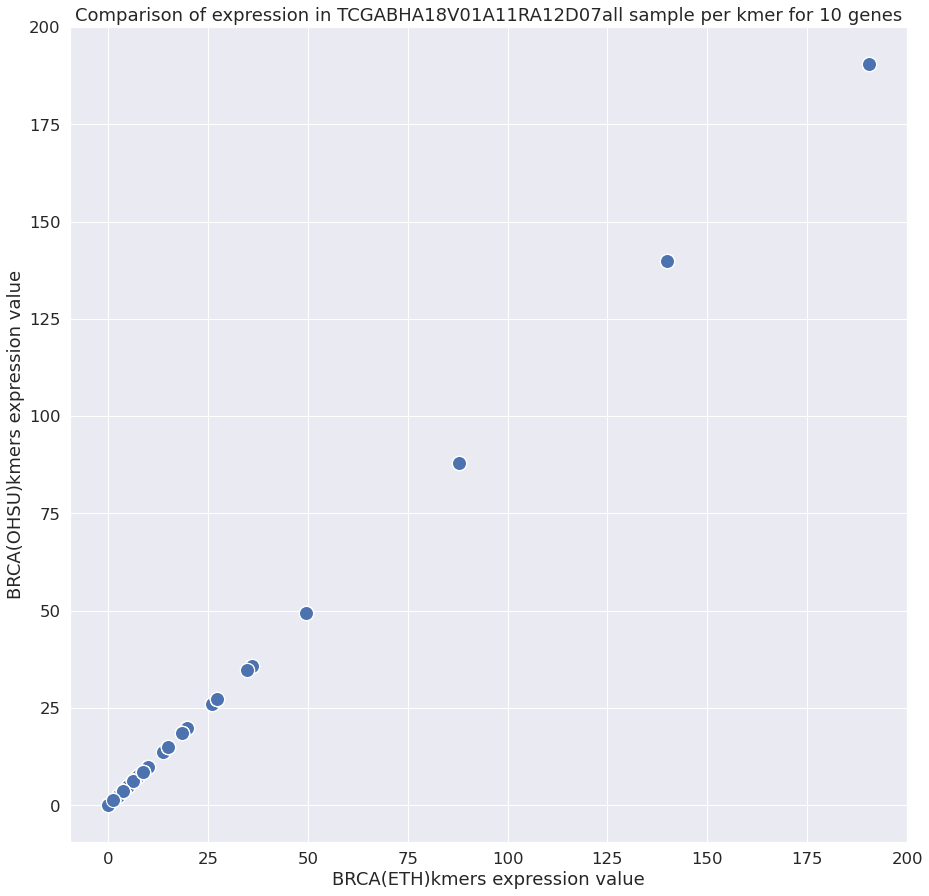

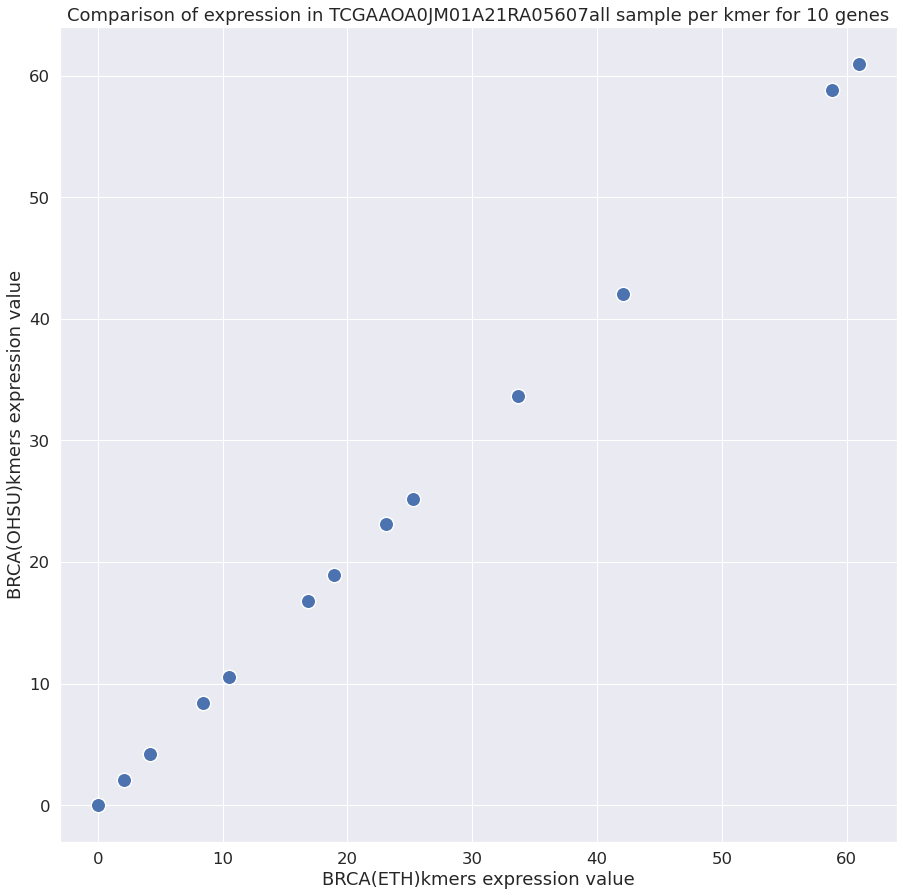

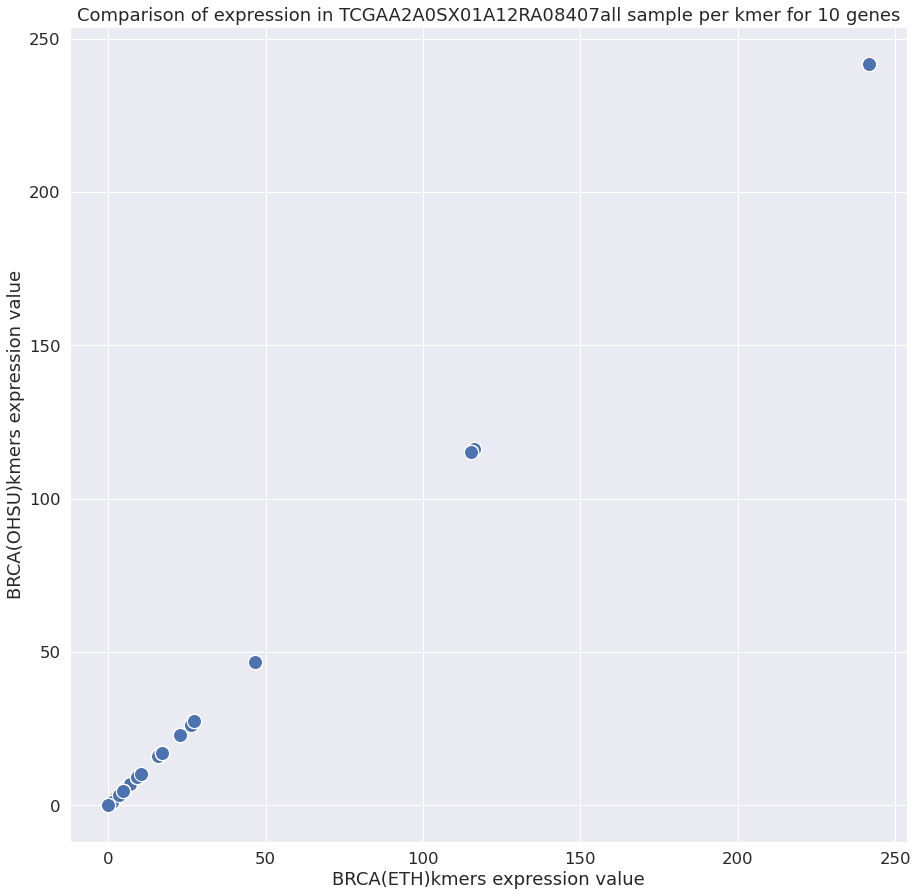

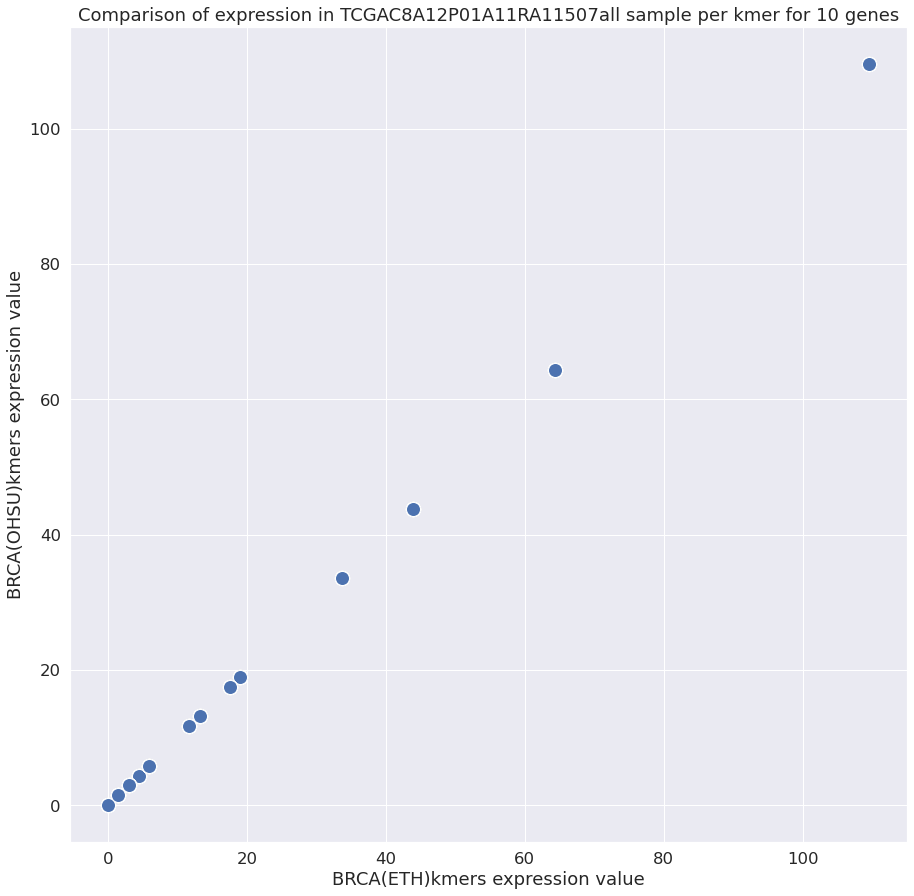

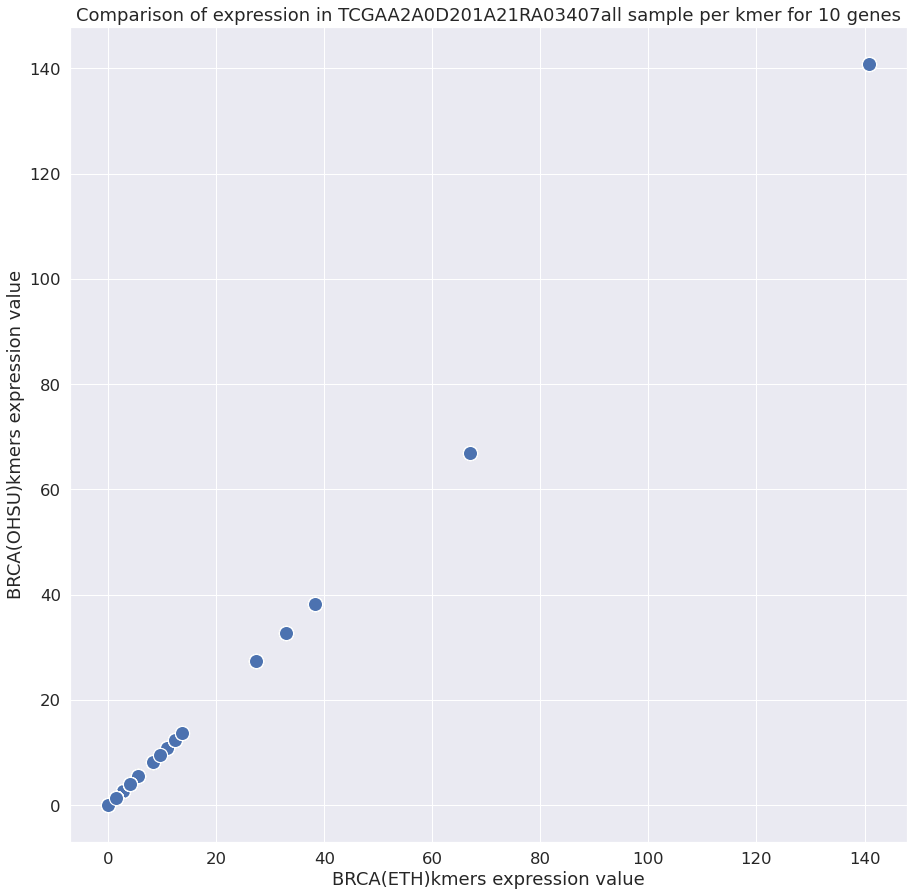

In [422]:
def plot_scatter_expression(df, col):
    sns.scatterplot(x = col + '_x', y = col + '_y', data = df, s=200)
    plt.title('Comparison of expression in ' + col + ' sample per kmer for 10 genes')
    plt.xlabel('BRCA(ETH)kmers expression value')
    plt.ylabel('BRCA(OHSU)kmers expression value')
    plt.show()
for col in expression_cols:    
    plot_scatter_expression(df, col)

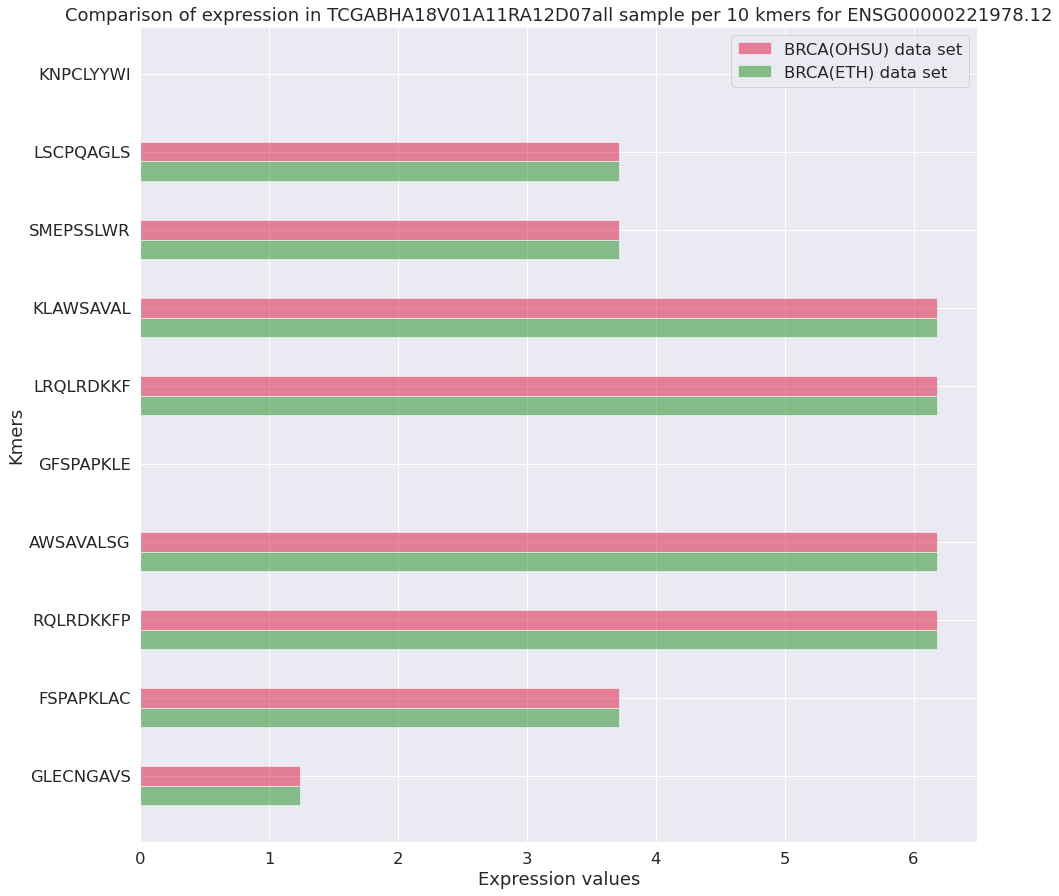

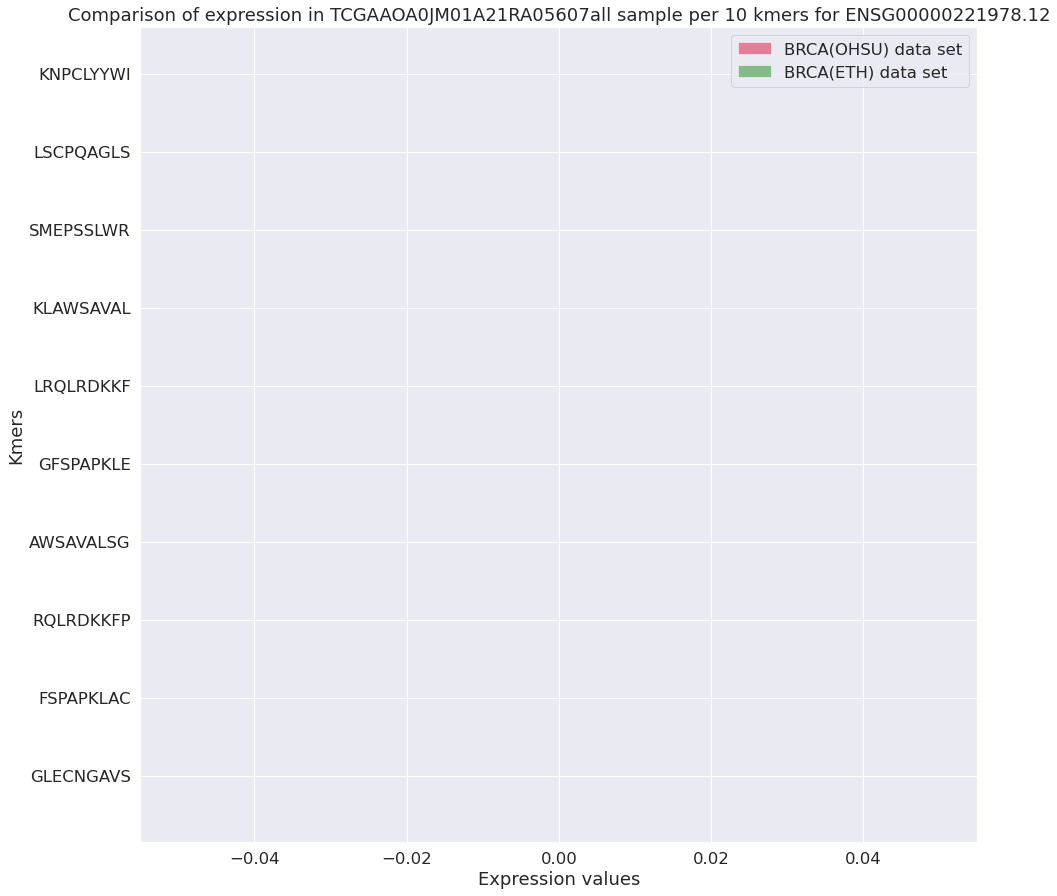

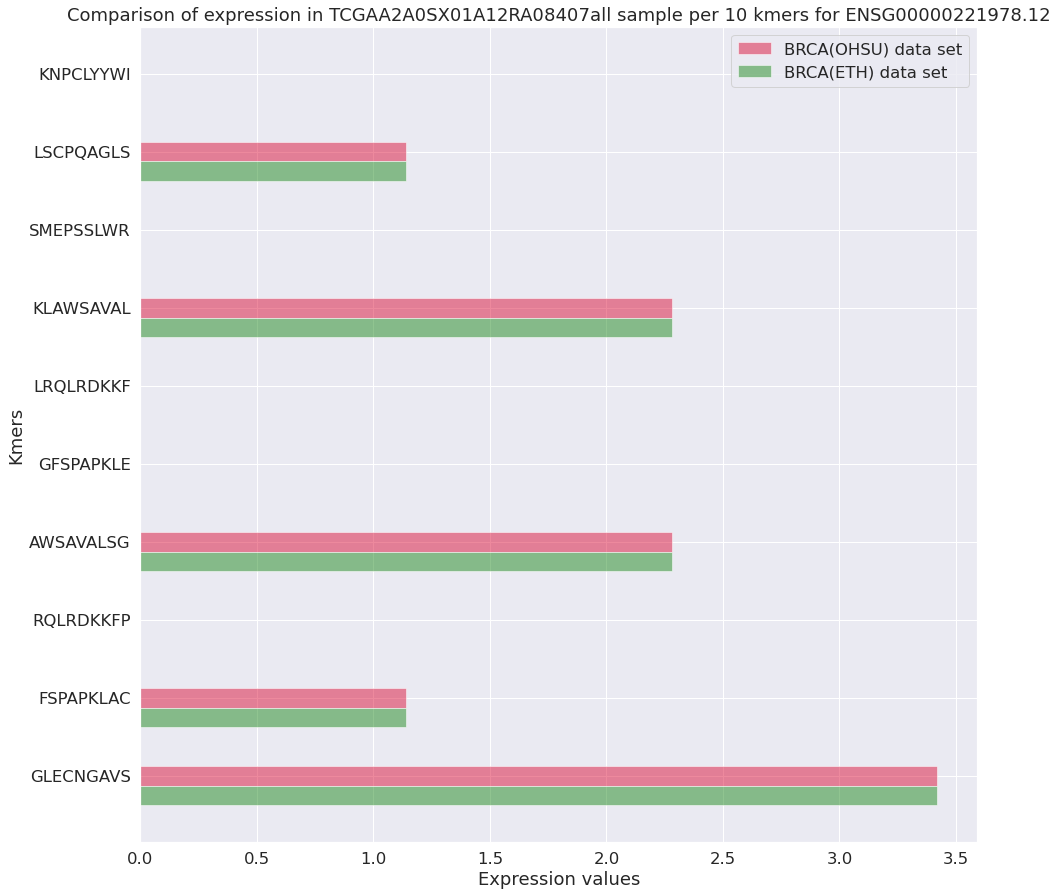

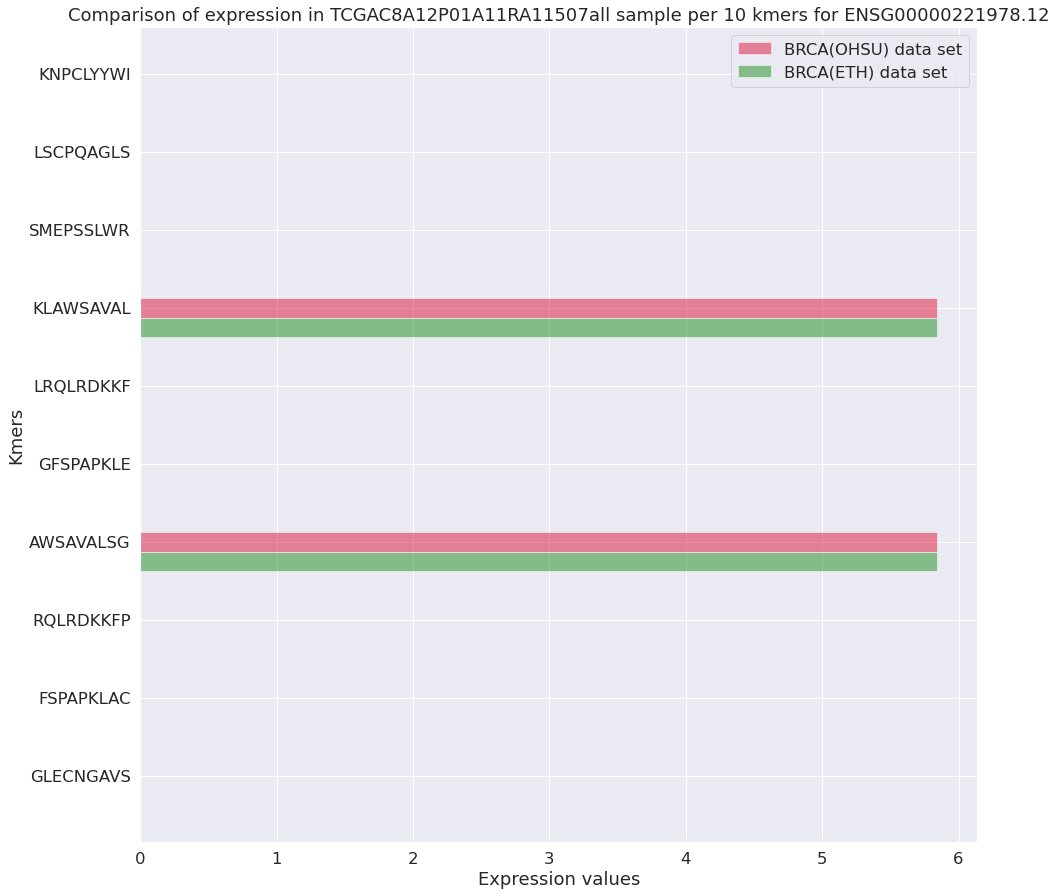

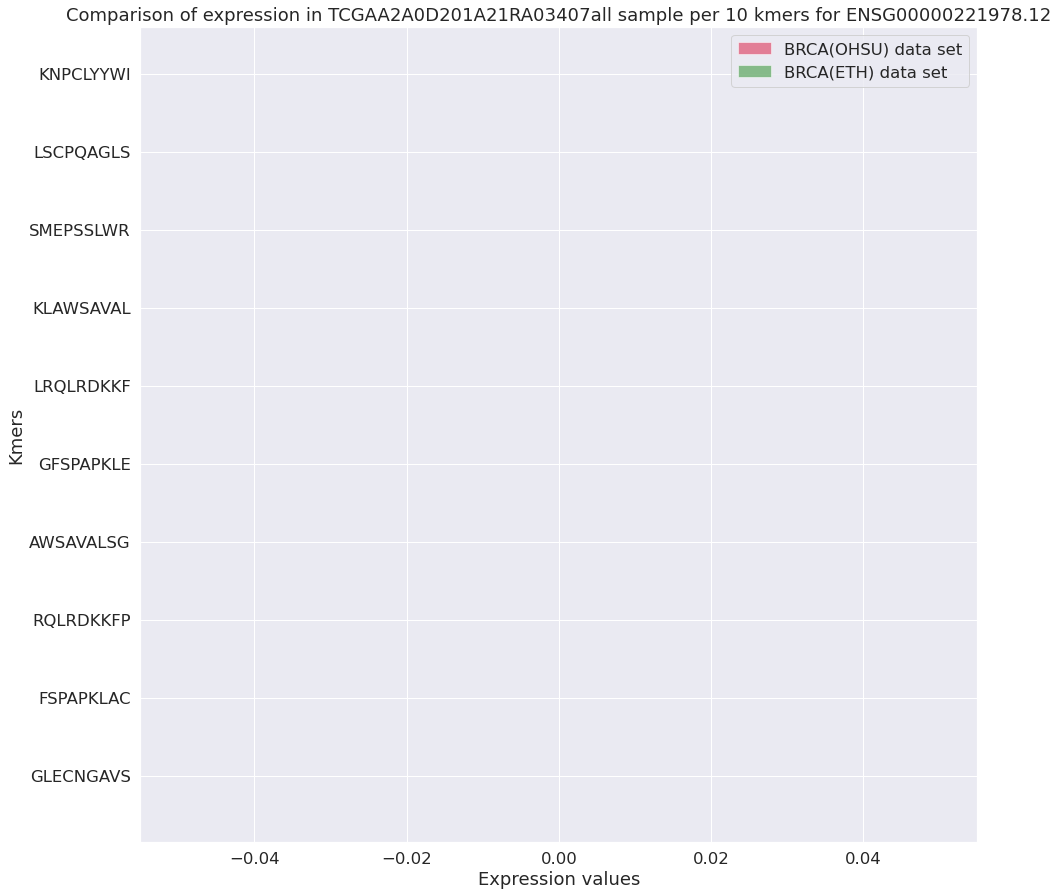

gene_id       kmer junction_coordinate  \
251  ENSG00000221978.12  GLECNGAVS     1389047:1390229   
252  ENSG00000221978.12  FSPAPKLAC     1389473:1390229   
253  ENSG00000221978.12  RQLRDKKFP     1397853:1398232   
254  ENSG00000221978.12  AWSAVALSG     1388743:1390229   
255  ENSG00000221978.12  GFSPAPKLE     1388510:1390229   
256  ENSG00000221978.12  LRQLRDKKF     1397853:1398232   
257  ENSG00000221978.12  KLAWSAVAL     1388743:1390229   
258  ENSG00000221978.12  SMEPSSLWR     1398418:1398596   
259  ENSG00000221978.12  LSCPQAGLS     1389473:1390229   
260  ENSG00000221978.12  KNPCLYYWI     1395510:1398232   

     TCGABHA18V01A11RA12D07all_x  TCGAAOA0JM01A21RA05607all_x  \
251                     1.237161                          0.0   
252                     3.711482                          0.0   
253                     6.185803                          0.0   
254                     6.185803                          0.0   
255                     0.000000                          0.0   
256                     6.185803                          0.0   
257                     6.185803                          0.0   
258                     3.711482                          0.0   
259                     3.711482                          0.0   
260                     0.000000                          0.0   

     TCGAA2A0SX01A12RA08407all_x  TCGAC8A12P01A11RA11507all_x  \
251                     3.420577                     0.000000   
252                     1.140192                     0.000000   
253                     0.000000                     0.000000   
254                     2.280385                     5.845283   
255                     0.000000                     0.000000   
256                     0.000000                     0.000000   
257                     2.280385                     5.845283   
258                     0.000000                     0.000000   
259                     1.140192                     0.000000   
260                     0.000000                     0.000000   

     TCGAA2A0D201A21RA03407all_x                      jx  \
251                          0.0  chr1;1389048;1390229;-   
252                          0.0  chr1;1389474;1390229;-   
253                          0.0  chr1;1397854;1398232;-   
254                          0.0  chr1;1388744;1390229;-   
255                          0.0  chr1;1388511;1390229;-   
256                          0.0  chr1;1397854;1398232;-   
257                          0.0  chr1;1388744;1390229;-   
258                          0.0  chr1;1398419;1398596;-   
259                          0.0  chr1;1389474;1390229;-   
260                          0.0  chr1;1395511;1398232;-   

     TCGABHA18V01A11RA12D07all_y  TCGAAOA0JM01A21RA05607all_y  \
251                     1.237161                          0.0   
252                     3.711482                          0.0   
253                     6.185803                          0.0   
254                     6.185803                          0.0   
255                     0.000000                          0.0   
256                     6.185803                          0.0   
257                     6.185803                          0.0   
258                     3.711482                          0.0   
259                     3.711482                          0.0   
260                     0.000000                          0.0   

     TCGAA2A0SX01A12RA08407all_y  TCGAC8A12P01A11RA11507all_y  \
251                     3.420577                     0.000000   
252                     1.140192                     0.000000   
253                     0.000000                     0.000000   
254                     2.280385                     5.845283   
255                     0.000000                     0.000000   
256                     0.000000                     0.000000   
257                     2.280385                     5.845283   
258                     0.000000                

<Figure size 1080x1080 with 0 Axes>

In [404]:
def barplot_horizontal(df, gene_name, kmer_names, col):
    df = df[df['gene_id'] == gene_name]
    df = df[df['kmer'].isin(kmer_names)]
    x = df['kmer']
    
    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df[col + '_y'], label='BRCA(OHSU) data set', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df[col + '_x'], label='BRCA(ETH) data set', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)

    plt.xlabel('Expression values')
    plt.ylabel('Kmers')
    title = 'Comparison of expression in ' + col + ' sample per 10 kmers for ENSG00000221978.12 gene' #part of all kmers
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    return df
gene_name = gene_names[2]
kmer_names = df[df['gene_id'] == gene_name]['kmer'].values[5:15]
for col in expression_cols:    
    df_part = barplot_horizontal(df, gene_name, kmer_names, col)
df_part


In [381]:
print(gene_name)

ENSG00000107404.20


# 3. Build Box plots(distribution of expression) for kmers that are in the intersection

In [ ]:
#Box plots: Not clear from box plots with distribution of expression where is each kmer  , 
#let’s take a look at the kmers that are in the intersection what is the expression in ETH and OHSU , 
#each point is kmer then you can see it’s expression. 
#What we expect to see - that the same kmer from both data sets has the same expression value

In [125]:
def filter_df_common_kmers(df1, df2):
    '''
    Filter input datframes, so that they have only records with common pairs gene + kmer
    '''
    print('Initials sizes: ', len(df1), len(df2))
    gene_names = common_genes(df1, df2)
    df1 = df1[df1['gene_id'].isin(gene_names)]
    df1_grouped = df1.groupby('gene_id')
    df2 = df2[df2['gene_id'].isin(gene_names)]
    df2_grouped = df2.groupby('gene_id')
    dfs1 = []
    dfs2 = []
    for gene in tqdm.tqdm(gene_names):
        d1 = df1_grouped.get_group(gene)
        d2 = df2_grouped.get_group(gene)
        common_kmer = set(d1['kmer']) & set(d2['kmer'])
        if len(common_kmer) == 0:
            print("There are no common kmers for gene: ", gene)
        else:
            d1 = d1[d1['kmer'].isin(common_kmer)]
            d2 = d2[d2['kmer'].isin(common_kmer)]
            d1['gene_id'] = gene
            dfs1.append(d1)
            d2['gene_id'] = gene
            dfs2.append(d2)
    df1, df2 = pd.concat(dfs1, axis=0, ignore_index=True), pd.concat(dfs2, axis=0, ignore_index=True)
    print('Result sizes: ', len(df1), len(df2))
    return df1, df2
def merge_df(df1, df2):
    df1['name'] = 'ETH'
    df2['name'] = 'OHSU'
    return pd.concat([df1, df2], axis=0, ignore_index=True)
df1 = eth_df_exp.copy()
df2 = ohsu_df_exp.copy()
df1, df2 = filter_df_common_kmers(df1, df2)

Initials sizes:  4012 5793
OHSU number of genes: 10
ETH number of genes: 10
Number of common genes: 10


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 799.34it/s]

Result sizes:  1181 1039


In [126]:
df1.describe()

TCGAC8A12P01A11RA11507all  TCGAA2A0D201A21RA03407all  \
count                1181.000000                1181.000000   
mean                    4.218156                   4.324962   
std                    36.878307                  43.677342   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                   933.783907                1397.630729   

       TCGAA2A0SX01A12RA08407all  TCGAAOA0JM01A21RA05607all  \
count                1181.000000                1181.000000   
mean                    6.522557                   5.123343   
std                    38.060590                  53.644988   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     2.280385                   0.000000   
max                   628.245985                1200.462525   

       TCGABHA18V01A11RA12D07all  
count                1181.000000  
mean                    7.376871  
std                    56.857265  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     3.711482  
max                  1807.491626

In [127]:
df2.describe()

TCGAC8A12P01A11RA11507all  TCGAA2A0D201A21RA03407all  \
count                1039.000000                1039.000000   
mean                    2.621657                   2.794319   
std                    11.380961                  12.820492   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                   109.599050                 140.857109   

       TCGAA2A0SX01A12RA08407all  TCGAAOA0JM01A21RA05607all  \
count                1039.000000                1039.000000   
mean                    5.265296                   2.905704   
std                    23.603857                  14.174809   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     2.280385                   0.000000   
max                   241.720778                 300.641228   

       TCGABHA18V01A11RA12D07all  
count                1039.000000  
mean                    5.542813  
std                    20.208562  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     3.711482  
max                   190.522731

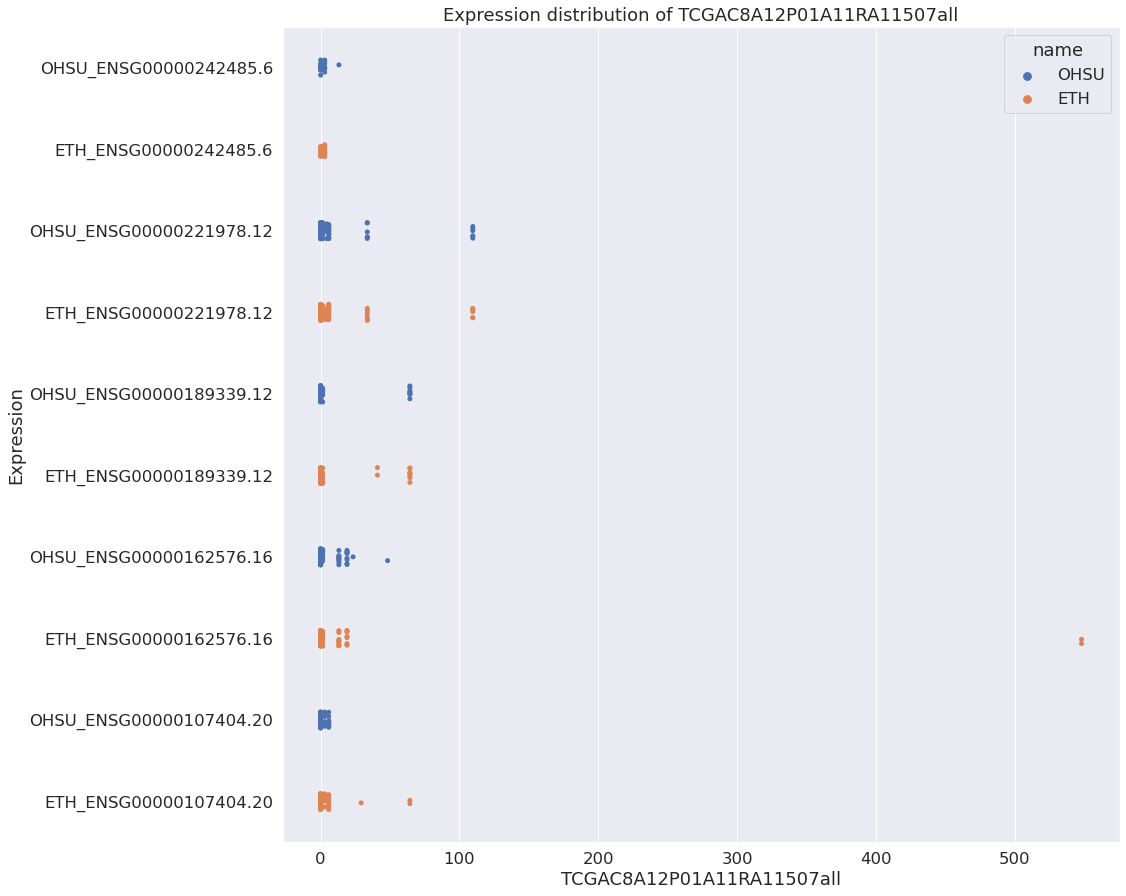

In [130]:
def plot_stripplot_gene_expression(eth_df, ohsu_df, gene_names, exp_col):
    '''
    Applicable only for limited number of genes
    '''
    df = merge_df(eth_df, ohsu_df)
    df = df[df['gene_id'].isin(gene_names)]
    df['name_gene'] = df['name'] + '_' + df['gene_id']
    df = df.sort_values(by=['gene_id', 'name'], ascending=False)
 
    # Creating plot    
    #sns.boxplot(x = 'name_gene', y = exp_col, data = df, hue = 'name')
    sns.stripplot(x = 'name_gene', y = exp_col, data = df, hue = 'name')
    plt.xticks(rotation=90)
    plt.ylabel('gene id')
    plt.title('Expression distribution of {}'.format(exp_col))
    
    save_plot('Stripplot of kmers expressions')

    # show plot
    plt.show()

def plot_stripplot_gene_expression_horizontal(eth_df, ohsu_df, gene_names, exp_col):
    '''
    Applicable only for limited number of genes
    '''
    df = merge_df(eth_df, ohsu_df)
    df = df[df['gene_id'].isin(gene_names)]
    df['name_gene'] = df['name'] + '_' + df['gene_id']
    df = df.sort_values(by=['gene_id', 'name'], ascending=False)
 
    # Creating plot    
    #sns.boxplot(x = 'name_gene', y = exp_col, data = df, hue = 'name')
    sns.stripplot(y = 'name_gene', x = exp_col, data = df, hue = 'name')
    #plt.xticks(rotation=90)
    plt.ylabel('Expression')
    plt.title('Expression distribution of {}'.format(exp_col))
    
    save_plot('Stripplot of kmers expressions')

    # show plot
    plt.show()



exp_col = expression_cols[0]
plot_stripplot_gene_expression_horizontal(df1, df2, GENE_NAMES, exp_col)

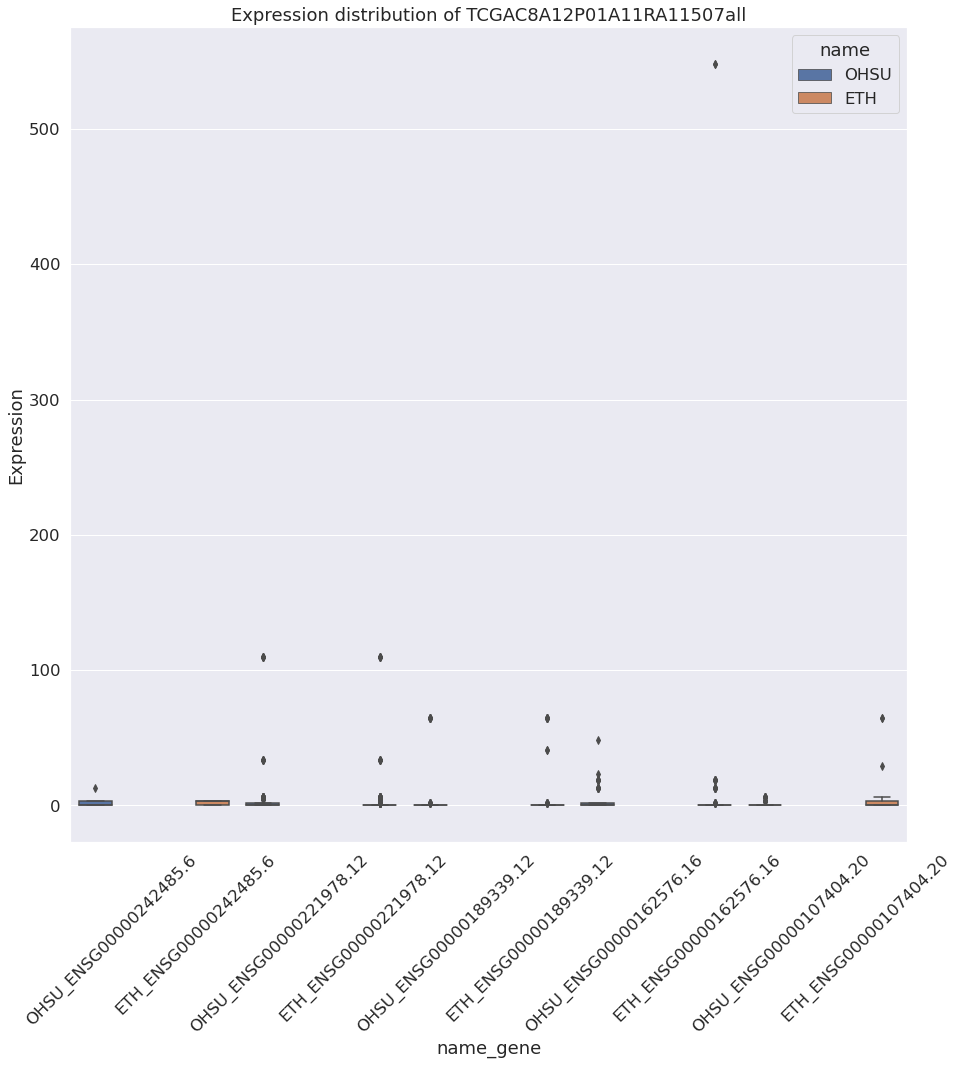

In [170]:
def plot_boxplot_gene_expression(eth_df, ohsu_df, gene_names, exp_col):
    '''
    Applicable only for limited number of genes
    '''
    df = merge_df(eth_df, ohsu_df)
    df = df[df['gene_id'].isin(gene_names)]
    df['name_gene'] = df['name'] + '_' + df['gene_id']
    df = df.sort_values(by=['gene_id', 'name'], ascending=False)
 
    # Creating plot    
    sns.boxplot(x = 'name_gene', y = exp_col, data = df, hue = 'name')
    #sns.stripplot(x = 'name_gene', y = exp_col, data = df, hue = 'name')
    plt.xticks(rotation=45)
    plt.ylabel('Expression')
    plt.title('Expression distribution of {}'.format(exp_col))
    
    save_plot('Boxplot of kmers expressions')

    # show plot
    plt.show()


plot_boxplot_gene_expression(df1, df2, GENE_NAMES, exp_col)

In [153]:
def plot_histogram_gene_expression(eth_df, ohsu_df, gene_names, exp_col):
    '''
    Applicable only for limited number of genes
    ''' 
    eth_df = eth_df[eth_df['gene_id'].isin(gene_names)]
    ohsu_df = ohsu_df[ohsu_df['gene_id'].isin(gene_names)]
    n = 10
    # Creating plot
    for gene in gene_names:
        data1 = eth_df[eth_df['gene_id'] == gene][exp_col]
        data2 = ohsu_df[ohsu_df['gene_id'] == gene][exp_col]
        plt.hist(data1, bins=n, alpha=0.5, label='ETH_' + gene)
        plt.hist(data2, bins=n, alpha=0.5, label='OHSU_' + gene)

    plt.xlabel('Expression')
    plt.ylabel('Count')
    plt.title('Histograms of ' + exp_col)
    plt.legend(loc='upper right')
    save_plot('Histogram of kmers expression')

    # show plot
    plt.show()

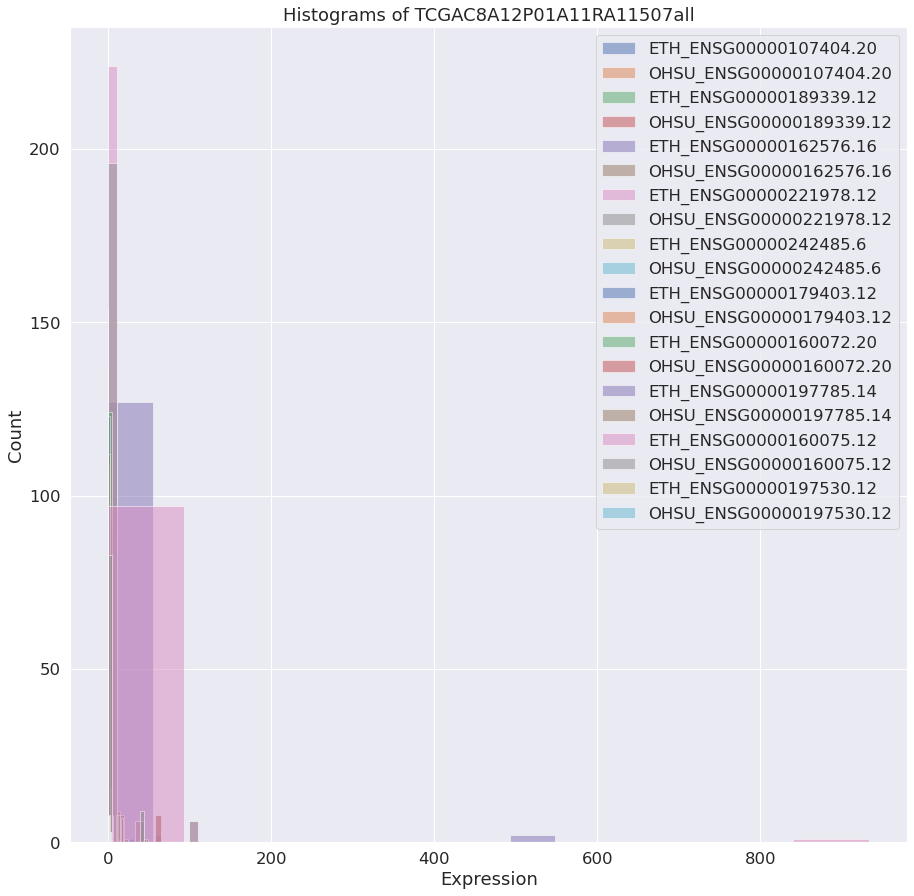

In [155]:
plot_histogram_gene_expression(df1, df2, GENE_NAMES_10, exp_col)

In [183]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

def plot_ecdf(data, label, with_percentiles = False):
    x, y = ecdf(data)
    plt.plot(x, y, marker='.', linestyle='none', label = label)
    
    if with_percentiles:
        percentiles = np.array([2.5, 25, 50, 75, 97.5]) # percentiles ranges
        percentiles_values = np.percentile(data, percentiles)
        # Overlay percentiles as red diamonds.
        plt.plot(percentiles_values, percentiles/100, marker='D', color='red', linestyle='none')
        

def plot_ecdf_gene_expression(eth_df, ohsu_df, gene_names, exp_col):
    '''
    Applicable only for limited number of genes
    ''' 
    eth_df = eth_df[eth_df['gene_id'].isin(gene_names)]
    ohsu_df = ohsu_df[ohsu_df['gene_id'].isin(gene_names)]
    n = 10
    # Creating plot
    for gene in gene_names:
        data1 = eth_df[eth_df['gene_id'] == gene][exp_col]
        data2 = ohsu_df[ohsu_df['gene_id'] == gene][exp_col]
        plot_ecdf(data1, 'ETH_' + gene)
        plot_ecdf(data2, 'OHSU_' + gene)

    plt.xlabel('Expression')
    plt.ylabel('ECDF')
    plt.title('ECDF of ' + exp_col)
    plt.legend(loc='upper right')
    save_plot('Histogram of kmers expression')

    # show plot
    plt.show()

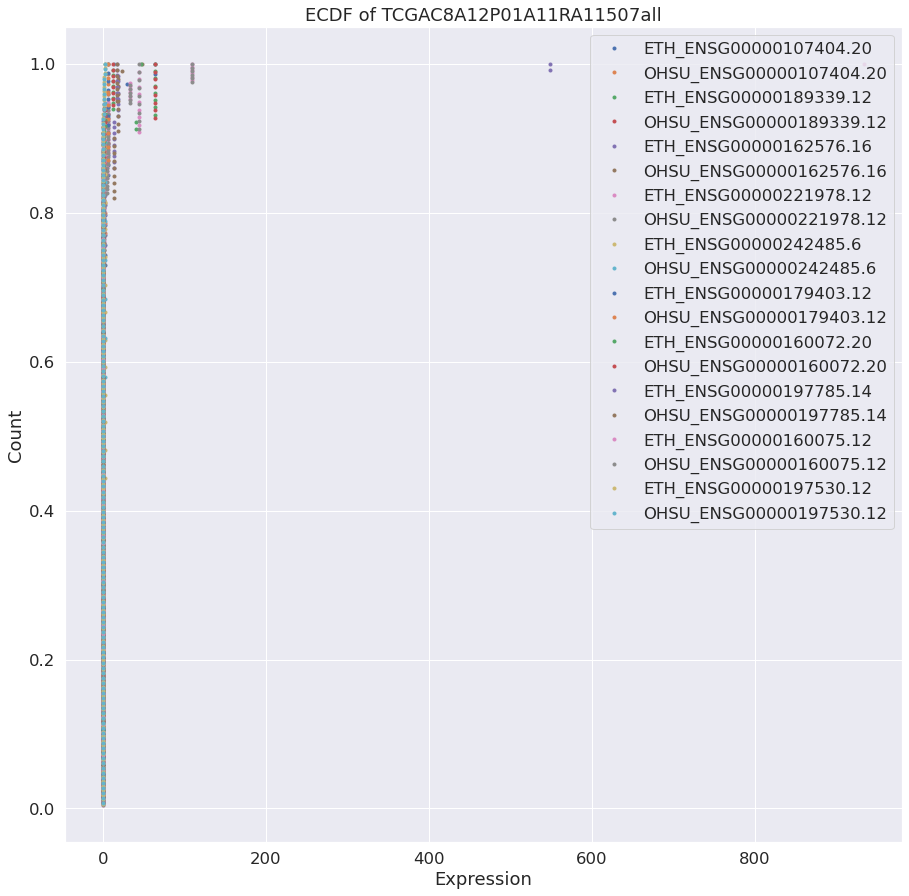

In [175]:
plot_ecdf_gene_expression(df1, df2, GENE_NAMES_10, exp_col)

## Expression analysis for values above 0
 - Select one expression column

In [168]:
exp_col = expression_cols[0]
df1_above0 = df1[df1[exp_col] > 0]
df2_above0 = df2[df2[exp_col] > 0]

In [163]:
df1_above0.describe()

TCGAC8A12P01A11RA11507all  TCGABHA18V01A11RA12D07all  \
count                 202.000000                 202.000000   
mean                   24.661595                  33.703439   
std                    86.472305                 134.288722   
min                     1.461321                   0.000000   
25%                     1.461321                   2.474321   
50%                     5.845283                   4.948642   
75%                    17.535848                  10.515865   
max                   933.783907                1807.491626   

       TCGAA2A0SX01A12RA08407all  TCGAAOA0JM01A21RA05607all  \
count                 202.000000                 202.000000   
mean                   34.138036                  26.352683   
std                    86.937834                 127.678736   
min                     0.000000                   0.000000   
25%                     2.280385                   0.000000   
50%                     5.130866                   2.102386   
75%                    22.803847                  10.511931   
max                   628.245985                1200.462525   

       TCGAA2A0D201A21RA03407all  
count                 202.000000  
mean                   23.322731  
std                   103.693670  
min                     0.000000  
25%                     0.000000  
50%                     2.735089  
75%                    10.940358  
max                  1397.630729

In [164]:
df2_above0.describe()

TCGAC8A12P01A11RA11507all  TCGABHA18V01A11RA12D07all  \
count                 186.000000                 186.000000   
mean                   14.644633                  21.530585   
std                    23.446186                  43.240752   
min                     1.461321                   0.000000   
25%                     1.461321                   2.474321   
50%                     5.845283                   4.948642   
75%                    13.151886                   8.660124   
max                   109.599050                 190.522731   

       TCGAA2A0SX01A12RA08407all  TCGAAOA0JM01A21RA05607all  \
count                 186.000000                 186.000000   
mean                   25.274264                  12.659530   
std                    51.121283                  31.049793   
min                     0.000000                   0.000000   
25%                     2.280385                   0.000000   
50%                     5.700962                   0.000000   
75%                    22.803847                  10.511931   
max                   241.720778                 300.641228   

       TCGAA2A0D201A21RA03407all  
count                 186.000000  
mean                   13.587219  
std                    27.738313  
min                     0.000000  
25%                     0.000000  
50%                     2.735089  
75%                    10.940358  
max                   140.857109

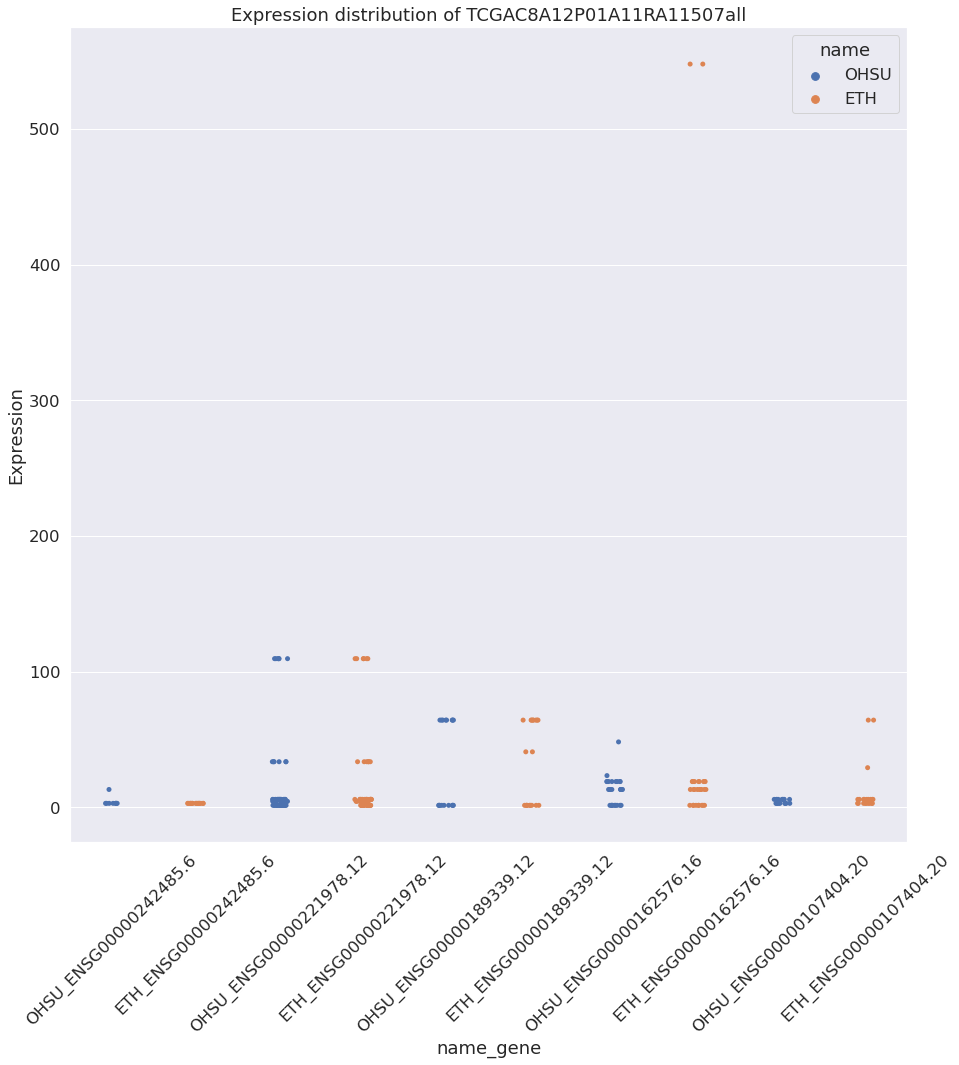

In [169]:
plot_stripplot_gene_expression(df1_above0, df2_above0, GENE_NAMES, exp_col)

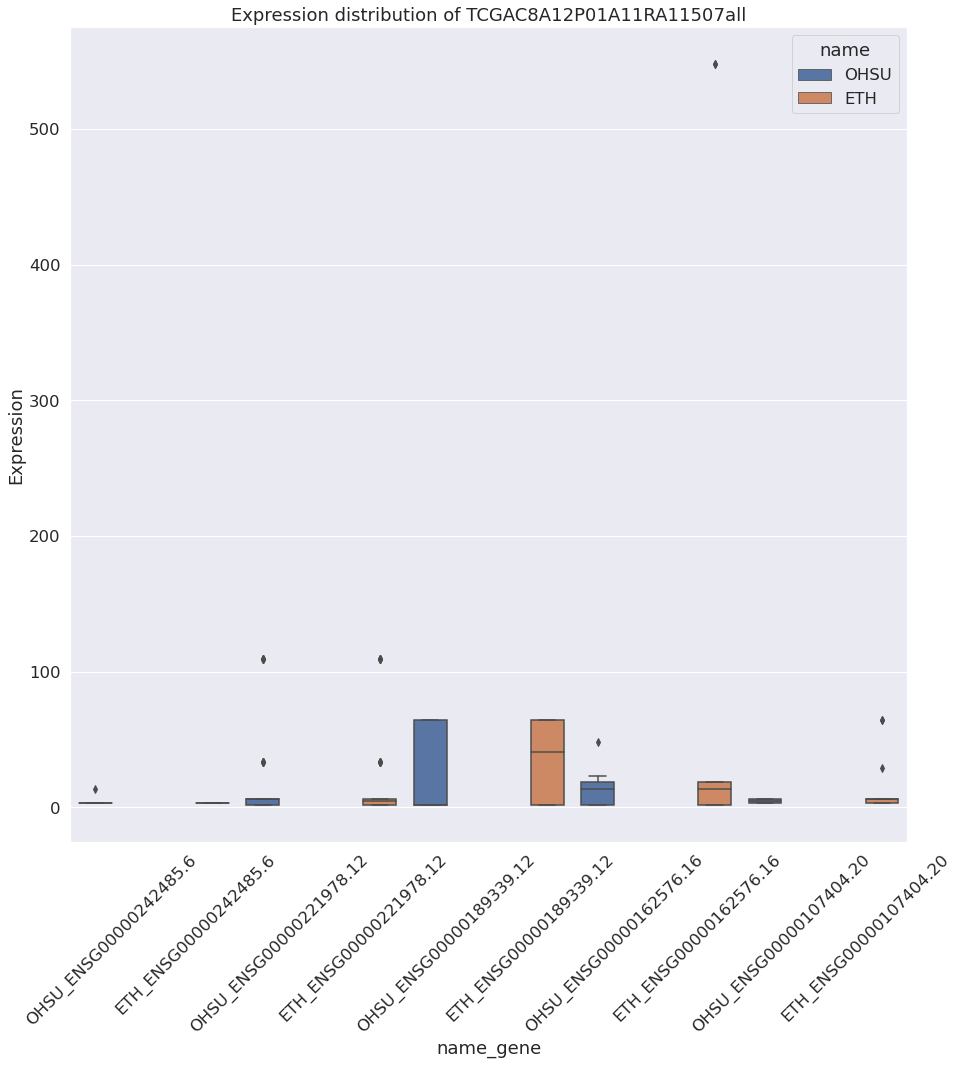

In [171]:
plot_boxplot_gene_expression(df1_above0, df2_above0, GENE_NAMES, exp_col)

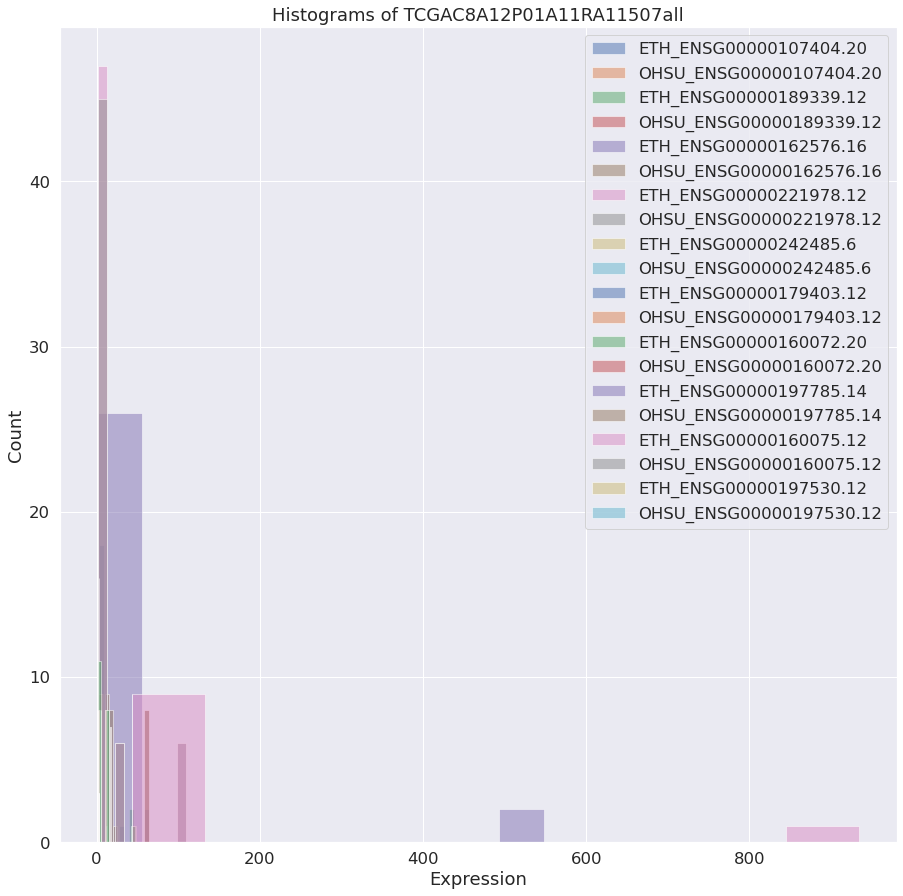

In [172]:
plot_histogram_gene_expression(df1_above0, df2_above0, GENE_NAMES_10, exp_col)

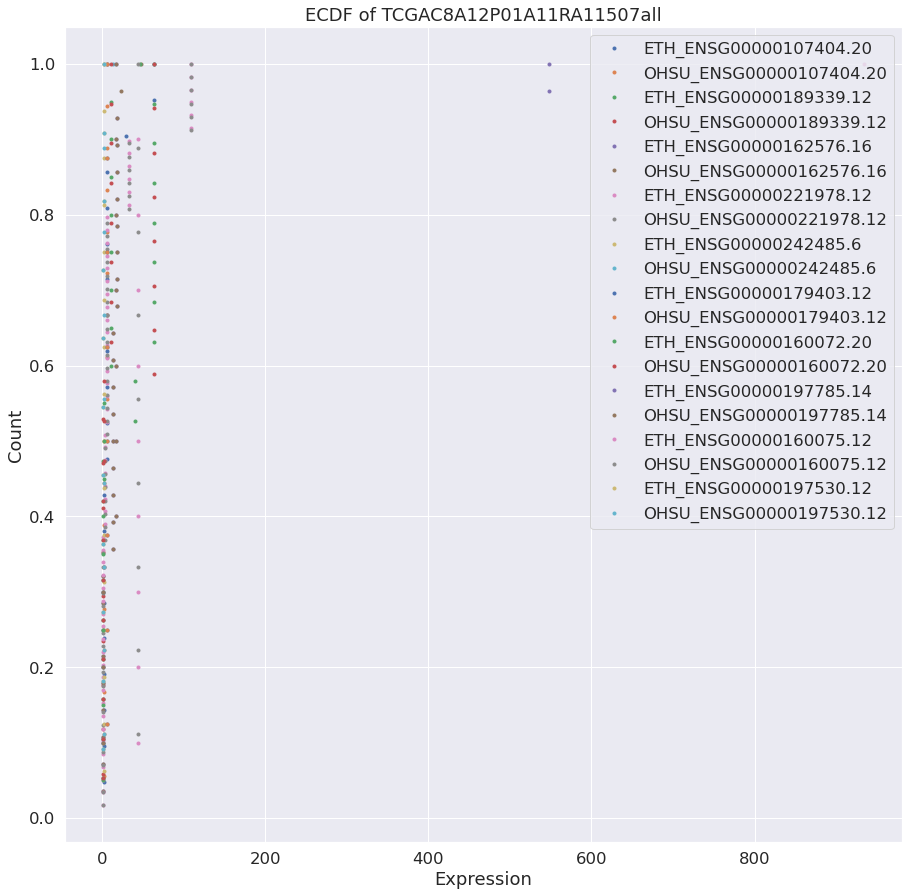

In [176]:
plot_ecdf_gene_expression(df1_above0, df2_above0, GENE_NAMES_10, exp_col)

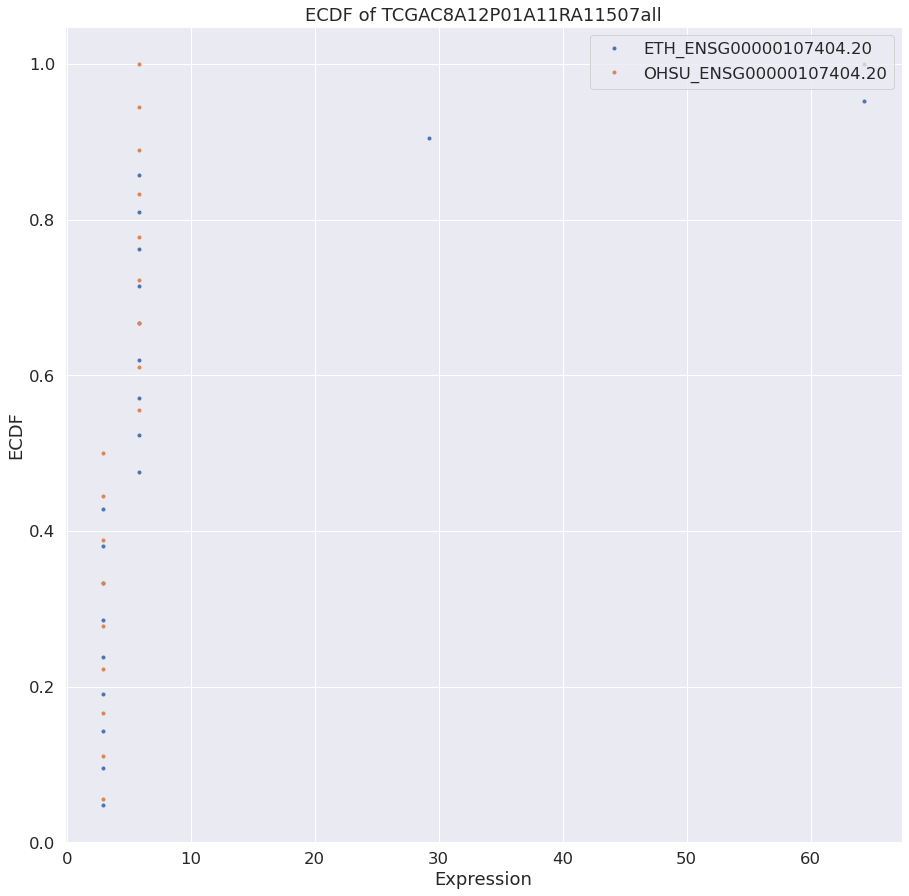

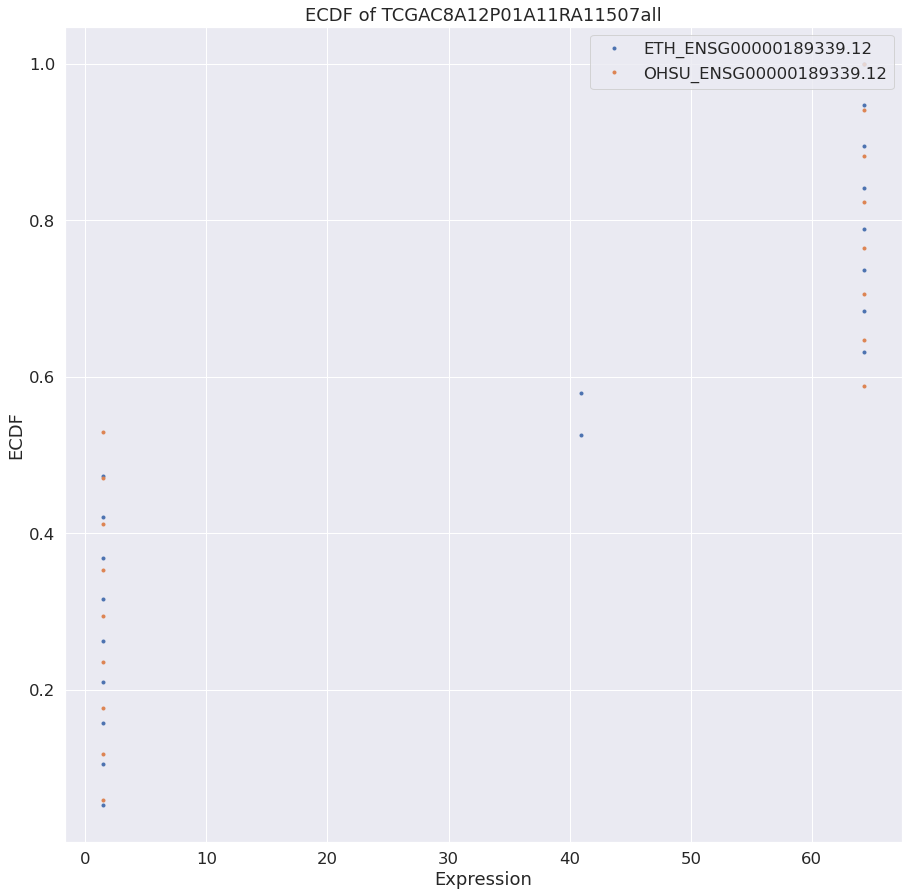

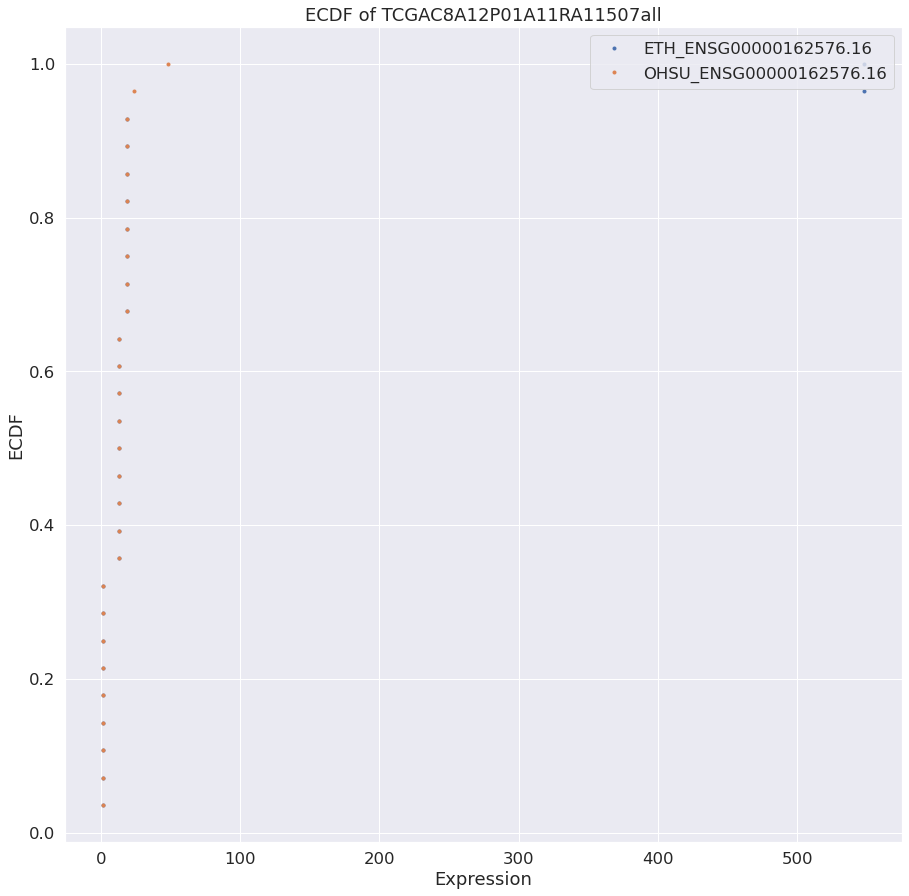

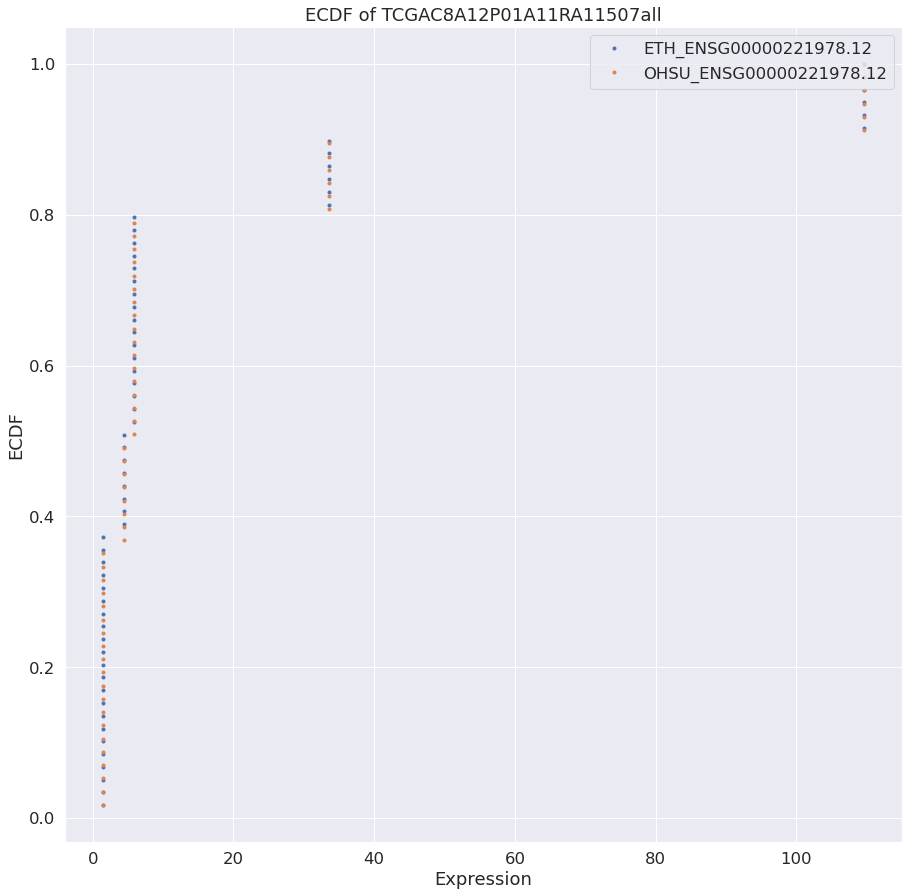

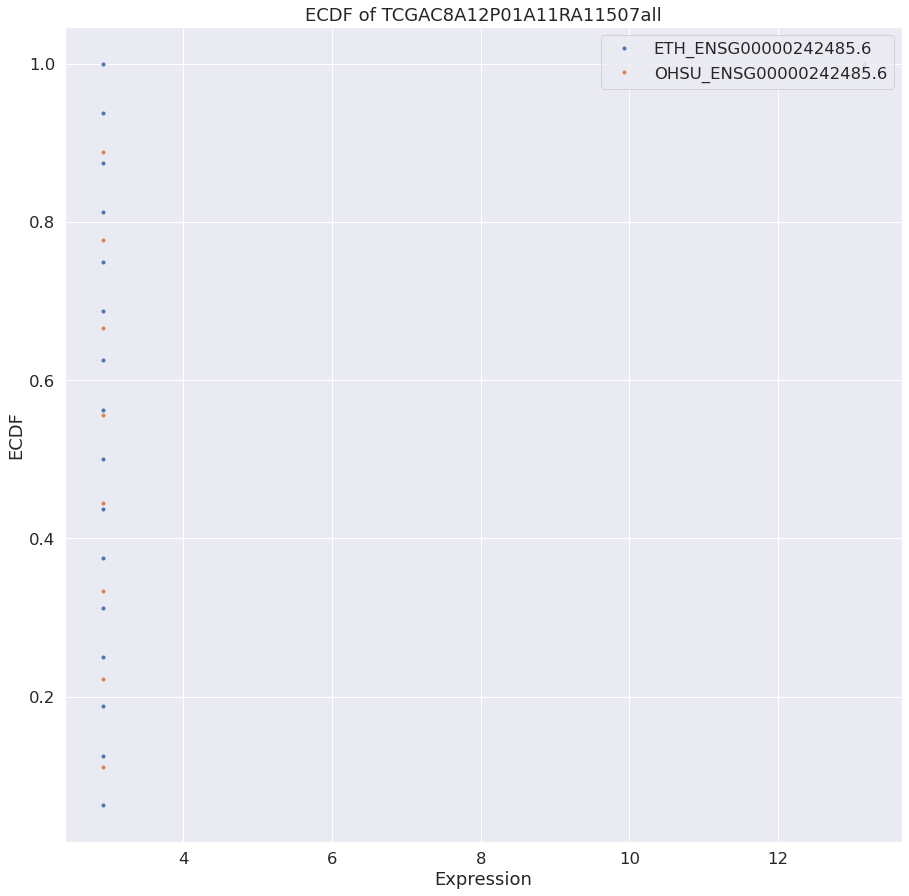

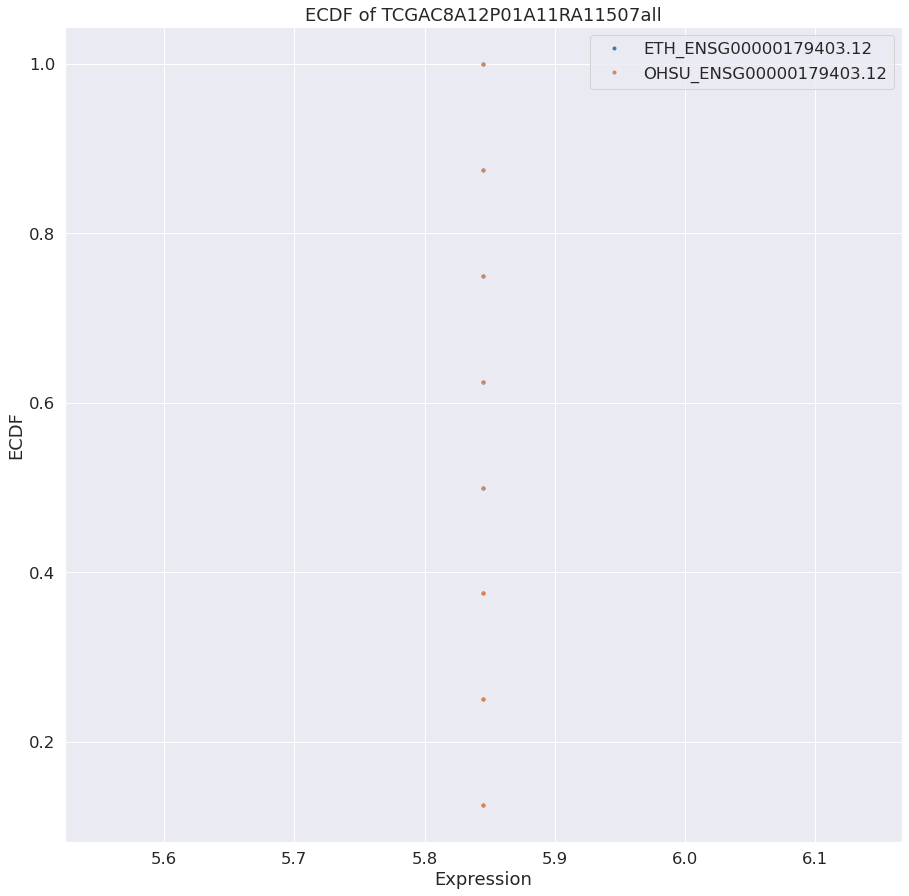

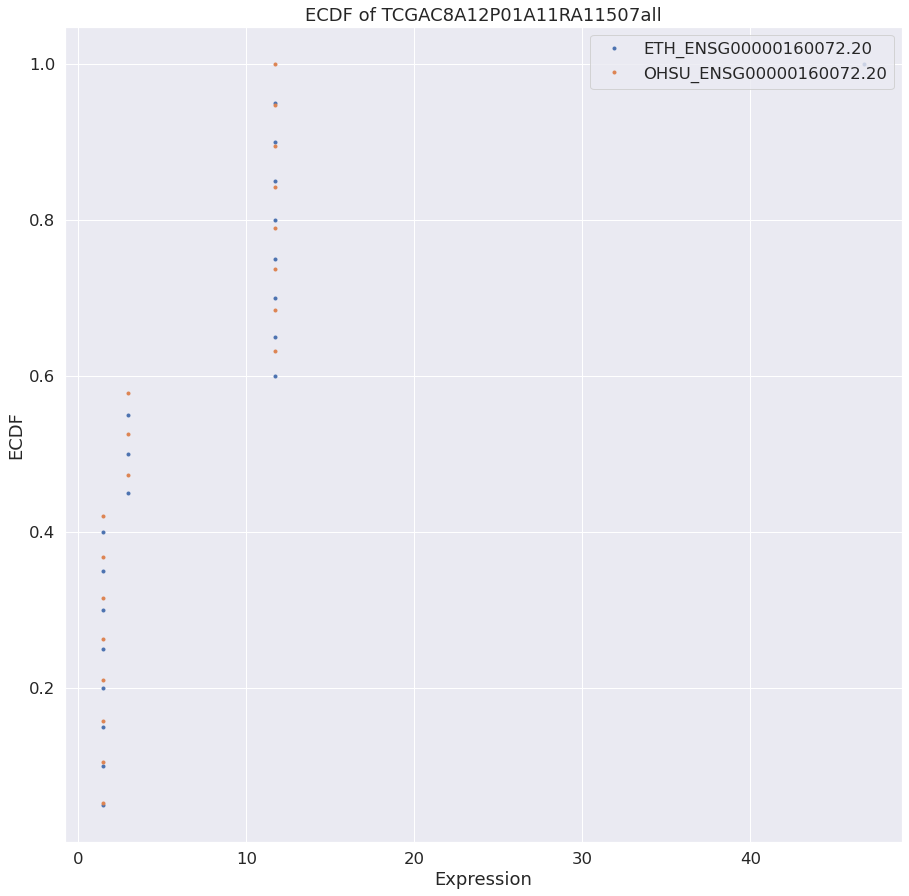

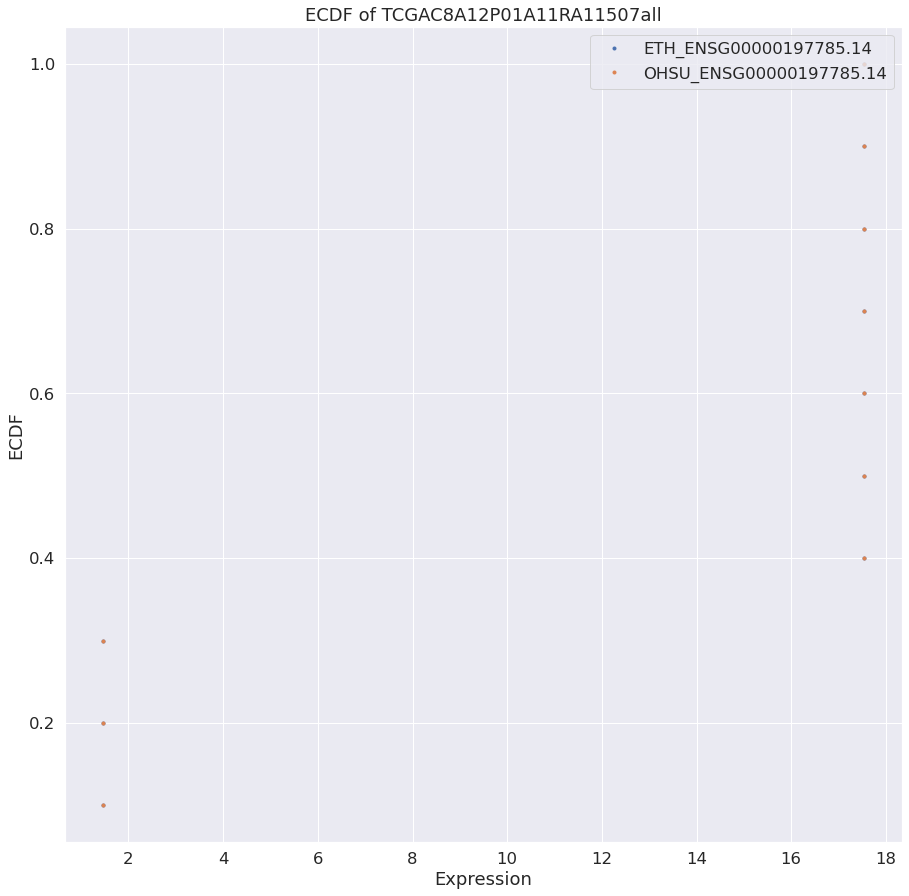

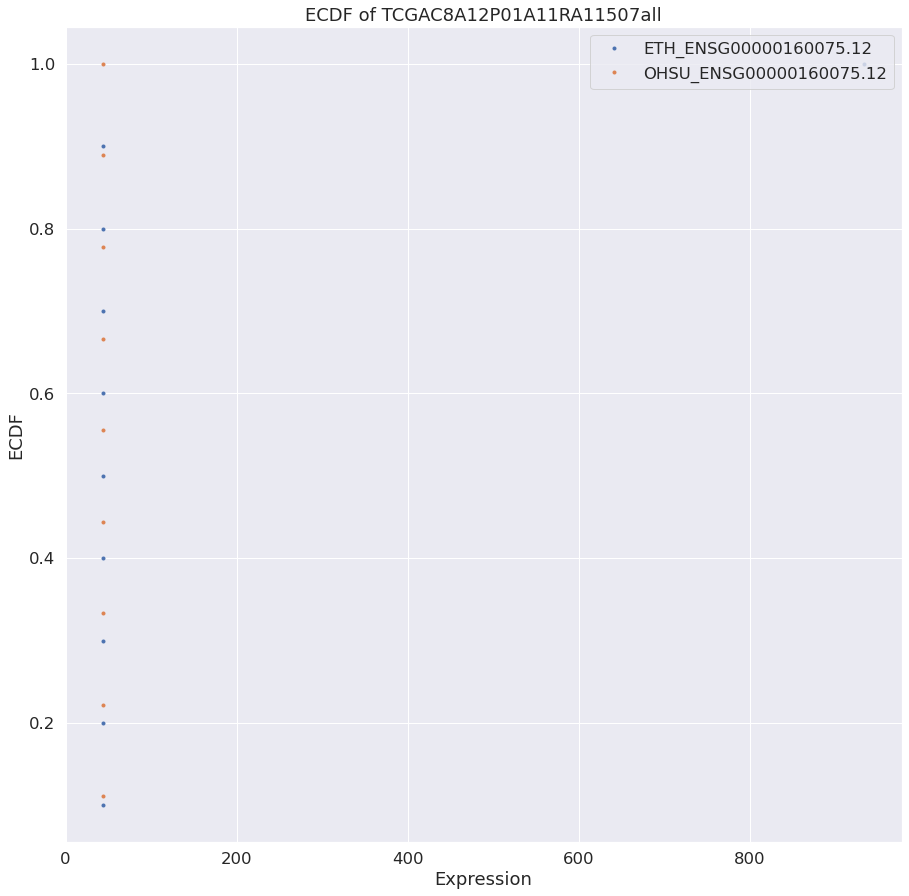

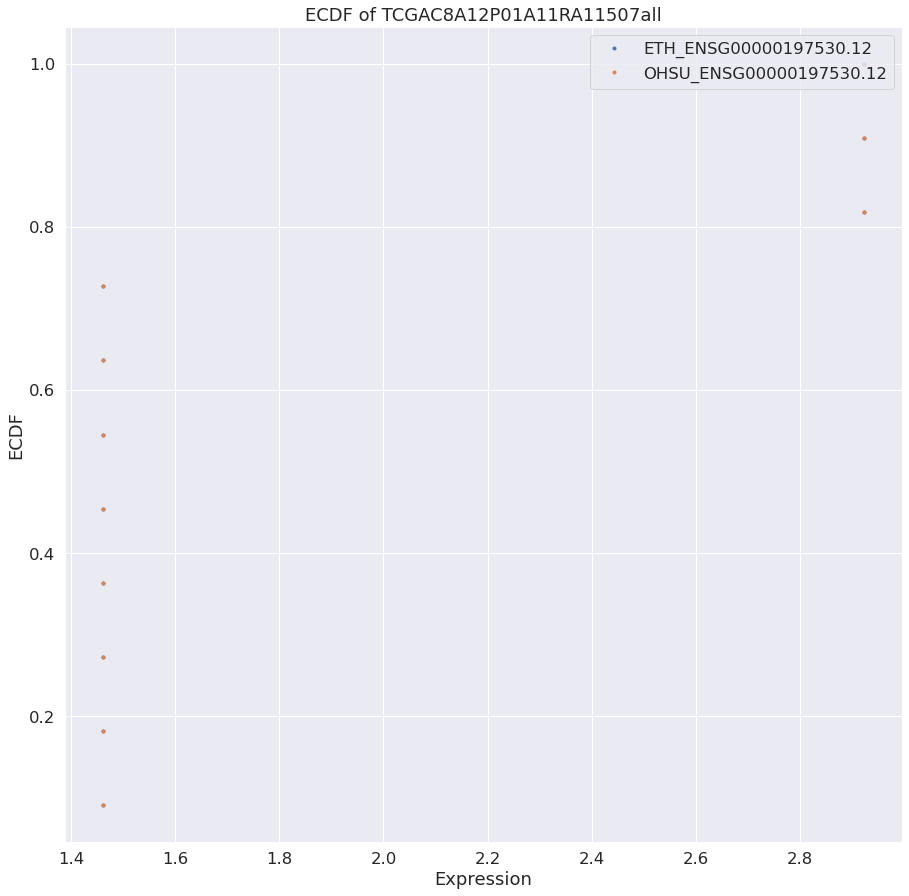

In [186]:
for gene in GENE_NAMES_10:
    plot_ecdf_gene_expression(df1_above0, df2_above0, [gene], exp_col)

# TRICKY MOMENT

In [ ]:
#What could be tricky- in data set we can meet 2 times the same kmer but it will have different expression value 
#( because they cane from different parts of the genome)

# Calculating the size of unique junctions etc.

In [ ]:
'''
Yes looking at the junctions of all genes would be good. But it needs to be an integrated analysis as 
you mention. Yes you can apply the same analysis as on kmers to the junctions. 
This means calculating the size of the intersection, the difference, the size of unique junctions etc.

'''

# ETH DATA SET (full data set)

# CODE FOR ALL ETH DATA FRAMES (.gz files) to extract junction coordinates column

In [ ]:
def get_junction_coordinates(df, coordinates_col, sep=':'):
    df['strand'] = None
    df['junction_coordinate'] = None

    for idx, row in df.iterrows():
        kmer_coordinates = [int(x) for x in row[coordinates_col].split(sep) if x !='None']

        if kmer_coordinates[1] < kmer_coordinates[2]: # order strand +

            df.loc[idx, 'strand'] = '+'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:3]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:5]])
        else: # order strand +
            df.loc[idx, 'strand'] = '-'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0]]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0],
                                                                                kmer_coordinates[2],
                                                                                kmer_coordinates[5]
                                                                               ]])
    return df


#kmer_df=pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_117/ref_graph_kmer_JuncExpr/part-e8f848fd-a798-41cf-a066-812e9e3370e9.gz', sep = '\t')
#to get junction_coordinate column
kmer_df = get_junction_coordinates(kmer_df, 'coord')
kmer_df

# RUN ONLY ONCE (CODE FOR COORDINATES FORMAT CHANGING)

In [14]:
def ohsu_to_eth_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df[col] = tmp_jx[0] + sep + (tmp_jx[1].astype(int) - 1).astype(str) + sep + tmp_jx[2] + sep + tmp_jx[3]
    return df

In [15]:
ohsu_df = ohsu_to_eth_coord(ohsu_df)

In [16]:
ohsu_df

jx  TCGA24143101A01R156613all  \
0               chr10;48725;48803;-                   0.000000   
1             chr10;277577;281199;-                   2.295572   
2             chr10;280260;281199;-                   0.000000   
3             chr10;281323;283271;-                   3.443358   
4             chr10;283446;286272;-                   1.147786   
...                             ...                        ...   
1346995  chr2;109934894;109947363;+                  14.921219   
1346996  chr2;109987190;109987560;+                  34.433582   
1346997  chr2;109987190;109993691;+                   0.000000   
1346998  chr2;109987190;109994400;+                  16.069005   
1346999  chr2;109987190;110017561;+                   0.000000   

         TCGA24229801A01R156913all  TCGA25131301A01R156513all  \
0                         2.176140                   0.842293   
1                        30.465966                  16.003571   
2                         0.000000                   0.000000   
3                        23.212165                  18.530451   
4                        41.346668                  19.372744   
...                            ...                        ...   
1346995                   3.626901                 175.196991   
1346996                  53.678131                 138.136089   
1346997                   1.450760                   1.684586   
1346998                   5.077661                   5.053759   
1346999                   0.000000                  11.792105   

         TCGA25131901A01R156513all  TCGA61200801A02R156813all  \
0                         2.517914                   0.961344   
1                        10.071656                  26.917642   
2                         0.000000                   0.961344   
3                        15.107483                  20.188231   
4                         6.714437                  28.840330   
...                            ...                        ...   
1346995                  87.287682                   1.922689   
1346996                  42.804536                  61.526038   
1346997                   1.678609                   0.000000   
1346998                  10.071656                   8.652099   
1346999                   1.678609                   0.000000   

         TCGAA2A0D201A21RA03407all  TCGAA2A0SX01A12RA08407all  \
0                         0.000000                   5.700962   
1                        51.966700                  53.589040   
2                         0.000000                   0.000000   
3                        32.821074                  33.065578   
4                        61.539513                  62.710579   
...                            ...                        ...   
1346995                   0.000000                   1.140192   
1346996                  21.880716                  92.355580   
1346997                   0.000000                   1.140192   
1346998                   9.572813                   4.560769   
1346999                   0.000000                   1.140192   

         TCGAAOA0JM01A21RA05607all  TCGABHA18V01A11RA12D07all  ...  \
0                         2.102386                   1.237161  ...   
1                        31.535793                  50.723584  ...   
2                         6.307159                   2.474321  ...   
3                        44.150110                  40.826300  ...   
4                        37.842952                  92.787044  ...   
...                            ...                        ...  ...   
1346995                   2.102386                   0.000000  ...   
1346996                   8.409545                  44.537781  ...   
1346997                   2.102386                   0.000000  ...   
1346998                  10.511931                   8.660124  ...   
1346999                   2.102386                  18.557409  ...   

                                     modified_upstream_t

# APPLY THIS CODE TO EXTRACT junction coordinates column 

In [17]:
ohsu_df['coord_jx_extr'] = ohsu_df['jx'].apply(lambda x: ':'.join(x.split(';')[1:3]))
ohsu_df['coord_jx_extr']

0                  48725:48803
1                277577:281199
2                280260:281199
3                281323:283271
4                283446:286272
                  ...         
1346995    109934894:109947363
1346996    109987190:109987560
1346997    109987190:109993691
1346998    109987190:109994400
1346999    109987190:110017561
Name: coord_jx_extr, Length: 1347000, dtype: object

# GTEX data set analysis

# Task: GTEX data COMPARISON (comparison of equivalent columns )

In [ ]:
'''
GTEX data set. Take a look at the same kmers to compare reccurence columns.
You need to compare only the reccurence of samples 
(compare the column GTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0) .

The same for columns GTEX_brain_testis_over2 equivalent to  gtexCohortfilter >=2.0
The same for columns GTEX_brain_testis_over3 equivalent to  gtexCohortfilter >=3.0
The same for columns GTEX_brain_testis_over5 equivalent to  gtexCohortfilter >=5.0
The same for columns GTEX_brain_testis_over10 equivalent to  gtexCohortfilter >=10.0

'''

# PLANNED PLOTS

# To compare reccurence columns try to build bar plot, scatter plot

In [ ]:
'''
“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, 
count the number of samples where the kmer has expression >0

“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count 
the number of samples where the kmer has expression >0
It is the same


GTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0? Reccurence of samples -  if the number is simalar it doesn't mean that expression is the same
Sample 1 - expession 2 (number of reads = 2)
Sample 2 -expression 4
Sample 3 -expression 0 

GTEX cohort filter >0 reccurence is equal to 2, because of 2 samples have expression more than 0)
GTEX cohor filter > or = to 3 ( Reccurence =1 because only 1 sample has expression >3)

Task: Take a look at the same kmers to compare reccurence column  
'''

# GTEX DATA (ETH data set) , column "gtexCohortfilter >0.0"

In [2]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

ETH_GTEX_2COL_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/batch_to_gene.txt'
ETH_GTEX_PATH =  '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_intermediate/complete_cancer_candidates_order_r.tsv.gz'

GENE_NAMES = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6']
GENE_NAMES_10 = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6',
              'ENSG00000179403.12',
              'ENSG00000160072.20',
              'ENSG00000197785.14',
              'ENSG00000160075.12',
              'ENSG00000197530.12']

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

# plot constants
PLOT_FOLDER = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/BRCAplots/'
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 16
OHSU_COLOR = 'red'
ETH_COLOR = 'green'
OHSU_ETH_COLOR = 'yellow'

def sanity_check(df, name):
    print('Dataset: {}; Number of records: {}; Number of genes: {}'.format(name, len(df), len(df['gene_id'].unique())))
def save_plot(name, folder = PLOT_FOLDER):
    figure_path = os.path.join(name, folder)
    plt.savefig(figure_path) #specify resolution and other parameters

In [3]:
eth_df = pd.read_csv(ETH_GTEX_PATH, sep = '\t')
eth_df

kmer  gtexCohortfilter >0.0  gtexCohortfilter >=1.0  \
0         WYITRSGIA                 3290.0                  1969.0   
1         WYITRSGIA                  572.0                   545.0   
2         ISSQSRVEK                  278.0                   261.0   
3         RSGDEEKYP                 7350.0                  4622.0   
4         HLKMKMFQI                  146.0                   136.0   
...             ...                    ...                     ...   
22348742  DSAVDFTGR                 8409.0                  7290.0   
22348743  LKWLLLLSL                  521.0                   489.0   
22348744  CLKWCKHPT                  506.0                   476.0   
22348745  KWLLLLSLF                  521.0                   489.0   
22348746  KWCKHPTLG                  506.0                   476.0   

          gtexCohortfilter >=2.0  gtexCohortfilter >=3.0  \
0                          861.0                   394.0   
1                          243.0                   130.0   
2                           82.0                    29.0   
3                         2653.0                  1745.0   
4                           42.0                    20.0   
...                          ...                     ...   
22348742                  5881.0                  4758.0   
22348743                   234.0                   124.0   
22348744                   180.0                    88.0   
22348745                   234.0                   124.0   
22348746                   180.0                    88.0   

          gtexCohortfilter >=5.0  gtexCohortfilter >=10.0  \
0                           89.0                      4.0   
1                           27.0                      2.0   
2                            7.0                      0.0   
3                         1126.0                    734.0   
4                            3.0                      1.0   
...                          ...                      ...   
22348742                  3323.0                   1612.0   
22348743                    41.0                      2.0   
22348744                    29.0                      2.0   
22348745                    41.0                      2.0   
22348746                    29.0                      2.0   

                                                      coord  \
0             92347505:92347506:92349915:92349941:None:None   
1             92347505:92347506:92349915:92349941:None:None   
2             92379851:92379859:92493866:92493885:None:None   
3             92600493:92600508:92611313:92611325:None:None   
4             92379850:92379859:92496416:92496434:None:None   
...                                                     ...   
22348742  121183457:121183462:121181326:121181348:None:None   
22348743  121181270:121181278:121180861:121180880:None:None   
22348744  121181270:121181281:121168819:121168835:None:None   
22348745  121181270:121181275:121180858:121180880:None:None   
22348746  121181270:121181275:121168813:121168835:None:None   

          junctionAnnotated  readFrameAnnotated  ...  \
0                     False               False  ...   
1                     False               False  ...   
2                     False               False  ...   
3                      True                True  ...   
4                     False               False  ...   
...                     ...                 ...  ...   
22348742               True                True  ...   
22348743              False               False  ...   
22348744               True               False  ...   
22348745              False               False  ...   
22348746               True               False  ...   

          cancerCohortfilter >=2.0  cancerCohortfilter >=3.0  \
0                              138                        82   
1                              138                        82   
2                               10                         2   
3                              641

In [4]:
print(eth_df.columns)

Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGAC8A12P01A11RA11507all', 'TCGAAOA0JM01A21RA05607all',
       'TCGABHA18V01A11RA12D07all', 'TCGAA2A0D201A21RA03407all',
       'TCGAA2A0SX01A12RA08407all', 'isAnnotated'],
      dtype='object')


In [5]:
eth_df[['batch', 'coord', 'gtexCohortfilter >0.0']]

batch                                              coord  \
0         56543      92347505:92347506:92349915:92349941:None:None   
1         56543      92347505:92347506:92349915:92349941:None:None   
2         56543      92379851:92379859:92493866:92493885:None:None   
3         56543      92600493:92600508:92611313:92611325:None:None   
4         56543      92379850:92379859:92496416:92496434:None:None   
...         ...                                                ...   
22348742   2858  121183457:121183462:121181326:121181348:None:None   
22348743   2858  121181270:121181278:121180861:121180880:None:None   
22348744   2858  121181270:121181281:121168819:121168835:None:None   
22348745   2858  121181270:121181275:121180858:121180880:None:None   
22348746   2858  121181270:121181275:121168813:121168835:None:None   

          gtexCohortfilter >0.0  
0                        3290.0  
1                         572.0  
2                         278.0  
3                        7350.0  
4                         146.0  
...                         ...  
22348742                 8409.0  
22348743                  521.0  
22348744                  506.0  
22348745                  521.0  
22348746                  506.0  

[22348747 rows x 3 columns]

# MERGE DATA OF TWO DATAFRAMES GTEX_df and batch_to_gene.txt

In [6]:
'''
There is a “gene <-> batch number” table
/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/batch_to_gene.txt
You can merge it on the batch number
'''
df = pd.read_csv(ETH_GTEX_2COL_PATH, sep=',', header=0)
df.columns = ['gene_id', 'batch']
df

gene_id  batch
0      ENSG00000062282.15  10000
1       ENSG00000198382.9  10004
2      ENSG00000085741.13  10012
3       ENSG00000137492.8  10015
4      ENSG00000179240.11  10016
...                   ...    ...
19691  ENSG00000149243.15   9988
19692  ENSG00000158555.15   9989
19693  ENSG00000149257.14   9991
19694  ENSG00000171533.11   9993
19695  ENSG00000166391.15   9997

[19696 rows x 2 columns]

In [7]:
eth_df_merged = pd.merge(eth_df, df, how='inner', on='batch')
eth_df_merged

kmer  gtexCohortfilter >0.0  gtexCohortfilter >=1.0  \
0         WYITRSGIA                 3290.0                  1969.0   
1         WYITRSGIA                  572.0                   545.0   
2         ISSQSRVEK                  278.0                   261.0   
3         RSGDEEKYP                 7350.0                  4622.0   
4         HLKMKMFQI                  146.0                   136.0   
...             ...                    ...                     ...   
22348666  DSAVDFTGR                 8409.0                  7290.0   
22348667  LKWLLLLSL                  521.0                   489.0   
22348668  CLKWCKHPT                  506.0                   476.0   
22348669  KWLLLLSLF                  521.0                   489.0   
22348670  KWCKHPTLG                  506.0                   476.0   

          gtexCohortfilter >=2.0  gtexCohortfilter >=3.0  \
0                          861.0                   394.0   
1                          243.0                   130.0   
2                           82.0                    29.0   
3                         2653.0                  1745.0   
4                           42.0                    20.0   
...                          ...                     ...   
22348666                  5881.0                  4758.0   
22348667                   234.0                   124.0   
22348668                   180.0                    88.0   
22348669                   234.0                   124.0   
22348670                   180.0                    88.0   

          gtexCohortfilter >=5.0  gtexCohortfilter >=10.0  \
0                           89.0                      4.0   
1                           27.0                      2.0   
2                            7.0                      0.0   
3                         1126.0                    734.0   
4                            3.0                      1.0   
...                          ...                      ...   
22348666                  3323.0                   1612.0   
22348667                    41.0                      2.0   
22348668                    29.0                      2.0   
22348669                    41.0                      2.0   
22348670                    29.0                      2.0   

                                                      coord  \
0             92347505:92347506:92349915:92349941:None:None   
1             92347505:92347506:92349915:92349941:None:None   
2             92379851:92379859:92493866:92493885:None:None   
3             92600493:92600508:92611313:92611325:None:None   
4             92379850:92379859:92496416:92496434:None:None   
...                                                     ...   
22348666  121183457:121183462:121181326:121181348:None:None   
22348667  121181270:121181278:121180861:121180880:None:None   
22348668  121181270:121181281:121168819:121168835:None:None   
22348669  121181270:121181275:121180858:121180880:None:None   
22348670  121181270:121181275:121168813:121168835:None:None   

          junctionAnnotated  readFrameAnnotated  ...  \
0                     False               False  ...   
1                     False               False  ...   
2                     False               False  ...   
3                      True                True  ...   
4                     False               False  ...   
...                     ...                 ...  ...   
22348666               True                True  ...   
22348667              False               False  ...   
22348668               True               False  ...   
22348669              False               False  ...   
22348670               True               False  ...   

          cancerCohortfilter >=3.0  cancerCohortfilter >=5.0  \
0                               82                        26   
1                               82                        26   
2                                2                         0   
3                              520

In [8]:
eth_df_merged[['gene_id', 'kmer', 'coord', 'batch', 'gtexCohortfilter >0.0']]

gene_id       kmer  \
0         ENSG00000188312.14  WYITRSGIA   
1         ENSG00000188312.14  WYITRSGIA   
2         ENSG00000188312.14  ISSQSRVEK   
3         ENSG00000188312.14  RSGDEEKYP   
4         ENSG00000188312.14  HLKMKMFQI   
...                      ...        ...   
22348666  ENSG00000188610.12  DSAVDFTGR   
22348667  ENSG00000188610.12  LKWLLLLSL   
22348668  ENSG00000188610.12  CLKWCKHPT   
22348669  ENSG00000188610.12  KWLLLLSLF   
22348670  ENSG00000188610.12  KWCKHPTLG   

                                                      coord  batch  \
0             92347505:92347506:92349915:92349941:None:None  56543   
1             92347505:92347506:92349915:92349941:None:None  56543   
2             92379851:92379859:92493866:92493885:None:None  56543   
3             92600493:92600508:92611313:92611325:None:None  56543   
4             92379850:92379859:92496416:92496434:None:None  56543   
...                                                     ...    ...   
22348666  121183457:121183462:121181326:121181348:None:None   2858   
22348667  121181270:121181278:121180861:121180880:None:None   2858   
22348668  121181270:121181281:121168819:121168835:None:None   2858   
22348669  121181270:121181275:121180858:121180880:None:None   2858   
22348670  121181270:121181275:121168813:121168835:None:None   2858   

          gtexCohortfilter >0.0  
0                        3290.0  
1                         572.0  
2                         278.0  
3                        7350.0  
4                         146.0  
...                         ...  
22348666                 8409.0  
22348667                  521.0  
22348668                  506.0  
22348669                  521.0  
22348670                  506.0  

[22348671 rows x 5 columns]

In [9]:
eth_df = eth_df_merged

In [10]:
print(sum(eth_df.duplicated()))

7063419


## ETH columns renaming, filtering

In [11]:
# Rename columns
columns_names = {
    'gtexCohortfilter >0.0' : 'GTEx_brain_testis_over0',
    'gtexCohortfilter >=2.0' : 'GTEx_brain_testis_over2',
    'gtexCohortfilter >=3.0' : 'GTEx_brain_testis_over3',
    'gtexCohortfilter >=5.0' : 'GTEx_brain_testis_over5',
    'gtexCohortfilter >=10.0' : 'GTEx_brain_testis_over10'}
eth_df.rename(columns = columns_names, inplace = True)
gtex_columns = list(columns_names.values())
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

In [12]:
cols = ['gene_id', 'kmer', 'coord'] + gtex_columns
eth_df = eth_df[cols]

In [13]:
# ETH has duplicates
print(sum(eth_df.duplicated()))

7886422


In [14]:
## Filter dataset: skip if you want analyzie full dataset
eth_df = eth_df[eth_df['gene_id'].isin(GENE_NAMES)]
sanity_check(eth_df, 'ETH')

Dataset: ETH; Number of records: 5935; Number of genes: 5


In [15]:
# ETH has duplicates
print(sum(eth_df.duplicated()))
eth_df = eth_df.drop_duplicates()

1654


In [16]:
eth_df.head()

gene_id       kmer  \
517232  ENSG00000242485.6  LKKKNMRTT   
517233  ENSG00000242485.6  MRTTESRAV   
517234  ENSG00000242485.6  KKNMRTTES   
517235  ENSG00000242485.6  NMRTTESRA   
517236  ENSG00000242485.6  SRVTVTAAL   

                                            coord  GTEx_brain_testis_over0  \
517232  1406908:1406932:1406343:1406346:None:None                   8833.0   
517233  1406908:1406917:1406328:1406346:None:None                   8833.0   
517234  1406908:1406926:1406337:1406346:None:None                   8833.0   
517235  1406908:1406920:1406331:1406346:None:None                   8833.0   
517236  1406225:1406247:1405881:1405886:None:None                   9393.0   

        GTEx_brain_testis_over2  GTEx_brain_testis_over3  \
517232                   8338.0                   7903.0   
517233                   8338.0                   7903.0   
517234                   8338.0                   7903.0   
517235                   8338.0                   7903.0   
517236                   9371.0                   9329.0   

        GTEx_brain_testis_over5  GTEx_brain_testis_over10  
517232                   6623.0                    3861.0  
517233                   6623.0                    3861.0  
517234                   6623.0                    3861.0  
517235                   6623.0                    3861.0  
517236                   9122.0                    8003.0

# GTEX DATA  (OHSU data set) column "GTEx_brain_testis_over0"

In [99]:
#Here are the details about OHSU data set columns:

#Each line represents one junction:

#jx has junctions in the format chrom;left_coord;right_coord;strand The TCGA ID columns give the normalized expression in each target sample. 0.0 == junction is not found in the sample.

#BRCA_over_0 gives the number of BRCA cohort samples with any expression, and likewise,

#OV_over_0 is the number of OV cohort samples with any expression.

#gene gives the gene name and gene_id gives the gencode id. ( 5';3'_coding_regions gives the up and downstream 
#genes that the junction overlaps; these two have to be in the same gene to be translated.)
#prefiltered_in-frame_epitopes gives all of the kmers that are translated across the junction.
#in-frame neoepitopes (bad name, with a space in it) gives the kmers that remain after filtering on Uniprot.
#(To get uniprot-included kmers, you’d have to do a difference between those two columns.)
#NOTE
#The expression is normalized, so you will have to perform the normalisation of the matrix that I gave you
#The kmers are in in-frame neoepitopes columns. These are the ones comparable to mine
#The sample names have ‘-’ and ‘.’ characters. So you need to remove them and pay attention to the naming 
# format (Note that the real names are with the separators, but I just removed them myself)

In [17]:
OHSU_GTEX_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz'

In [18]:
ohsu_df=pd.read_csv(OHSU_GTEX_PATH, sep = '\t', low_memory=False)
ohsu_df.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)
sanity_check(ohsu_df, 'OHSU')
ohsu_df

Dataset: OHSU; Number of records: 1347000; Number of genes: 18230


jx  TCGA-24-1431-01A-01R-1566-13  \
0               chr10;48726;48803;-                      0.000000   
1             chr10;277578;281199;-                      2.295572   
2             chr10;280261;281199;-                      0.000000   
3             chr10;281324;283271;-                      3.443358   
4             chr10;283447;286272;-                      1.147786   
...                             ...                           ...   
1346995  chr2;109934895;109947363;+                     14.921219   
1346996  chr2;109987191;109987560;+                     34.433582   
1346997  chr2;109987191;109993691;+                      0.000000   
1346998  chr2;109987191;109994400;+                     16.069005   
1346999  chr2;109987191;110017561;+                      0.000000   

         TCGA-24-2298-01A-01R-1569-13  TCGA-25-1313-01A-01R-1565-13  \
0                            2.176140                      0.842293   
1                           30.465966                     16.003571   
2                            0.000000                      0.000000   
3                           23.212165                     18.530451   
4                           41.346668                     19.372744   
...                               ...                           ...   
1346995                      3.626901                    175.196991   
1346996                     53.678131                    138.136089   
1346997                      1.450760                      1.684586   
1346998                      5.077661                      5.053759   
1346999                      0.000000                     11.792105   

         TCGA-25-1319-01A-01R-1565-13  TCGA-61-2008-01A-02R-1568-13  \
0                            2.517914                      0.961344   
1                           10.071656                     26.917642   
2                            0.000000                      0.961344   
3                           15.107483                     20.188231   
4                            6.714437                     28.840330   
...                               ...                           ...   
1346995                     87.287682                      1.922689   
1346996                     42.804536                     61.526038   
1346997                      1.678609                      0.000000   
1346998                     10.071656                      8.652099   
1346999                      1.678609                      0.000000   

         TCGA-A2-A0D2-01A-21R-A034-07  TCGA-A2-A0SX-01A-12R-A084-07  \
0                            0.000000                      5.700962   
1                           51.966700                     53.589040   
2                            0.000000                      0.000000   
3                           32.821074                     33.065578   
4                           61.539513                     62.710579   
...                               ...                           ...   
1346995                      0.000000                      1.140192   
1346996                     21.880716                     92.355580   
1346997                      0.000000                      1.140192   
1346998                      9.572813                      4.560769   
1346999                      0.000000                      1.140192   

         TCGA-AO-A0JM-01A-21R-A056-07  TCGA-BH-A18V-01A-11R-A12D-07  ...  \
0                            2.102386                      1.237161  ...   
1                           31.535793                     50.723584  ...   
2                            6.307159                      2.474321  ...   
3                           44.150110                     40.826300  ...   
4                           37.842952                     92.787044  ...   
...                               ...                           ...  ...   
1346995                      2.102386                      0.000000  ...   
1346996                      8.409545

In [19]:
ohsu_df.columns

Index(['jx', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13',
       'TCGA-25-1313-01A-01R-1565-13', 'TCGA-25-1319-01A-01R-1565-13',
       'TCGA-61-2008-01A-02R-1568-13', 'TCGA-A2-A0D2-01A-21R-A034-07',
       'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-AO-A0JM-01A-21R-A056-07',
       'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-C8-A12P-01A-11R-A115-07',
       'GTEx_brain_testis_over0', 'GTEx_brain_testis_over1',
       'GTEx_brain_testis_over10', 'GTEx_brain_testis_over2',
       'GTEx_brain_testis_over3', 'GTEx_brain_testis_over5',
       'GTEx_breast_over0', 'GTEx_breast_over1', 'GTEx_breast_over10',
       'GTEx_breast_over2', 'GTEx_breast_over3', 'GTEx_breast_over5',
       'GTEx_core_over0', 'GTEx_core_over1', 'GTEx_core_over10',
       'GTEx_core_over2', 'GTEx_core_over3', 'GTEx_core_over5',
       'GTEx_ovary_over0', 'GTEx_ovary_over1', 'GTEx_ovary_over10',
       'GTEx_ovary_over2', 'GTEx_ovary_over3', 'GTEx_ovary_over5',
       'all_TCGA_over0', 'all_TCGA_over1', 'all_TC

In [20]:
ohsu_df[['gene_id', 'kmer', 'GTEx_brain_testis_over0', 'jx']]

gene_id  \
0         ENSG00000261456.5   
1        ENSG00000151240.17   
2        ENSG00000151240.17   
3        ENSG00000151240.17   
4        ENSG00000151240.17   
...                     ...   
1346995                 NaN   
1346996                 NaN   
1346997                 NaN   
1346998                 NaN   
1346999                 NaN   

                                                      kmer  \
0        TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1346995                                                NaN   
1346996                                                NaN   
1346997                                                NaN   
1346998                                                NaN   
1346999                                                NaN   

         GTEx_brain_testis_over0                          jx  
0                          515.0         chr10;48726;48803;-  
1                         1604.0       chr10;277578;281199;-  
2                          206.0       chr10;280261;281199;-  
3                         1603.0       chr10;281324;283271;-  
4                         1605.0       chr10;283447;286272;-  
...                          ...                         ...  
1346995                    183.0  chr2;109934895;109947363;+  
1346996                    839.0  chr2;109987191;109987560;+  
1346997                     73.0  chr2;109987191;109993691;+  
1346998                   1290.0  chr2;109987191;109994400;+  
1346999                     54.0  chr2;109987191;110017561;+  

[1347000 rows x 4 columns]

In [21]:
cols = ['gene_id', 'kmer', 'jx'] + gtex_columns
ohsu_df = ohsu_df[cols]

In [22]:
# OHSU does not have duplicates
print(sum(ohsu_df.duplicated()))

0


In [23]:
## Filter dataset: skip if you want analyzie full dataset
ohsu_df = ohsu_df[ohsu_df['gene_id'].isin(GENE_NAMES)]
sanity_check(ohsu_df, 'OHSU')

Dataset: OHSU; Number of records: 447; Number of genes: 5


In [24]:
# OHSU does not have duplicates
print(sum(ohsu_df.duplicated()))

0


In [25]:
def preprocess_ohsu(df):
    pd.options.mode.chained_assignment = None  # default='warn'
    df = df[df['gene_id'].notna()]
    df = df[df['kmer'].notna()]
    df.loc[:, 'kmer'] = df['kmer'].apply(lambda s: s.split(';'))
    df = df.explode('kmer')
    df.loc[:, 'gene_id'] = df['gene_id'].apply(lambda s: s.split(','))
    df = df.explode('gene_id')
    return df
ohsu_df = preprocess_ohsu(ohsu_df)

In [26]:
# OHSU have duplicates
print(sum(ohsu_df.duplicated()))
ohsu_df = ohsu_df.drop_duplicates()

150


In [27]:
sanity_check(ohsu_df, 'OHSU')
ohsu_df[['gene_id', 'kmer', 'GTEx_brain_testis_over0']]

Dataset: OHSU; Number of records: 2552; Number of genes: 5


gene_id       kmer  GTEx_brain_testis_over0
135281   ENSG00000107404.20  YVFGDLCSM                   1060.0
135281   ENSG00000107404.20  VFGDLCSMA                   1060.0
135281   ENSG00000107404.20  FGDLCSMAP                   1060.0
135281   ENSG00000107404.20  GDLCSMAPV                   1060.0
135281   ENSG00000107404.20  DLCSMAPVG                   1060.0
...                     ...        ...                      ...
1216584  ENSG00000189339.12  ILGEYTVET                      0.0
1216584  ENSG00000189339.12  LGEYTVETG                      0.0
1216584  ENSG00000189339.12  GEYTVETGF                      0.0
1216584  ENSG00000189339.12  EYTVETGFH                      0.0
1216584  ENSG00000189339.12  YTVETGFHR                      0.0

[2552 rows x 3 columns]

# Filtered datasets
 include only records with genes and kmer presented in both dataframe

In [28]:
import tqdm
def common_genes(ohsu_df, eth_df):
    g1 = ohsu_df['gene_id'].unique()
    print("OHSU number of genes:", len(g1))
    g2 = eth_df['gene_id'].unique()
    print("ETH number of genes:", len(g2))
    gene_names = list(set(g1) & set(g2))
    print("Number of common genes:", len(gene_names))
    return gene_names
gene_names_intersection = common_genes(ohsu_df, eth_df)
def filter_df_common_kmers(df1, df2):
    '''
    Filter input datframes, so that they have only records with common pairs gene + kmer
    '''
    print('Initials sizes: ', len(df1), len(df2))
    gene_names = common_genes(df1, df2)
    df1 = df1[df1['gene_id'].isin(gene_names)]
    df1_grouped = df1.groupby('gene_id')
    df2 = df2[df2['gene_id'].isin(gene_names)]
    df2_grouped = df2.groupby('gene_id')
    dfs1 = []
    dfs2 = []
    for gene in tqdm.tqdm(gene_names):
        d1 = df1_grouped.get_group(gene)
        d2 = df2_grouped.get_group(gene)
        common_kmer = set(d1['kmer']) & set(d2['kmer'])
        if len(common_kmer) == 0:
            print("There are no common kmers for gene: ", gene)
        else:
            d1 = d1[d1['kmer'].isin(common_kmer)]
            d2 = d2[d2['kmer'].isin(common_kmer)]
            d1['gene_id'] = gene
            dfs1.append(d1)
            d2['gene_id'] = gene
            dfs2.append(d2)
    df1, df2 = pd.concat(dfs1, axis=0, ignore_index=True), pd.concat(dfs2, axis=0, ignore_index=True)
    print('Result sizes: ', len(df1), len(df2))
    return df1, df2

df1 = eth_df.copy()
df2 = ohsu_df.copy()
df1, df2 = filter_df_common_kmers(df1, df2)

OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5
Initials sizes:  4281 2552
OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 559.08it/s]

Result sizes:  2436 366


In [29]:
gene_names = common_genes(df1, df2)
gene_name = gene_names[0]

OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5


## Preprocess ETH coord

In [30]:
import tqdm

def get_junction_coordinates(df, coordinates_col, sep=':'):
    df['strand'] = None
    df['junction_coordinate'] = None

    for idx, row in tqdm.tqdm(df.iterrows()):
        kmer_coordinates = [int(x) for x in row[coordinates_col].split(sep) if x !='None']

        if kmer_coordinates[1] < kmer_coordinates[2]: # order strand +

            df.loc[idx, 'strand'] = '+'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:3]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:5]])
        else: # order strand +
            df.loc[idx, 'strand'] = '-'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0]]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0],
                                                                                kmer_coordinates[2],
                                                                                kmer_coordinates[5]
                                                                               ]])
    return df

df1 = get_junction_coordinates(df1, 'coord')
df1[['coord', 'junction_coordinate']]

2436it [00:00, 6698.41it/s]


coord junction_coordinate
0     1356680:1356699:1355337:1355345:None:None     1355345:1356680
1     1356680:1356699:1355337:1355345:None:None     1355345:1356680
2     1356680:1356699:1355337:1355345:None:None     1355345:1356680
3     1356680:1356699:1355337:1355345:None:None     1355345:1356680
4     1356680:1356699:1355337:1355345:None:None     1355345:1356680
...                                         ...                 ...
2431  1676063:1676089:1675559:1675560:None:None     1675560:1676063
2432  1676063:1676089:1675559:1675560:None:None     1675560:1676063
2433  1676063:1676089:1675559:1675560:None:None     1675560:1676063
2434  1676063:1676089:1675559:1675560:None:None     1675560:1676063
2435  1675462:1675475:1673188:1673202:None:None     1673202:1675462

[2436 rows x 2 columns]

## Preprocess OHSU coord

In [31]:
def preprocess_ohsu_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df['strand'] = tmp_jx[3]
    df['junction_coordinate'] = (tmp_jx[1].astype(int) - 1).astype(str) + ':' + tmp_jx[2]
    return df
df2 = preprocess_ohsu_coord(df2)
df2[['jx', 'junction_coordinate']]

jx junction_coordinate
0    chr1;1354103;1354192;-     1354102:1354192
1    chr1;1354103;1354192;-     1354102:1354192
2    chr1;1354103;1354192;-     1354102:1354192
3    chr1;1354103;1354192;-     1354102:1354192
4    chr1;1354103;1354192;-     1354102:1354192
..                      ...                 ...
361  chr1;1666020;1668326;-     1666019:1668326
362  chr1;1666020;1668326;-     1666019:1668326
363  chr1;1666020;1668326;-     1666019:1668326
364  chr1;1666020;1668326;-     1666019:1668326
365  chr1;1673798;1675462;-     1673797:1675462

[366 rows x 2 columns]

In [32]:
df1[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[0]]].sort_values(['gene_id', 'kmer'])

gene_id       kmer junction_coordinate  \
2112  ENSG00000107404.20  ANAVIVLLR     1338299:1338521   
2190  ENSG00000107404.20  ASWGRATTV     1340152:1340246   
2191  ENSG00000107404.20  ASWGRATTV     1340152:1340246   
2192  ENSG00000107404.20  ASWGRATTV     1340152:1340246   
2193  ENSG00000107404.20  ASWGRATTV     1340152:1340246   
...                  ...        ...                 ...   
2095   ENSG00000242485.6  LKKKNMRTT     1406346:1406908   
2096   ENSG00000242485.6  MRTTESRAV     1406346:1406908   
2098   ENSG00000242485.6  NMRTTESRA     1406346:1406908   
2102   ENSG00000242485.6  RTTESRAVT     1406346:1406908   
2100   ENSG00000242485.6  TTESRAVTQ     1406346:1406908   

      GTEx_brain_testis_over0  
2112                   4099.0  
2190                   9475.0  
2191                   9475.0  
2192                   9475.0  
2193                   5034.0  
...                       ...  
2095                   8833.0  
2096                   8833.0  
2098                   8833.0  
2102                   8833.0  
2100                   8833.0  

[2436 rows x 4 columns]

In [33]:
df2[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[0]]].sort_values(['gene_id', 'kmer'])

gene_id       kmer junction_coordinate  \
265  ENSG00000107404.20  ANAVIVLLR     1338299:1338521   
294  ENSG00000107404.20  ASWGRATTV     1340152:1340246   
267  ENSG00000107404.20  AVIVLLRLR     1338299:1338521   
259  ENSG00000107404.20  CSMAPVGLR     1338158:1338268   
282  ENSG00000107404.20  DFGVLVTGW     1348415:1348895   
..                  ...        ...                 ...   
245   ENSG00000242485.6  LKKKNMRTT     1406346:1406908   
250   ENSG00000242485.6  MRTTESRAV     1406346:1406908   
249   ENSG00000242485.6  NMRTTESRA     1406346:1406908   
251   ENSG00000242485.6  RTTESRAVT     1406346:1406908   
252   ENSG00000242485.6  TTESRAVTQ     1406346:1406908   

     GTEx_brain_testis_over0  
265                    863.0  
294                    772.0  
267                    863.0  
259                   1060.0  
282                    169.0  
..                       ...  
245                   1520.0  
250                   1520.0  
249                   1520.0  
251                   1520.0  
252                   1520.0  

[366 rows x 4 columns]

In [34]:
sum(df1[['gene_id', 'kmer', 'junction_coordinate']].duplicated())

2071

# Plot GTEX pairs from ETH vs OHSU datasets

In [118]:
'''
Column names description: 

“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, 
count the number of samples where the kmer has expression >0

“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count 
the number of samples where the kmer has expression >0
It is the same

'''

'\nColumn names description: \n\n“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, \ncount the number of samples where the kmer has expression >0\n\n“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count \nthe number of samples where the kmer has expression >0\nIt is the same\n\n'

In [35]:
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

In [36]:
df = pd.merge(df1, df2, on=['gene_id', 'kmer', 'junction_coordinate'])
df[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[1]+'_x', gtex_columns[1] + '_y']]

gene_id       kmer junction_coordinate  \
0     ENSG00000162576.16  AVLLHSAVE     1355345:1356680   
1     ENSG00000162576.16  AVLLHSAVE     1355345:1356680   
2     ENSG00000162576.16  AVLLHSAVE     1355345:1356680   
3     ENSG00000162576.16  AVLLHSAVE     1355345:1356680   
4     ENSG00000162576.16  AVLLHSAVE     1355345:1356680   
...                  ...        ...                 ...   
2091  ENSG00000189339.12  TMLFVGLMS     1675560:1676063   
2092  ENSG00000189339.12  TMLFVGLMS     1675560:1676063   
2093  ENSG00000189339.12  TMLFVGLMS     1675560:1676063   
2094  ENSG00000189339.12  TMLFVGLMS     1675560:1676063   
2095  ENSG00000189339.12  GEYTEMGSR     1673202:1675462   

      GTEx_brain_testis_over2_x  GTEx_brain_testis_over2_y  
0                        9396.0                      673.0  
1                        6582.0                      673.0  
2                        9425.0                      673.0  
3                        8448.0                      673.0  
4                        5898.0                      673.0  
...                         ...                        ...  
2091                      127.0                       15.0  
2092                      180.0                       15.0  
2093                        2.0                       15.0  
2094                        2.0                       15.0  
2095                     1387.0                      307.0  

[2096 rows x 5 columns]

In [37]:
df = df.drop_duplicates(subset=['gene_id', 'kmer', 'junction_coordinate'])
df

gene_id       kmer  \
0     ENSG00000162576.16  AVLLHSAVE   
5     ENSG00000162576.16  RCAATGSAV   
9     ENSG00000162576.16  SEDIQLASS   
14    ENSG00000162576.16  YRSEDIQLA   
19    ENSG00000162576.16  AVLLHSGPS   
...                  ...        ...   
2080  ENSG00000189339.12  VGLMSLKNV   
2082  ENSG00000189339.12  FRPSKCGCL   
2087  ENSG00000189339.12  ISPVTFRPS   
2091  ENSG00000189339.12  TMLFVGLMS   
2095  ENSG00000189339.12  GEYTEMGSR   

                                          coord  GTEx_brain_testis_over0_x  \
0     1356680:1356699:1355337:1355345:None:None                     9464.0   
5     1361241:1361257:1356693:1356704:None:None                     9131.0   
9     1354029:1354048:1353938:1353946:None:None                     9443.0   
14    1354029:1354054:1353944:1353946:None:None                     9468.0   
19    1356680:1356699:1356434:1356442:None:None                      185.0   
...                                         ...                        ...   
2080  1676063:1676077:1675547:1675560:None:None                      235.0   
2082  1668326:1668331:1660089:1660111:None:None                     9462.0   
2087  1668326:1668346:1660104:1660111:None:None                     9462.0   
2091  1676063:1676089:1675559:1675560:None:None                      235.0   
2095  1675462:1675475:1673188:1673202:None:None                     2219.0   

      GTEx_brain_testis_over2_x  GTEx_brain_testis_over3_x  \
0                        9396.0                     9316.0   
5                        7243.0                     6198.0   
9                        9409.0                     9385.0   
14                       9427.0                     9405.0   
19                        123.0                       96.0   
...                         ...                        ...   
2080                      127.0                       83.0   
2082                     9441.0                     9431.0   
2087                     9441.0                     9431.0   
2091                      127.0                       83.0   
2095                     1387.0                      959.0   

      GTEx_brain_testis_over5_x  GTEx_brain_testis_over10_x strand_x  \
0                        9068.0                      8061.0        -   
5                        4436.0                      2212.0        -   
9                        9345.0                      9213.0        -   
14                       9363.0                      9194.0        -   
19                         43.0                         8.0        -   
...                         ...                         ...      ...   
2080                       21.0                         1.0        -   
2082                     9395.0                      9078.0        -   
2087                     9395.0                      9078.0        -   
2091                       21.0                         1.0        -   
2095                      373.0                        38.0        -   

     junction_coordinate                      jx  GTEx_brain_testis_over0_y  \
0        1355345:1356680  chr1;1355346;1356680;-                      930.0   
5        1356704:1361241  chr1;1356705;1361241;-                      330.0   
9        1353946:1354029  chr1;1353947;1354029;-                      527.0   
14       1353946:1354029  chr1;1353947;1354029;-                      527.0   
19       1356442:1356680  chr1;1356443;1356680;-                        1.0   
...                  ...                     ...                        ...   
2080     1675560:1676063  chr1;1675561;1676063;-                       34.0   
2082     1660111:1668326  chr1;1660112;1668326;-                     1209.0   
2087     1660111:1668326  chr1;1660112;1668326;-                     1209.0   
2091     1675560:1676063  chr1;1675561;1676063;-                       34.0   
2095     1673202:1675462  chr1;1673203;1675462;-                      447.0   

      GTEx_brain_testis_over2_y  GTEx_brain_testis_o

In [122]:
# Take a look at the same kmers to compare reccurence column 
# Назвати вість х і у Recurrence(or number) of GTEx(ETH) data set samples with expression>0 
# i Recurrence(or number) of GTEx(OHSU) data set samples with expression>0 відповідно

In [ ]:
'''
Звідси брати назви генів 

1.ENSG00000162576.16
2.ENSG00000189339.12
3.ENSG00000160075.12
4.ENSG00000221978.12
5.ENSG00000160072.20


GENE_NAMES = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6']
GENE_NAMES_10 = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6',
              'ENSG00000179403.12',
              'ENSG00000160072.20',
              'ENSG00000197785.14',
              'ENSG00000160075.12',
              'ENSG00000197530.12']

'''


In [38]:
nums = [0, 2, 3, 5, 10]
nums = [str(x) for x in nums]
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

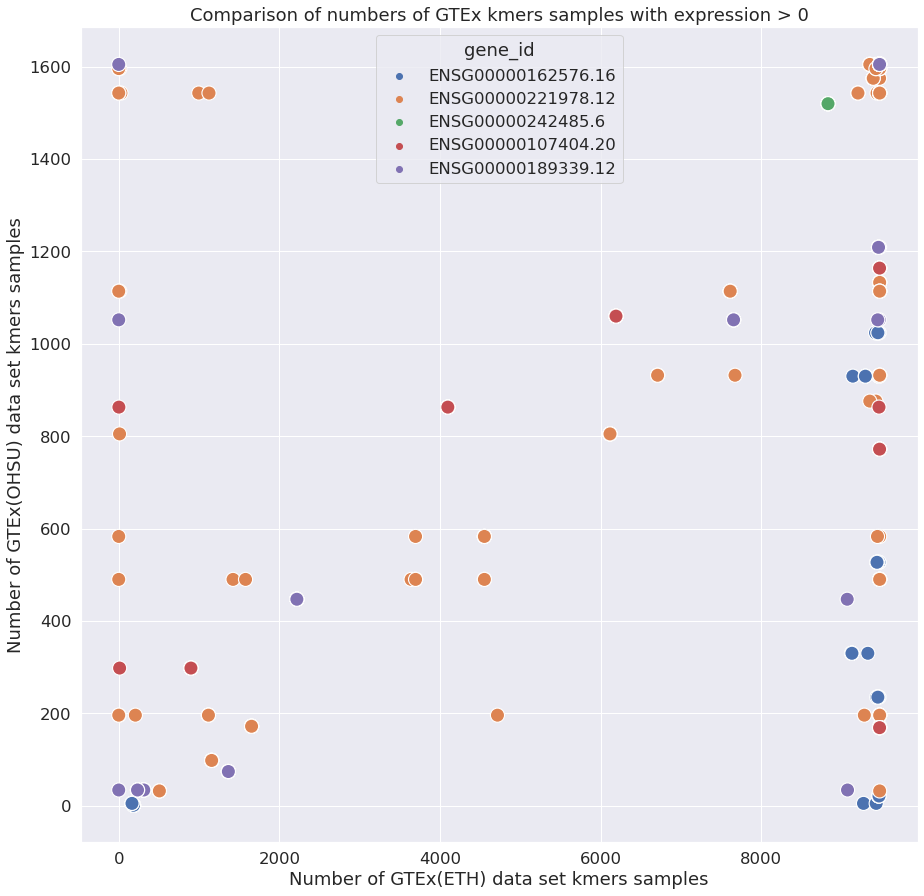

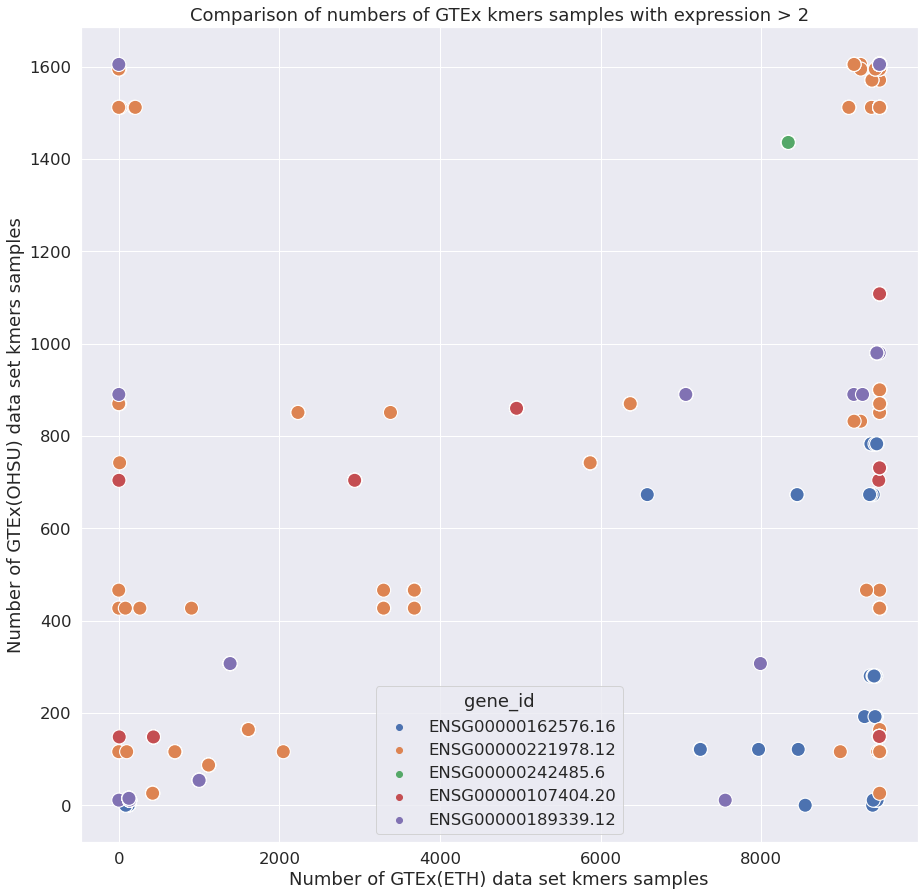

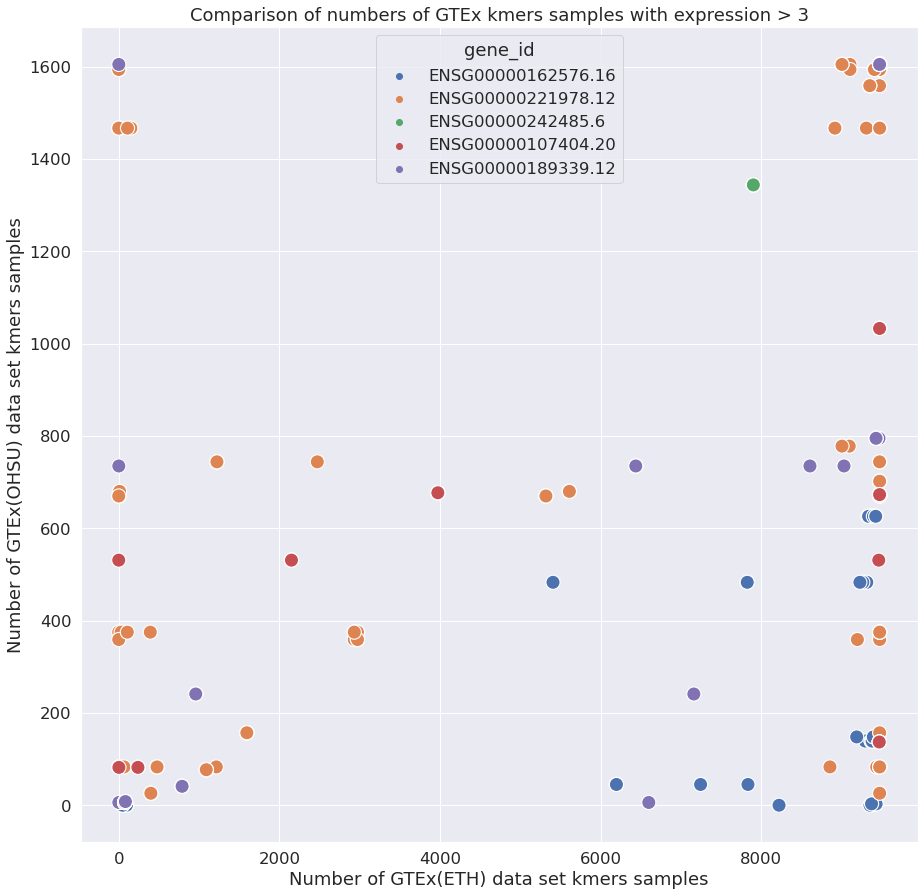

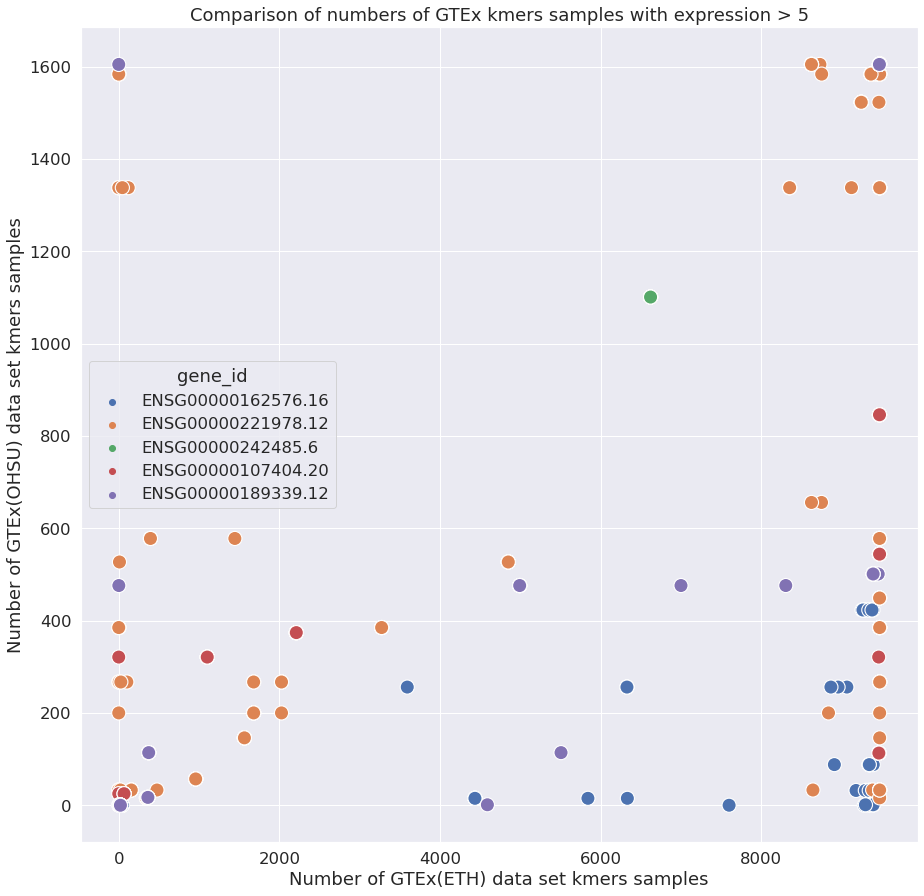

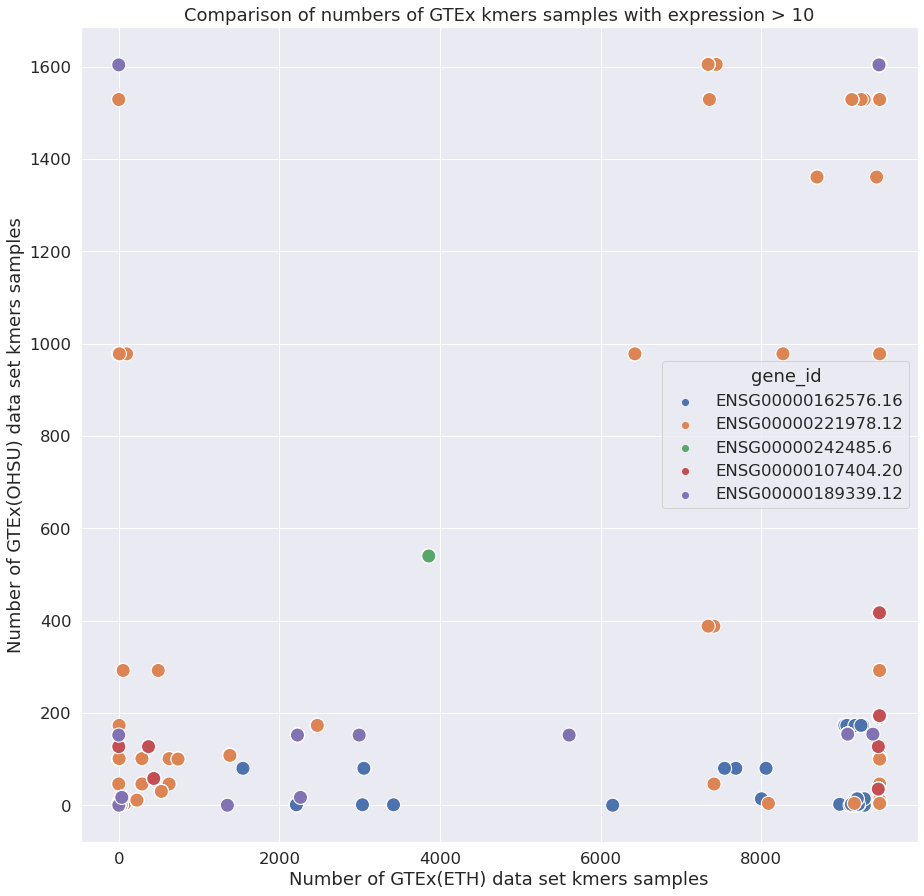

In [39]:
def plot_scatter_gtex(df, col, name):
    sns.scatterplot(x = col + '_x', y = col + '_y', data = df, hue = 'gene_id', s=200)
    plt.title('Comparison of numbers of GTEx kmers samples with expression > ' + name) #Comparison of numbers of GTEx samples with expression >0
    plt.xlabel('Number of GTEx(ETH) data set kmers samples')
    plt.ylabel('Number of GTEx(OHSU) data set kmers samples')
    plt.show()

for gtex, num in zip(gtex_columns, nums):    
    plot_scatter_gtex(df, gtex, num)

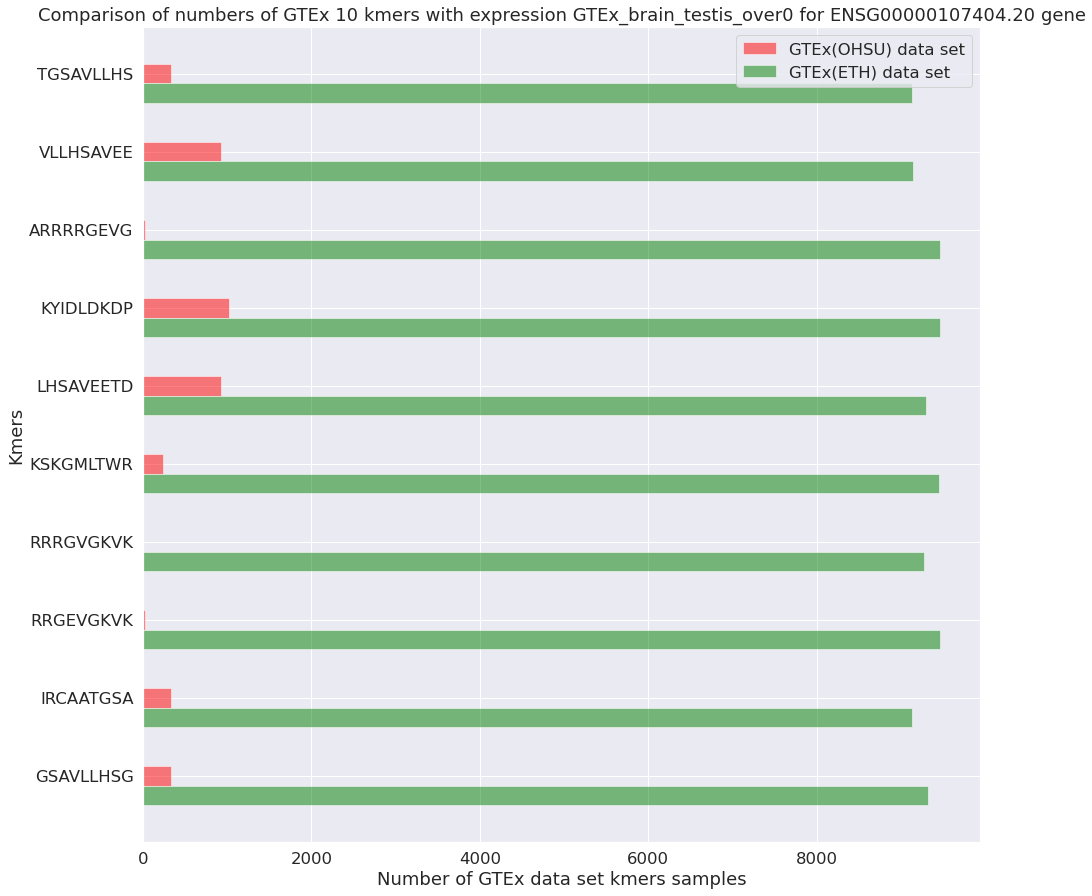

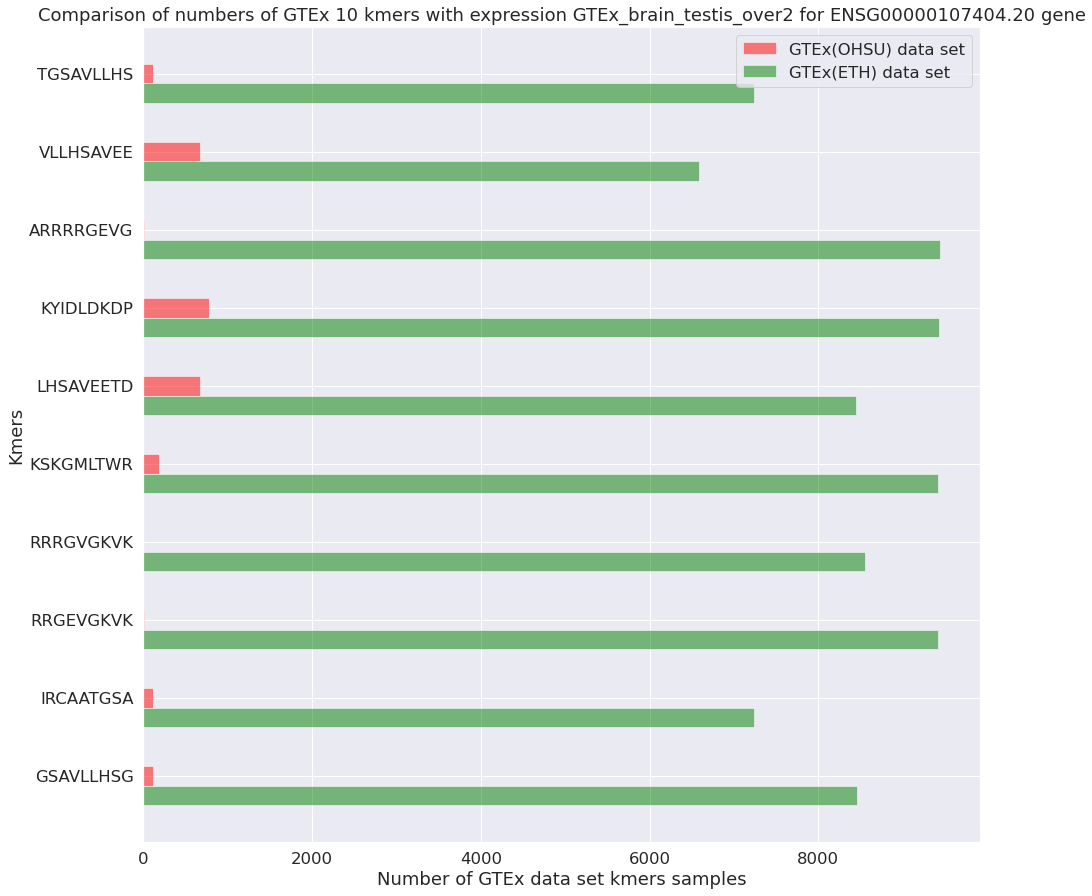

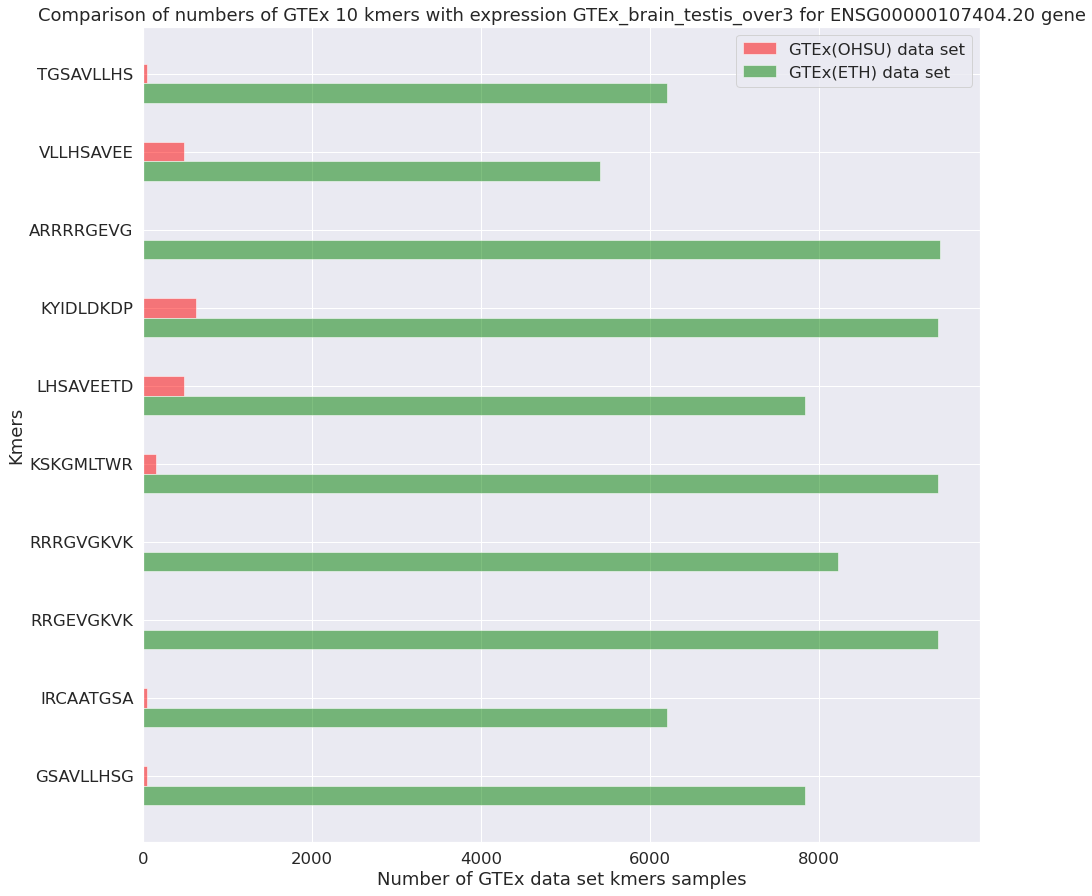

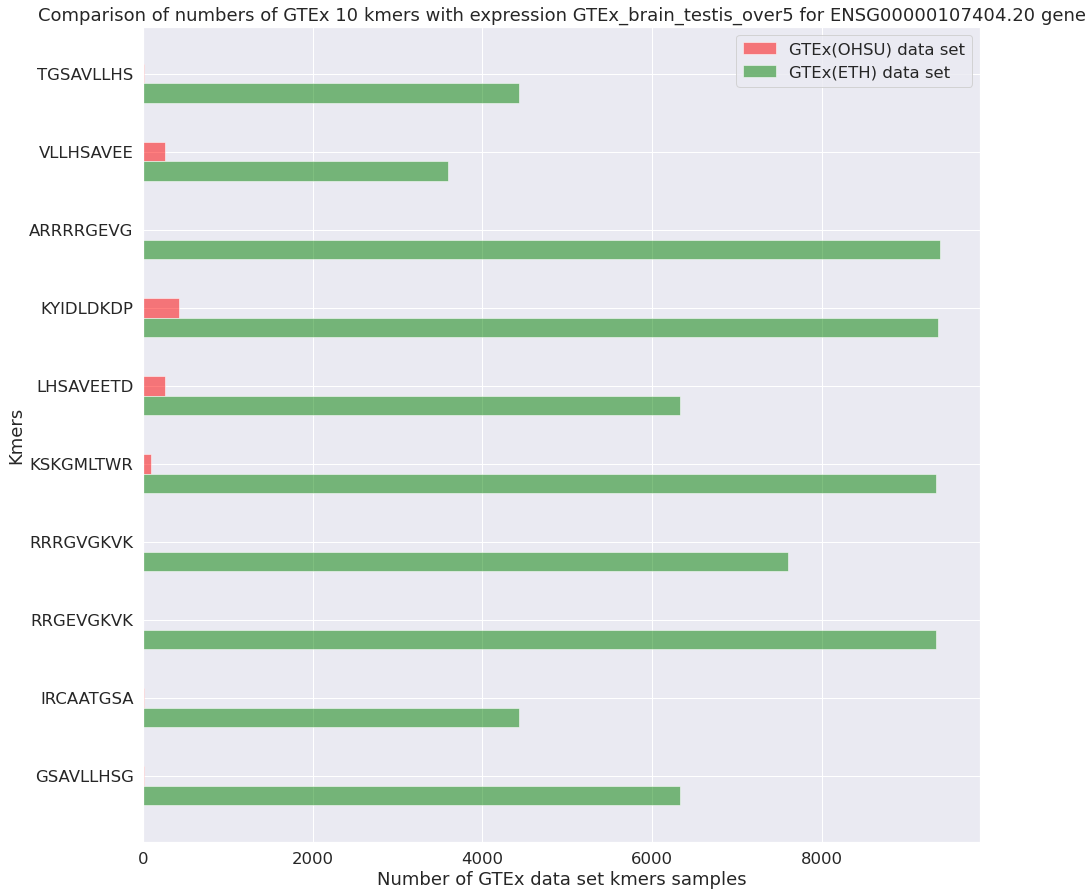

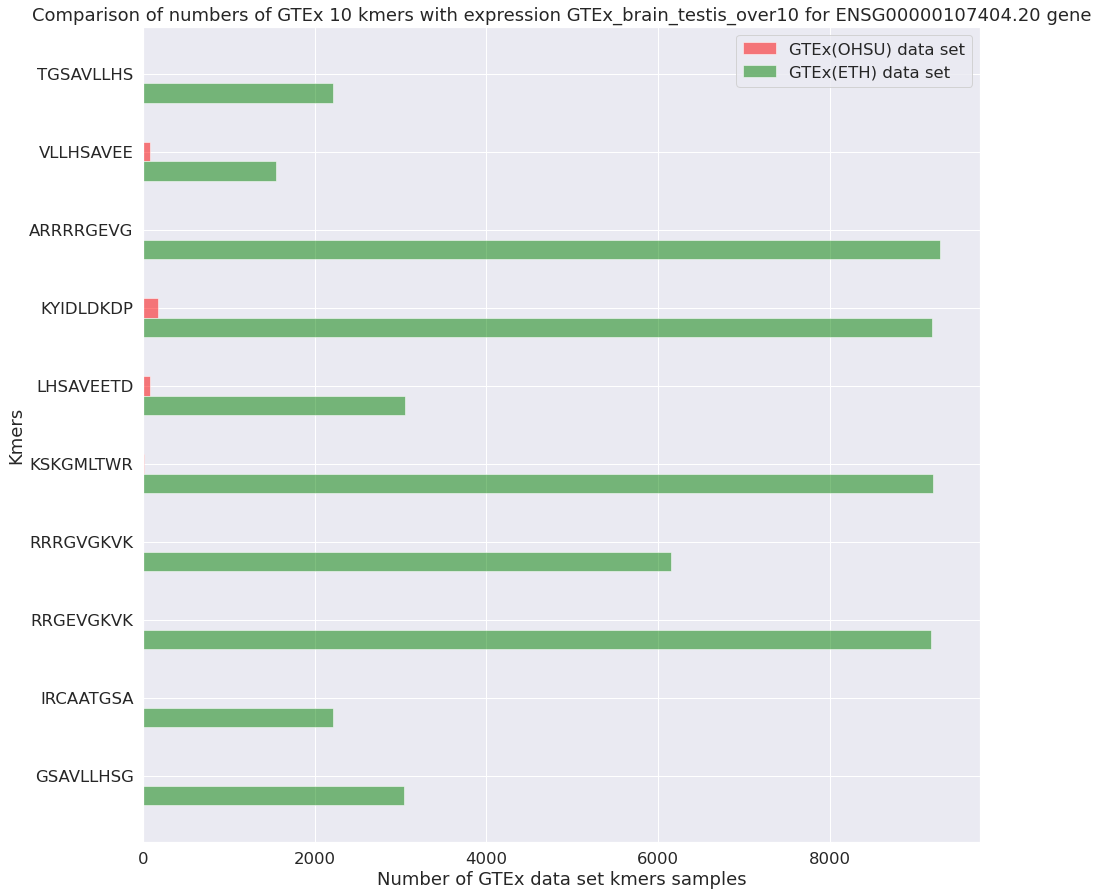

<Figure size 1080x1080 with 0 Axes>

In [40]:
def barplot_horizontal(df, gene_name, kmer_names, col):
    df = df[df['gene_id'] == gene_name]
    df = df[df['kmer'].isin(kmer_names)]
    x = df['kmer']
    
    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df[col + '_y'], label='GTEx(OHSU) data set', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df[col + '_x'], label='GTEx(ETH) data set', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)

    plt.xlabel('Number of GTEx data set kmers samples')
    plt.ylabel('Kmers')
    title = 'Comparison of numbers of GTEx 10 kmers with expression ' + col + ' for ENSG00000107404.20 gene' # for 10 kmers ' + col + '
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    return df
gene_name = gene_names[0]
kmer_names = df[df['gene_id'] == gene_name]['kmer'].values[5:15]
col = 'GTEx_brain_testis_over0'
for gtex, num in zip(gtex_columns, nums):    
    df_part = barplot_horizontal(df, gene_name, kmer_names, gtex)

In [73]:
df_part[['gene_id', 'kmer', 'junction_coordinate', col +'_x', col + '_y']]

gene_id       kmer junction_coordinate  \
7   ENSG00000107404.20  MASWGRATT     1340152:1340246   
9   ENSG00000107404.20  ANAVIVLLR     1338299:1338521   
10  ENSG00000107404.20  TVTLNMDIT     1340173:1340246   
12  ENSG00000107404.20  VSWPKCGQQ     1342156:1342688   
13  ENSG00000107404.20  NMASWGRAT     1340152:1340246   
15  ENSG00000107404.20  VTVTLNMDI     1340173:1340246   
17  ENSG00000107404.20  TVTLNMASW     1340152:1340246   
19  ENSG00000107404.20  YVFGDLCSM     1338158:1338268   
20  ENSG00000107404.20  LNMDITFWA     1340173:1340246   
22  ENSG00000107404.20  VTVTLNMAS     1340152:1340246   

    GTEx_brain_testis_over0_x  GTEx_brain_testis_over0_y  
7                      9475.0                      772.0  
9                      4099.0                      863.0  
10                     9475.0                     1164.0  
12                      900.0                      298.0  
13                     9475.0                      772.0  
15                     9475.0                     1164.0  
17                     9475.0                      772.0  
19                     6193.0                     1060.0  
20                     9475.0                     1164.0  
22                     9475.0                      772.0

# Plot mean values for GTEX columns

In [158]:
def mean_gtex_values(df1, df2, gtex_columns):
    d = {g: 'mean' for g in gtex_columns}
    df1 = df1.groupby(['gene_id', 'kmer']) \
           .agg(d).reset_index()
    df2 = df2.groupby(['gene_id', 'kmer']) \
           .agg(d).reset_index()
    return df1, df2
df1_m, df2_m = mean_gtex_values(df1, df2, gtex_columns)
df1_m

gene_id       kmer  GTEx_brain_testis_over0  \
0       ENSG00000000003.15  ACFQIGIFL               121.000000   
1       ENSG00000000003.15  ADKVNNEIE               274.000000   
2       ENSG00000000003.15  AVDKIQNTG              1806.000000   
3       ENSG00000000003.15  CFQIGIFLA               121.000000   
4       ENSG00000000003.15  DADKVNNEI               137.000000   
...                    ...        ...                      ...   
565563   ENSG00000286219.1  MHCSVEMAM              8634.454545   
565564   ENSG00000286219.1  PPRMHCSVE              9301.200000   
565565   ENSG00000286219.1  PRMHCSVEM              9299.400000   
565566   ENSG00000286219.1  RMHCSVEMA              9299.800000   
565567   ENSG00000286219.1  RPPRMHCSV              9301.400000   

        GTEx_brain_testis_over2  GTEx_brain_testis_over3  \
0                     32.000000                11.000000   
1                    183.000000               144.000000   
2                   1038.000000               681.000000   
3                     32.000000                11.000000   
4                     91.500000                72.000000   
...                         ...                      ...   
565563              7906.818182              7522.181818   
565564              8657.300000              8254.500000   
565565              8654.900000              8252.700000   
565566              8655.000000              8252.100000   
565567              8657.600000              8254.700000   

        GTEx_brain_testis_over5  GTEx_brain_testis_over10  
0                      2.000000                  0.000000  
1                     79.000000                 21.000000  
2                    310.000000                 58.000000  
3                      2.000000                  0.000000  
4                     39.500000                 10.500000  
...                         ...                       ...  
565563              6804.545455               5376.363636  
565564              7480.700000               5909.000000  
565565              7481.500000               5915.700000  
565566              7479.900000               5917.600000  
565567              7479.600000               5900.800000  

[565568 rows x 7 columns]

In [159]:
df = pd.merge(df1_m, df2_m, on=['gene_id', 'kmer'])
df

gene_id       kmer  GTEx_brain_testis_over0_x  \
0       ENSG00000000003.15  ACFQIGIFL                 121.000000   
1       ENSG00000000003.15  ADKVNNEIE                 274.000000   
2       ENSG00000000003.15  AVDKIQNTG                1806.000000   
3       ENSG00000000003.15  CFQIGIFLA                 121.000000   
4       ENSG00000000003.15  DADKVNNEI                 137.000000   
...                    ...        ...                        ...   
565563   ENSG00000286219.1  MHCSVEMAM                8634.454545   
565564   ENSG00000286219.1  PPRMHCSVE                9301.200000   
565565   ENSG00000286219.1  PRMHCSVEM                9299.400000   
565566   ENSG00000286219.1  RMHCSVEMA                9299.800000   
565567   ENSG00000286219.1  RPPRMHCSV                9301.400000   

        GTEx_brain_testis_over2_x  GTEx_brain_testis_over3_x  \
0                       32.000000                  11.000000   
1                      183.000000                 144.000000   
2                     1038.000000                 681.000000   
3                       32.000000                  11.000000   
4                       91.500000                  72.000000   
...                           ...                        ...   
565563                7906.818182                7522.181818   
565564                8657.300000                8254.500000   
565565                8654.900000                8252.700000   
565566                8655.000000                8252.100000   
565567                8657.600000                8254.700000   

        GTEx_brain_testis_over5_x  GTEx_brain_testis_over10_x  \
0                        2.000000                    0.000000   
1                       79.000000                   21.000000   
2                      310.000000                   58.000000   
3                        2.000000                    0.000000   
4                       39.500000                   10.500000   
...                           ...                         ...   
565563                6804.545455                 5376.363636   
565564                7480.700000                 5909.000000   
565565                7481.500000                 5915.700000   
565566                7479.900000                 5917.600000   
565567                7479.600000                 5900.800000   

        GTEx_brain_testis_over0_y  GTEx_brain_testis_over2_y  \
0                            42.0                       11.0   
1                           168.0                      136.0   
2                           166.0                       76.0   
3                            42.0                       11.0   
4                           168.0                      136.0   
...                           ...                        ...   
565563                     1582.0                     1545.0   
565564                     1582.0                     1545.0   
565565                     1582.0                     1545.0   
565566                     1582.0                     1545.0   
565567                     1582.0                     1545.0   

        GTEx_brain_testis_over3_y  GTEx_brain_testis_over5_y  \
0                             3.0                        2.0   
1                           115.0                       72.0   
2                            33.0                       11.0   
3                             3.0                        2.0   
4                           115.0                       72.0   
...                           ...                        ...   
565563                     1516.0                     1452.0   
565564                     1516.0                     1452.0   
565565                     1516.0                     1452.0   
565566                     1516.0                     1452.0   
565567                     1516.0                     1452.0   

        GTEx_brain_testis_over10_y  
0                              0.0  
1                             21.0  
2  

In [160]:
df.columns

Index(['gene_id', 'kmer', 'GTEx_brain_testis_over0_x',
       'GTEx_brain_testis_over2_x', 'GTEx_brain_testis_over3_x',
       'GTEx_brain_testis_over5_x', 'GTEx_brain_testis_over10_x',
       'GTEx_brain_testis_over0_y', 'GTEx_brain_testis_over2_y',
       'GTEx_brain_testis_over3_y', 'GTEx_brain_testis_over5_y',
       'GTEx_brain_testis_over10_y'],
      dtype='object')

In [165]:
df[df['gene_id'] == gene_names[1]]

gene_id       kmer  GTEx_brain_testis_over0_x  \
229079  ENSG00000127666.9  GSIRTLQSI                 113.000000   
229080  ENSG00000127666.9  IRTLQSIWA                 113.000000   
229081  ENSG00000127666.9  IWAASHHPR                8520.111111   
229082  ENSG00000127666.9  LQSIWAASH                 113.000000   
229083  ENSG00000127666.9  QSIWAASHH                 113.000000   
229084  ENSG00000127666.9  RTLQSIWAA                 113.000000   
229085  ENSG00000127666.9  SIRTLQSIW                  58.500000   
229086  ENSG00000127666.9  SIWAASHHP                 113.000000   
229087  ENSG00000127666.9  TLQSIWAAS                 113.000000   

        GTEx_brain_testis_over2_x  GTEx_brain_testis_over3_x  \
229079                  24.000000                   9.000000   
229080                  24.000000                   9.000000   
229081                8139.111111                8005.888889   
229082                  24.000000                   9.000000   
229083                  24.000000                   9.000000   
229084                  24.000000                   9.000000   
229085                  12.000000                   4.500000   
229086                  24.000000                   9.000000   
229087                  24.000000                   9.000000   

        GTEx_brain_testis_over5_x  GTEx_brain_testis_over10_x  \
229079                   4.000000                    1.000000   
229080                   4.000000                    1.000000   
229081                7820.944444                 7517.388889   
229082                   4.000000                    1.000000   
229083                   4.000000                    1.000000   
229084                   4.000000                    1.000000   
229085                   2.000000                    0.500000   
229086                   4.000000                    1.000000   
229087                   4.000000                    1.000000   

        GTEx_brain_testis_over0_y  GTEx_brain_testis_over2_y  \
229079                       10.0                        2.0   
229080                       10.0                        2.0   
229081                       10.0                        2.0   
229082                       10.0                        2.0   
229083                       10.0                        2.0   
229084                       10.0                        2.0   
229085                       10.0                        2.0   
229086                       10.0                        2.0   
229087                       10.0                        2.0   

        GTEx_brain_testis_over3_y  GTEx_brain_testis_over5_y  \
229079                        0.0                        0.0   
229080                        0.0                        0.0   
229081                        0.0                        0.0   
229082                        0.0                        0.0   
229083                        0.0                        0.0   
229084                        0.0                        0.0   
229085                        0.0                        0.0   
229086                        0.0                        0.0   
229087                        0.0                        0.0   

        GTEx_brain_testis_over10_y  
229079                         0.0  
229080                         0.0  
229081                         0.0  
229082                         0.0  
229083                         0.0  
229084                         0.0  
229085                         0.0  
229086                         0.0  
229087                         0.0

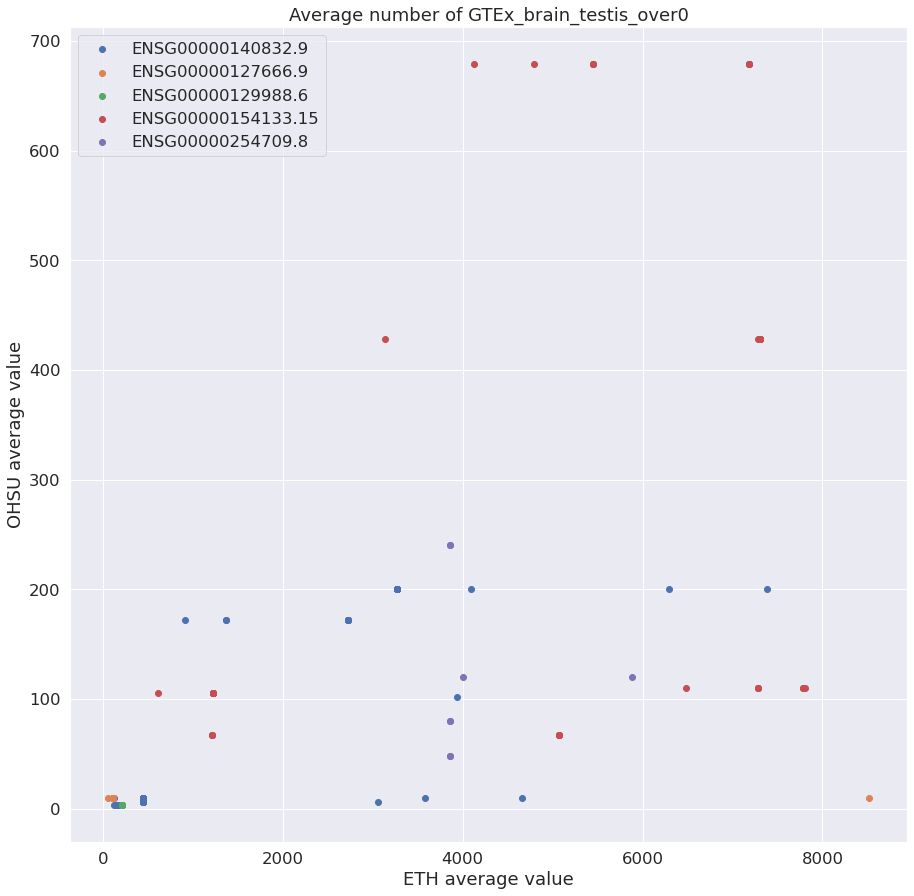

In [174]:
def plot_scatter(df, gene_names, col = 'GTEx_brain_testis_over0'):
    for gene in gene_names:
        df2 = df[df['gene_id'] == gene]
        plt.scatter(df2[col + '_x'], df2[col + '_y'], label = gene)
    plt.legend()
    plt.title('Average number of ' + col)
    plt.xlabel('ETH average value')
    plt.ylabel('OHSU average value')
    plt.show()
plot_scatter(df, gene_names[:5])

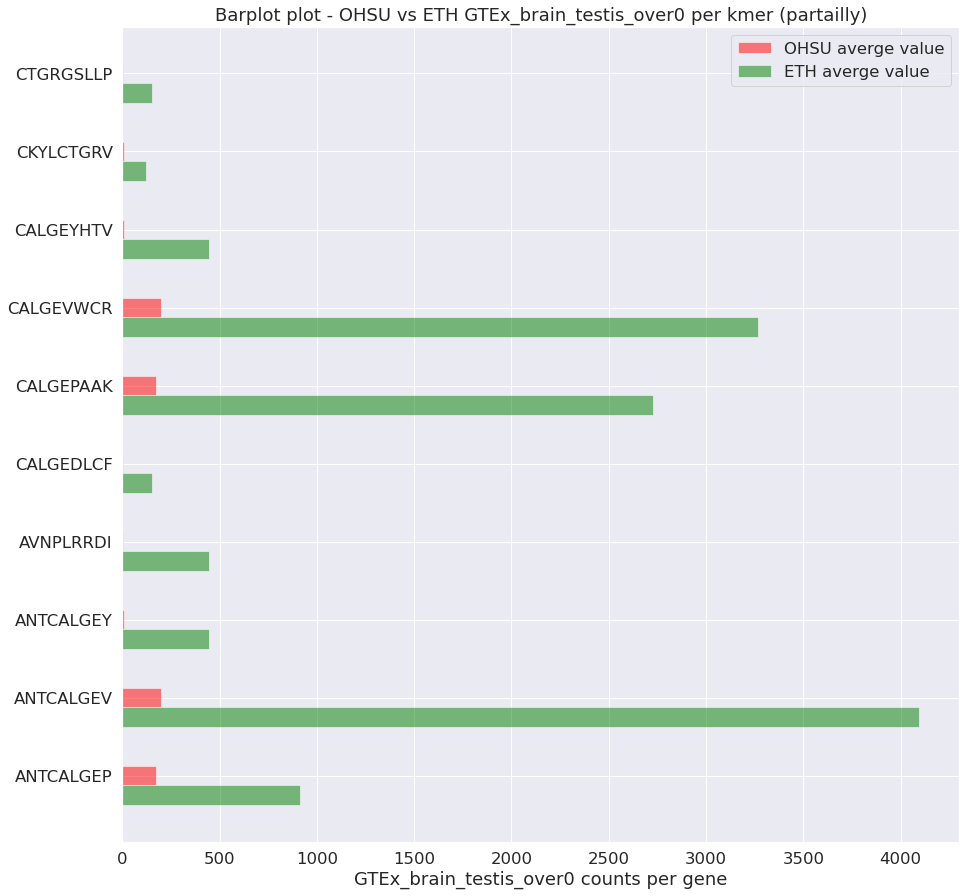

<Figure size 1080x1080 with 0 Axes>

In [189]:
def barplot_horizontal(df, gene_name, kmer_names, col):
    df = df[df['gene_id'] == gene_name]
    df = df[df['kmer'].isin(kmer_names)]
    x = df['kmer']
    
    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df[col + '_y'], label='OHSU averge value', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df[col + '_x'], label='ETH averge value', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)

    plt.xlabel(col + ' counts per gene')
    title = 'Barplot plot - OHSU vs ETH ' + col + ' per kmer (partailly)'
    plt.title(title)
    plt.legend()
    plt.show()
    save_plot(title)
    return df
gene_name = gene_names[0]
kmer_names = df[df['gene_id'] == gene_name]['kmer'].values[5:15]
col = 'GTEx_brain_testis_over0'
df_part = barplot_horizontal(df, gene_name, kmer_names, col)

In [190]:
#Just to double check
df_part[['kmer', col + '_y', col + '_x']]

kmer  GTEx_brain_testis_over0_y  GTEx_brain_testis_over0_x
303222  ANTCALGEP                      172.0                 912.666667
303223  ANTCALGEV                      200.0                4096.888889
303224  ANTCALGEY                       10.0                 447.000000
303225  AVNPLRRDI                        6.0                 447.000000
303226  CALGEDLCF                        3.0                 154.000000
303227  CALGEPAAK                      172.0                2728.000000
303228  CALGEVWCR                      200.0                3265.000000
303229  CALGEYHTV                       10.0                 447.000000
303230  CKYLCTGRV                       10.0                 120.500000
303231  CTGRGSLLP                        3.0                 154.000000

In [192]:
df1[['gene_id', 'kmer', col]].sort_values(by=['gene_id', 'kmer'], ascending=True)

gene_id       kmer  GTEx_brain_testis_over0
3689304  ENSG00000000003.15  ACFQIGIFL                    121.0
3688870  ENSG00000000003.15  ADKVNNEIE                    274.0
3689311  ENSG00000000003.15  AVDKIQNTG                   1806.0
3689305  ENSG00000000003.15  CFQIGIFLA                    121.0
3688871  ENSG00000000003.15  DADKVNNEI                      0.0
...                     ...        ...                      ...
3551831   ENSG00000286219.1  RPPRMHCSV                   9466.0
3551832   ENSG00000286219.1  RPPRMHCSV                   9034.0
3551833   ENSG00000286219.1  RPPRMHCSV                   9474.0
3551834   ENSG00000286219.1  RPPRMHCSV                   9034.0
3551835   ENSG00000286219.1  RPPRMHCSV                   9466.0

[3833934 rows x 3 columns]

# OVARIAN SAMPLES TO FOCUS ON

In [ ]:
#See here just remove the ‘-’ and add ‘all’ at the end

In [ ]:
'''
5 OVARIAN SAMPLES:

TCGA25131901A01R156513all
TCGA25131301A01R156513all
TCGA61200801A02R156813all
TCGA24143101A01R156613all
TCGA24229801A01R156913all

'''


In [ ]:
if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    samples = ['TCGA-C8-A12P-01A-11R-A115-07',
                      'TCGA-AO-A0JM-01A-21R-A056-07',
                      'TCGA-BH-A18V-01A-11R-A12D-07',
                      'TCGA-A2-A0D2-01A-21R-A034-07',
                      'TCGA-A2-A0SX-01A-12R-A084-07']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    samples = ['TCGA-25-1319-01A-01R-1565-13',
                      'TCGA-25-1313-01A-01R-1565-13',
                      'TCGA-61-2008-01A-02R-1568-13',
                      'TCGA-24-1431-01A-01R-1566-13',
                      'TCGA-24-2298-01A-01R-1569-13']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'

# FILTERED DATA ANALYSIS

In [44]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tarfile

In [ ]:
#FILTERED DATA PATHES:

In [ ]:
#BRCA ETH
'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_22March_order_wany_wAnnot'
#OV ETH
'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TTCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot'
#BOTH BRCA and ETH OHSU
'/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'

In [ ]:
#FOCUS ON:

#filtered data after applying these filtering parameter subsets *NoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_22March_order_wany_wAnnot/*NoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'

In [174]:
file_pair

{}

In [175]:
import pandas as pd
import numpy as np
import os
import tarfile
import glob

basedir ='/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
filtering_id = 'filters_22March_order_wany_wAnnot'
filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'

sample_target='TCGA-C8-A12P-01A-11R-A115-07'

# ETH Names
eth_all = glob.glob(os.path.join(filter_dir, 'G*'))

# OHSU Names
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    ohsu_all = tar.getnames()

# Get file pairs
file_pair = {}
for idx_eth, eth in enumerate(eth_all):
    pattern = os.path.basename(eth).replace('G_', '').replace('.gz', '') 
    for idx_ohsu, ohsu in enumerate(ohsu_all):
        if pattern in ohsu:
            file_pair[eth] = ohsu

In [1]:
#file_pair

In [49]:
#restrict = sample_target
restrict = ''
df = {'sample' : [], 
      'filter_foreground' : [], 
      'filter_background' : [], 
      'size_ohsu' : [], 
      'size_eth' : [], 
      'size_intersection' : [], 
      'size_ohsu\eth' : [], 
      'size_eth\ohsu' : []}
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    for eth, ohsu in file_pair.items(): # ETH
        if (not restrict) or restrict in eth: #Restrict to category of interest
            try:
                df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
                #print(eth)
                df_eth = pd.read_csv(eth, sep="\t", usecols = ['kmer'])
                #print(df_eth.shape)
                df_eth = set(df_eth['kmer'])
                #print(len(df_eth))
                df_ohsu = set(df_ohsu['kmer'])
                name = os.path.basename(ohsu).replace('.tsv', '').split('_')
                df['sample'].append(name[1])
                df['filter_foreground'].append(name[2])
                df['filter_background'].append(name[3])
                df['size_ohsu'].append(len(df_ohsu))
                df['size_eth'].append(len(df_eth))
                df['size_ohsu\eth'].append(len(df_ohsu.difference(df_eth)))
                df['size_eth\ohsu'].append(len(df_eth.difference(df_ohsu)))
                df['size_intersection'].append(len(df_ohsu.intersection(df_eth)))
            except:
                continue
df = pd.DataFrame(df)

### TRy look at this filter NoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz
#### Look at this column df['filter_foreground'] f['filter_background']

In [ ]:
#NoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz is the name of filter 
#name = f'G_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'

#df[‘filter_foreground’] will contain SampleLim0.0CohortLimNoneAcrossNone
#df[‘filter_background’] will contain FiltNormalsGtexCohortCohortlim0.0Across1 (not sure if .tsv.gz) is inside

In [22]:
df

sample                    filter_foreground  \
0   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
1   TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
2   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
3   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
4   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
5   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
6   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
7   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
8   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
9   TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
10  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
11  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
12  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
13  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
14  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
15  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
16  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
17  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
18  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
19  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
20  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
21  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
22  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
23  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
24  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
25  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
26  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
27  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
28  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
29  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
30  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
31  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
32  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
33  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
34  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
35  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
36  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
37  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
38  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
39  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
40  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
41  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
42  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
43  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
44  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
45  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across1   
46  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
47  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
48  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
49  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim2.0Across5   
50  TCGA-C8-A12P-01A-11R-A115-07  SampleLim0.0CohortLimNoneAcrossNone   
51  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
52  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across5   
53  TCGA-C8-A12P-01A-11R-A115-07      SampleLim0.0CohortLim0.0Across1   
54  TCGA-C8

In [ ]:
#Is there a change in pathes?

In [62]:
#tar_file_OHSU ='/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'
#base_eth = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_22March_order_wany_wAnnot'
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/expanded-filters_OHSU-results_Mar19-2023/OHSU_March19-2023_expanded-filters_results.tar.gz'
base_eth = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order'
# ETH Names
eth_all = glob.glob(os.path.join(base_eth, 'G*'))
# OHSU Names
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    ohsu_all = tar.getnames()
# Get file pairs
file_pair = {}
for idx_eth, eth in enumerate(eth_all):
    pattern = os.path.basename(eth).replace('G_', '').replace('.gz', '') 
    for idx_ohsu, ohsu in enumerate(ohsu_all):
        if pattern in ohsu:
            file_pair[eth] = ohsu

In [ ]:
#then you can just load as before

In [63]:
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    for eth, ohsu in file_pair.items(): # ETH
        df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
        df_eth = pd.read_csv(eth, sep="\t")

In [ ]:
df_ohsu

In [ ]:
#Start with one sample and this condition:

In [ ]:
#Start with sample G_TCGA-AO-A0JM-01A-21R-A056-07 
#and  parameters SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1

In [42]:
one_file_eth = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_22March_order_wany_wAnnot/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'
one_file_eth_df=pd.read_csv(one_file_eth, sep = '\t', low_memory=False)
one_file_eth_df

kmer                                          coord  \
0     KSKTRPISD  16801319:16801333:16795006:16795019:None:None   
1     SKTRPISDS  16801319:16801330:16795003:16795019:None:None   
2     YKSKTRPIS  16801319:16801336:16795009:16795019:None:None   
3     LYKSKTRPI  16801319:16801339:16795012:16795019:None:None   
4     ALYKSKTRP  16801319:16801342:16795015:16795019:None:None   
...         ...                                            ...   
1135  TKSTTLGGS  52902029:52902036:52901945:52901965:None:None   
1136  KSTTLGGSW  52902029:52902033:52901942:52901965:None:None   
1137  ASVLAERKK  63536871:63536877:63540107:63540128:None:None   
1138  MASVLAERK  63536868:63536877:63540107:63540125:None:None   
1139  SVLAERKKR  63536874:63536877:63540107:63540131:None:None   

      junctionAnnotated  readFrameAnnotated  
0                 False               False  
1                 False               False  
2                 False               False  
3                 False               False  
4                 False               False  
...                 ...                 ...  
1135              False                True  
1136              False               False  
1137              False                True  
1138              False                True  
1139              False                True  

[1140 rows x 4 columns]

In [ ]:
#SAMPLES IDs to FOCUS ON:

#Change from format #G_TCGA-AO-A0JM-01A-21R-A056-07 to this format:

'''
TCGAC8A12P01A11RA11507all
TCGAAOA0JM01A21RA05607all
TCGABHA18V01A11RA12D07all
TCGAA2A0D201A21RA03407all
TCGAA2A0SX01A12RA08407all

'''


In [41]:
one_file_eth = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'
one_file_eth_df=pd.read_csv(one_file_eth, sep = '\t', low_memory=False)
one_file_eth_df

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz'